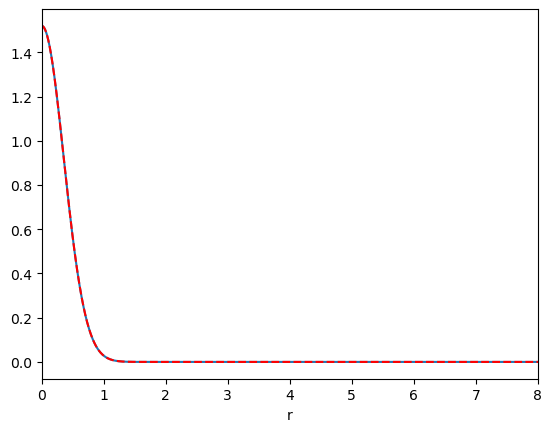

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N = 500                                                   # Truncation ordem

L0 = 3                                             # Map parameter 

col = np.cos(np.arange(2*N + 3)*math.pi /(2*N + 2))      # collocation points (Verificado)
                               
colr = col[1:N+2]                                                         # physical domain (Verificado)             

r1 = L0 * colr/(np.sqrt(1-colr**2)) 
r = np.flip(r1)                                           # physical domain (Verificado)  

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials): 

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])


for i in range(N+1+1):                                    # SB[:,0] = function in origin
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     

# Base function



psi = SB[0:N+1,:]        # origin included in psi[:,0]
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]



# Initial conditions of Phi (Scalar field)                                    

r0 = 0

sigma = 1/2

# L0 = 3 and sigma = 1/2 and Phi_init = A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))   

A0 =  0.75981136951800  #  0.759811369518  -> disperse ;  # 0.759811369518001   -> colapse 

Phi_init = A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))          # Phi initial data out of origin (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_init, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.00000000000000001,15,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phiplot_init = A0*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))     

#Phiplot_init = np.hstack((0, Phiplot_int))

Phiplot = np.dot(a0, psiplot)

plt.plot(rplot, Phiplot, rplot, Phiplot_init, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()


In [2]:
r

array([1.83697020e-16, 9.40599685e-03, 1.88121786e-02, 2.82187303e-02,
       3.76258368e-02, 4.70336831e-02, 5.64424544e-02, 6.58523358e-02,
       7.52635125e-02, 8.46761699e-02, 9.40904934e-02, 1.03506669e-01,
       1.12924881e-01, 1.22345317e-01, 1.31768162e-01, 1.41193603e-01,
       1.50621826e-01, 1.60053018e-01, 1.69487366e-01, 1.78925056e-01,
       1.88366277e-01, 1.97811216e-01, 2.07260060e-01, 2.16712999e-01,
       2.26170221e-01, 2.35631915e-01, 2.45098270e-01, 2.54569476e-01,
       2.64045723e-01, 2.73527202e-01, 2.83014103e-01, 2.92506618e-01,
       3.02004938e-01, 3.11509256e-01, 3.21019765e-01, 3.30536657e-01,
       3.40060127e-01, 3.49590368e-01, 3.59127576e-01, 3.68671946e-01,
       3.78223673e-01, 3.87782955e-01, 3.97349989e-01, 4.06924971e-01,
       4.16508101e-01, 4.26099578e-01, 4.35699601e-01, 4.45308371e-01,
       4.54926089e-01, 4.64552957e-01, 4.74189177e-01, 4.83834953e-01,
       4.93490488e-01, 5.03155989e-01, 5.12831660e-01, 5.22517709e-01,
      

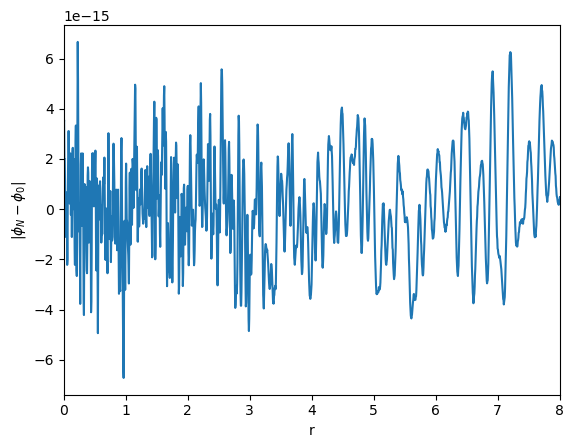

In [3]:
erro = Phiplot_init - Phiplot

plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.show()

In [4]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i] = 0.0001

coeforigin = 1/L0**2*(-(-1)**(np.arange(N+1))*(2*np.arange(1,N+2)-1)**2)    # 1/r * d\phi/dr

tol = 1e-19
#cnew = 0 
#err = abs(c0 - cnew)

n = 0
nf = 100

# Newton Raphson loop
#while max(err) >= tol:
while n <= nf:
  rChi = np.dot(c0 ,rpsi)
  rrChi = np.dot(c0, rrpsi)
  H0_0 = 4*rrChi[0] + 8*np.dot(coeforigin,c0) + 1/2*(rPhi[0])**2
  H0_int = 4*rChi[1:N+1]**2 + 4*rrChi[1:N+1] + 8/r[1:N+1]*rChi[1:N+1] + 1/2*rPhi[1:N+1]**2
  H0 = np.hstack((H0_0, H0_int))
  J1 = rChi*rpsi
  JH_0 = 8*J1[:,0]+ 4*rrpsi[:,0] + 8*coeforigin
  JH_int = 8*J1[:,1:N+1] + 4*rrpsi[:,1:N+1] + 8/r[1:N+1]*rpsi[:,1:N+1]  
  JH = np.column_stack((JH_0, JH_int))
  inv_JH = np.linalg.inv(JH)
  cnew = c0
  c0 = c0 - np.dot(H0, inv_JH)
  err = abs(c0 - cnew)
  print(max(err))
  if  max(err) <= tol:
    print(c0)
    break
  n = n + 1


0.07019572673132765
0.006919803468288313
1.7620013826324943e-05
1.0757984780784824e-10
1.3877787807814457e-17
6.938893903907228e-18
6.938893903907228e-18
6.938893903907228e-18
1.0842021724855044e-19
1.734723475976807e-18
4.336808689942018e-19
1.0842021724855044e-19
1.3877787807814457e-17
1.3877787807814457e-17
1.3877787807814457e-17
1.3877787807814457e-17
2.168404344971009e-19
8.673617379884035e-19
1.3877787807814457e-17
1.3877787807814457e-17
1.3877787807814457e-17
1.3877787807814457e-17
1.734723475976807e-18
4.336808689942018e-19
4.336808689942018e-19
1.734723475976807e-18
1.734723475976807e-18
4.336808689942018e-19
2.168404344971009e-19
1.3877787807814457e-17
1.3877787807814457e-17
4.336808689942018e-19
4.336808689942018e-19
1.3877787807814457e-17
1.3877787807814457e-17
1.734723475976807e-18
1.3877787807814457e-17
1.3877787807814457e-17
4.336808689942018e-19
4.336808689942018e-19
4.336808689942018e-19
4.336808689942018e-19
2.168404344971009e-19
1.3877787807814457e-17
1.3877787807814

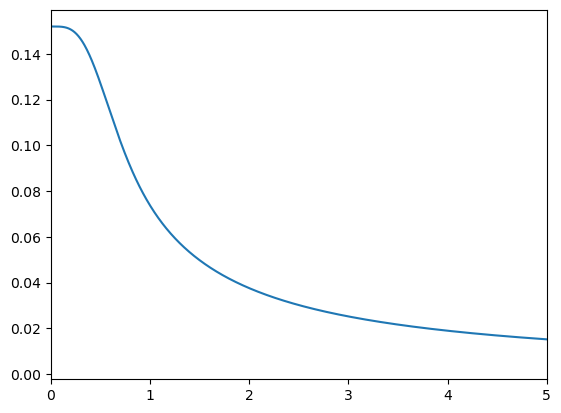

In [5]:

Chiplot = np.dot(c0, psiplot)

rrChiplot = np.dot(c0, rrpsiplot)

plt.plot(rplot,Chiplot)
plt.xlim(0,5)
plt.show()
     

In [6]:
# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

# In r = 0: 

SB1 = 1/2*(SB[1:(N+1),:] + SB[0:(N),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+1),:] + rSB[0:(N),:])
rrSB1 = 1/2*(rrSB[1:(N+1),:] + rrSB[0:(N),:])

# Base functions for Beta

SB2 = np.zeros([N,N+1])      
rSB2 = np.zeros([N,N+1])
rrSB2 = np.zeros([N,N+1])



for i in range(N):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  


for i in range(N):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))


for i in range(N):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)






In [7]:
np.shape(SB2)

(500, 501)

In [8]:
np.shape(SB1)

(500, 501)

In [9]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+1,Nq+1])
qrSB = np.zeros([Nq+1,Nq+1])
qrrSB = np.zeros([Nq+1,Nq+1])


for i in range(Nq+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*+L0**2)

for i in range(Nq+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                     

qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


qSB1 = 1/2*(qSB[1:(N+1),:] + qSB[0:(N),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+1),:] + qrSB[0:(N),:])
rrqSB1 = 1/2*(qSB[1:(N+1),:] + qrrSB[0:(N),:])



# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:

#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

#Alphacenter = (-1)**(np.arange(N+1))


In [10]:
# Filtering

Nc = 0

Nf = N - Nc

coef_f = 36
s = 36

#filter1 = np.ones(N+1)
#filter2 = np.ones(N)
#filter1 = np.hstack((np.ones(Nc),np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)))
filter1 = np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)

In [11]:
# Runge Kutta 4th order

h = 0.0002   # step size
tf = 7

It = int(tf/h)

#t1 = np.linspace(0, tf, It) 

t = 0

Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)

V = 0

#matriz = np.concatenate((array1, array2))

while t <= tf:
   
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)      
  Pi = np.dot(b0, psi) 
  rPi= np.dot(b0, rpsi)
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)   
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**1/2)    # L2 error of HC 
  
  # Alpha origin
  Alpha_0 = 1 + np.dot(al0, psi[:,0])
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(t) + " " + str(Alpha_0))
  out_a.write(',\n')
  
  # Phi origin:  
  phi_0 = np.dot(a0, psi[:,0])
  phi_origin.append(phi_0)
  out_p.write(str(t) + " " + str(phi_0))
  out_p.write(',\n')
    
  # Second step
  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi) 
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 

  # Forth step
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi) 
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  
  
  t = t + h
#  print(t) 
#  if t > 9:
#    h=0.0001
 
    
  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = filter1*(b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4))
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
  phi_set.append(np.dot(a0, psiplot))
  
  print('t =',t,'rPi =', max(rPi), sep = '\n') 
    

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)
  
out_a.close()
out_p.close() 
  
t1 = np.linspace(0, tf, len(Alpha_origin)) 

t =
0.0002
rPi =
0.00944389922764525
t =
0.0004
rPi =
0.01888776408720762
t =
0.0006000000000000001
rPi =
0.028331558262301507
t =
0.0008
rPi =
0.03777524654630166
t =
0.001
rPi =
0.04721879377596538
t =
0.0012000000000000001
rPi =
0.05666216471968846
t =
0.0014000000000000002
rPi =
0.06610532409599812
t =
0.0016000000000000003
rPi =
0.07554823659915542
t =
0.0018000000000000004
rPi =
0.0849908669168116
t =
0.0020000000000000005
rPi =
0.09443317974076747
t =
0.0022000000000000006
rPi =
0.10387513977325837
t =
0.0024000000000000007
rPi =
0.11331671173054282
t =
0.0026000000000000007
rPi =
0.1227578603449057
t =
0.002800000000000001
rPi =
0.13219855036575962
t =
0.003000000000000001
rPi =
0.14163874656023867
t =
0.003200000000000001
rPi =
0.1510784137135258
t =
0.003400000000000001
rPi =
0.16051751662906272
t =
0.003600000000000001
rPi =
0.16995602012871136
t =
0.0038000000000000013
rPi =
0.1793938890529236
t =
0.004000000000000001
rPi =
0.1888310882609416
t =
0.004200000000000001
rPi =


t =
0.033799999999999907
rPi =
1.5686216611520722
t =
0.033999999999999905
rPi =
1.5775889597510917
t =
0.034199999999999904
rPi =
1.5865509357480054
t =
0.0343999999999999
rPi =
1.59550756465767
t =
0.0345999999999999
rPi =
1.6044588221015488
t =
0.0347999999999999
rPi =
1.6134046838079474
t =
0.0349999999999999
rPi =
1.6223451256122814
t =
0.0351999999999999
rPi =
1.6312801234573178
t =
0.0353999999999999
rPi =
1.6402096533934145
t =
0.035599999999999896
rPi =
1.6491336915787607
t =
0.035799999999999894
rPi =
1.6580522142796144
t =
0.03599999999999989
rPi =
1.6669651978705209
t =
0.03619999999999989
rPi =
1.6758726188345423
t =
0.03639999999999989
rPi =
1.684774453763491
t =
0.03659999999999989
rPi =
1.6936706793581169
t =
0.03679999999999989
rPi =
1.70256127242834
t =
0.03699999999999989
rPi =
1.7114462098934569
t =
0.037199999999999886
rPi =
1.7203254687823297
t =
0.037399999999999885
rPi =
1.7291990262335917
t =
0.037599999999999884
rPi =
1.7380668594958477
t =
0.03779999999999988

t =
0.06739999999999988
rPi =
2.9850173698582534
t =
0.06759999999999988
rPi =
2.9928335110418574
t =
0.06779999999999989
rPi =
3.0006417771606095
t =
0.0679999999999999
rPi =
3.0084421620797266
t =
0.0681999999999999
rPi =
3.016234659760029
t =
0.0683999999999999
rPi =
3.0240192642575754
t =
0.06859999999999991
rPi =
3.03179596972343
t =
0.06879999999999992
rPi =
3.039564770403307
t =
0.06899999999999992
rPi =
3.047325660637301
t =
0.06919999999999993
rPi =
3.0550786348595795
t =
0.06939999999999993
rPi =
3.062823687598065
t =
0.06959999999999994
rPi =
3.0705608134741373
t =
0.06979999999999995
rPi =
3.0782900072023396
t =
0.06999999999999995
rPi =
3.086011263590052
t =
0.07019999999999996
rPi =
3.093724577537209
t =
0.07039999999999996
rPi =
3.101429944035953
t =
0.07059999999999997
rPi =
3.109127358170361
t =
0.07079999999999997
rPi =
3.1168168151161093
t =
0.07099999999999998
rPi =
3.124498310140187
t =
0.07119999999999999
rPi =
3.1321718386005566
t =
0.07139999999999999
rPi =
3.13

t =
0.10180000000000086
rPi =
4.211457928355772
t =
0.10200000000000087
rPi =
4.217897660184465
t =
0.10220000000000087
rPi =
4.2243295969603025
t =
0.10240000000000088
rPi =
4.230753744182456
t =
0.10260000000000088
rPi =
4.237170107389724
t =
0.10280000000000089
rPi =
4.2435786921603365
t =
0.1030000000000009
rPi =
4.249979504111609
t =
0.1032000000000009
rPi =
4.256372548899696
t =
0.10340000000000091
rPi =
4.262757832219263
t =
0.10360000000000091
rPi =
4.269135359803248
t =
0.10380000000000092
rPi =
4.275505137422544
t =
0.10400000000000093
rPi =
4.28186717088574
t =
0.10420000000000093
rPi =
4.288221466038799
t =
0.10440000000000094
rPi =
4.294568028764842
t =
0.10460000000000094
rPi =
4.300906864983811
t =
0.10480000000000095
rPi =
4.3072379806522205
t =
0.10500000000000095
rPi =
4.313561381762864
t =
0.10520000000000096
rPi =
4.3198770743445625
t =
0.10540000000000097
rPi =
4.326185064461854
t =
0.10560000000000097
rPi =
4.332485358214744
t =
0.10580000000000098
rPi =
4.3387779

t =
0.13640000000000185
rPi =
5.2153337840811425
t =
0.13660000000000186
rPi =
5.220531277066116
t =
0.13680000000000186
rPi =
5.2257223083085185
t =
0.13700000000000187
rPi =
5.2309068867206685
t =
0.13720000000000188
rPi =
5.2360850212189884
t =
0.13740000000000188
rPi =
5.241256720723969
t =
0.1376000000000019
rPi =
5.2464219941599595
t =
0.1378000000000019
rPi =
5.251580850455107
t =
0.1380000000000019
rPi =
5.2567332985411515
t =
0.1382000000000019
rPi =
5.261879347353358
t =
0.1384000000000019
rPi =
5.267019005830411
t =
0.13860000000000192
rPi =
5.272152282914232
t =
0.13880000000000192
rPi =
5.277279187549852
t =
0.13900000000000193
rPi =
5.282399728685377
t =
0.13920000000000193
rPi =
5.287513915271745
t =
0.13940000000000194
rPi =
5.292621756262697
t =
0.13960000000000194
rPi =
5.29772326061464
t =
0.13980000000000195
rPi =
5.302818437286473
t =
0.14000000000000196
rPi =
5.30790729523953
t =
0.14020000000000196
rPi =
5.312989843437432
t =
0.14040000000000197
rPi =
5.318066090

t =
0.17080000000000284
rPi =
6.021720937181382
t =
0.17100000000000284
rPi =
6.02593785222824
t =
0.17120000000000285
rPi =
6.030149817101766
t =
0.17140000000000286
rPi =
6.034356840106017
t =
0.17160000000000286
rPi =
6.0385589295364746
t =
0.17180000000000287
rPi =
6.042756093680138
t =
0.17200000000000287
rPi =
6.046948340815392
t =
0.17220000000000288
rPi =
6.051135679212039
t =
0.17240000000000288
rPi =
6.055318117131219
t =
0.1726000000000029
rPi =
6.059495662825397
t =
0.1728000000000029
rPi =
6.063668324538363
t =
0.1730000000000029
rPi =
6.067836110505152
t =
0.1732000000000029
rPi =
6.071999028952043
t =
0.1734000000000029
rPi =
6.076157088096538
t =
0.17360000000000292
rPi =
6.080310296147281
t =
0.17380000000000292
rPi =
6.084458661304067
t =
0.17400000000000293
rPi =
6.088602191757833
t =
0.17420000000000294
rPi =
6.092740895690602
t =
0.17440000000000294
rPi =
6.0968747812754165
t =
0.17460000000000295
rPi =
6.101003856676404
t =
0.17480000000000295
rPi =
6.105128130048

t =
0.20520000000000382
rPi =
6.682831136875472
t =
0.20540000000000383
rPi =
6.686342977939214
t =
0.20560000000000384
rPi =
6.689851256028236
t =
0.20580000000000384
rPi =
6.693355977730414
t =
0.20600000000000385
rPi =
6.696857149622805
t =
0.20620000000000385
rPi =
6.700354778271687
t =
0.20640000000000386
rPi =
6.703848870232537
t =
0.20660000000000386
rPi =
6.707339432050021
t =
0.20680000000000387
rPi =
6.710826470258049
t =
0.20700000000000388
rPi =
6.7143099913797135
t =
0.20720000000000388
rPi =
6.717790001927345
t =
0.2074000000000039
rPi =
6.72126650840252
t =
0.2076000000000039
rPi =
6.72473951729599
t =
0.2078000000000039
rPi =
6.728209035087814
t =
0.2080000000000039
rPi =
6.731675068247252
t =
0.2082000000000039
rPi =
6.735137623232816
t =
0.20840000000000392
rPi =
6.7385967064922925
t =
0.20860000000000392
rPi =
6.742052324462689
t =
0.20880000000000393
rPi =
6.745504483570303
t =
0.20900000000000393
rPi =
6.748953190230705
t =
0.20920000000000394
rPi =
6.7523984508487

t =
0.2396000000000048
rPi =
7.2395879714646725
t =
0.23980000000000481
rPi =
7.242575102031665
t =
0.24000000000000482
rPi =
7.245559650047164
t =
0.24020000000000483
rPi =
7.2485416203616495
t =
0.24040000000000483
rPi =
7.251521017816464
t =
0.24060000000000484
rPi =
7.2544978472438295
t =
0.24080000000000484
rPi =
7.25747211346675
t =
0.24100000000000485
rPi =
7.260443821299205
t =
0.24120000000000485
rPi =
7.263412975546071
t =
0.24140000000000486
rPi =
7.266379581003072
t =
0.24160000000000487
rPi =
7.269343642456905
t =
0.24180000000000487
rPi =
7.272305164685188
t =
0.24200000000000488
rPi =
7.275264152456502
t =
0.24220000000000488
rPi =
7.278220610530392
t =
0.2424000000000049
rPi =
7.2811745436573325
t =
0.2426000000000049
rPi =
7.284125956578858
t =
0.2428000000000049
rPi =
7.287074854027456
t =
0.2430000000000049
rPi =
7.290021240726641
t =
0.2432000000000049
rPi =
7.292965121390933
t =
0.24340000000000492
rPi =
7.295906500725967
t =
0.24360000000000492
rPi =
7.29884538342

t =
0.2748000000000024
rPi =
7.735838391860115
t =
0.27500000000000235
rPi =
7.738502217088217
t =
0.27520000000000233
rPi =
7.74116428222412
t =
0.2754000000000023
rPi =
7.743824590672835
t =
0.2756000000000023
rPi =
7.746483145832441
t =
0.27580000000000227
rPi =
7.749139951094239
t =
0.27600000000000224
rPi =
7.751795009842644
t =
0.2762000000000022
rPi =
7.754448325455297
t =
0.2764000000000022
rPi =
7.757099901303036
t =
0.2766000000000022
rPi =
7.759749740749829
t =
0.27680000000000216
rPi =
7.762397847152979
t =
0.27700000000000213
rPi =
7.765044223862923
t =
0.2772000000000021
rPi =
7.767688874223411
t =
0.2774000000000021
rPi =
7.770331801571405
t =
0.27760000000000207
rPi =
7.772973009237187
t =
0.27780000000000205
rPi =
7.775612500544218
t =
0.278000000000002
rPi =
7.778250278809358
t =
0.278200000000002
rPi =
7.780886347342717
t =
0.278400000000002
rPi =
7.783520709447759
t =
0.27860000000000196
rPi =
7.786153368421197
t =
0.27880000000000194
rPi =
7.788784327553171
t =
0.2

t =
0.3099999999999985
rPi =
8.185130342442937
t =
0.3101999999999985
rPi =
8.187608637454472
t =
0.31039999999999845
rPi =
8.190085768679387
t =
0.31059999999999843
rPi =
8.192561738458641
t =
0.3107999999999984
rPi =
8.195036549128165
t =
0.3109999999999984
rPi =
8.197510203019126
t =
0.31119999999999837
rPi =
8.199982702457996
t =
0.31139999999999834
rPi =
8.202454049766308
t =
0.3115999999999983
rPi =
8.204924247260902
t =
0.3117999999999983
rPi =
8.20739329725384
t =
0.3119999999999983
rPi =
8.209861202052371
t =
0.31219999999999826
rPi =
8.212327963959003
t =
0.31239999999999823
rPi =
8.21479358527154
t =
0.3125999999999982
rPi =
8.217258068282991
t =
0.3127999999999982
rPi =
8.21972141528171
t =
0.31299999999999817
rPi =
8.222183628551232
t =
0.31319999999999815
rPi =
8.224644710370434
t =
0.3133999999999981
rPi =
8.227104663013515
t =
0.3135999999999981
rPi =
8.22956348875001
t =
0.3137999999999981
rPi =
8.232021189844636
t =
0.31399999999999806
rPi =
8.234477768557609
t =
0.31

t =
0.3451999999999946
rPi =
8.60921854207228
t =
0.3453999999999946
rPi =
8.611612995515546
t =
0.3455999999999946
rPi =
8.614006717247308
t =
0.34579999999999456
rPi =
8.616399708864277
t =
0.34599999999999453
rPi =
8.618791971959803
t =
0.3461999999999945
rPi =
8.621183508123925
t =
0.3463999999999945
rPi =
8.623574318943476
t =
0.34659999999999447
rPi =
8.62596440600185
t =
0.34679999999999445
rPi =
8.628353770879249
t =
0.3469999999999944
rPi =
8.630742415152609
t =
0.3471999999999944
rPi =
8.633130340395539
t =
0.3473999999999944
rPi =
8.635517548178433
t =
0.34759999999999436
rPi =
8.637904040068443
t =
0.34779999999999434
rPi =
8.64028981762934
t =
0.3479999999999943
rPi =
8.642674882421838
t =
0.3481999999999943
rPi =
8.645059236003299
t =
0.34839999999999427
rPi =
8.647442879927802
t =
0.34859999999999425
rPi =
8.64982581574638
t =
0.3487999999999942
rPi =
8.652208045006706
t =
0.3489999999999942
rPi =
8.654589569253261
t =
0.3491999999999942
rPi =
8.656970390027361
t =
0.349

t =
0.38039999999999075
rPi =
9.023686351218123
t =
0.3805999999999907
rPi =
9.02607221828894
t =
0.3807999999999907
rPi =
9.028457671902615
t =
0.3809999999999907
rPi =
9.030842713152179
t =
0.38119999999999066
rPi =
9.033227343128534
t =
0.38139999999999064
rPi =
9.03561156292023
t =
0.3815999999999906
rPi =
9.037995373613716
t =
0.3817999999999906
rPi =
9.040378776292972
t =
0.38199999999999057
rPi =
9.042761772039917
t =
0.38219999999999055
rPi =
9.04514436193408
t =
0.3823999999999905
rPi =
9.047526547052891
t =
0.3825999999999905
rPi =
9.049908328471478
t =
0.3827999999999905
rPi =
9.052289707262718
t =
0.38299999999999046
rPi =
9.05467068449726
t =
0.38319999999999044
rPi =
9.0570512612436
t =
0.3833999999999904
rPi =
9.059431438568009
t =
0.3835999999999904
rPi =
9.06181121753445
t =
0.38379999999999037
rPi =
9.064190599204778
t =
0.38399999999999035
rPi =
9.0665695846386
t =
0.3841999999999903
rPi =
9.068948174893334
t =
0.3843999999999903
rPi =
9.071326371024215
t =
0.3845999

t =
0.41559999999998687
rPi =
9.43938003559749
t =
0.41579999999998685
rPi =
9.441813861522515
t =
0.4159999999999868
rPi =
9.444247515871652
t =
0.4161999999999868
rPi =
9.446680999405372
t =
0.4163999999999868
rPi =
9.449114312882443
t =
0.41659999999998676
rPi =
9.451547457060332
t =
0.41679999999998674
rPi =
9.453980432694781
t =
0.4169999999999867
rPi =
9.456413240540083
t =
0.4171999999999867
rPi =
9.458845881348951
t =
0.41739999999998667
rPi =
9.461278355872617
t =
0.41759999999998665
rPi =
9.46371066486079
t =
0.4177999999999866
rPi =
9.466142809061596
t =
0.4179999999999866
rPi =
9.468574789221677
t =
0.4181999999999866
rPi =
9.471006606086208
t =
0.41839999999998656
rPi =
9.473438260398742
t =
0.41859999999998654
rPi =
9.475869752901431
t =
0.4187999999999865
rPi =
9.478301084334861
t =
0.4189999999999865
rPi =
9.48073225543809
t =
0.4191999999999865
rPi =
9.483163266948727
t =
0.41939999999998645
rPi =
9.485594119602856
t =
0.41959999999998643
rPi =
9.48802481413508
t =
0.4

t =
0.450799999999983
rPi =
9.86571427805127
t =
0.45099999999998297
rPi =
9.868128340519252
t =
0.45119999999998295
rPi =
9.870542343784406
t =
0.4513999999999829
rPi =
9.872956288373983
t =
0.4515999999999829
rPi =
9.875370174814053
t =
0.4517999999999829
rPi =
9.877784003629554
t =
0.45199999999998286
rPi =
9.880197775344431
t =
0.45219999999998284
rPi =
9.882611490481299
t =
0.4523999999999828
rPi =
9.88502514956181
t =
0.4525999999999828
rPi =
9.887438753106379
t =
0.45279999999998277
rPi =
9.889852301634392
t =
0.45299999999998275
rPi =
9.892265795664084
t =
0.45319999999998273
rPi =
9.89467923571259
t =
0.4533999999999827
rPi =
9.897092622295833
t =
0.4535999999999827
rPi =
9.89950595592877
t =
0.45379999999998266
rPi =
9.901919237125103
t =
0.45399999999998264
rPi =
9.904332466397566
t =
0.4541999999999826
rPi =
9.906745644257684
t =
0.4543999999999826
rPi =
9.909158771215896
t =
0.4545999999999826
rPi =
9.911571847781582
t =
0.45479999999998255
rPi =
9.914029273737649
t =
0.45

t =
0.4851999999999792
rPi =
10.298602924508977
t =
0.4853999999999792
rPi =
10.30113906816815
t =
0.48559999999997916
rPi =
10.303675312504915
t =
0.48579999999997914
rPi =
10.306211657906257
t =
0.4859999999999791
rPi =
10.308748104758335
t =
0.4861999999999791
rPi =
10.3112846534466
t =
0.48639999999997907
rPi =
10.313821304355624
t =
0.48659999999997905
rPi =
10.316358057869225
t =
0.486799999999979
rPi =
10.318894914370356
t =
0.486999999999979
rPi =
10.32143187424133
t =
0.487199999999979
rPi =
10.323968937863379
t =
0.48739999999997896
rPi =
10.326506105617186
t =
0.48759999999997894
rPi =
10.329043377882558
t =
0.4877999999999789
rPi =
10.331580755038477
t =
0.4879999999999789
rPi =
10.33411823746317
t =
0.4881999999999789
rPi =
10.33665582553407
t =
0.48839999999997885
rPi =
10.33919351962781
t =
0.48859999999997883
rPi =
10.341731320120207
t =
0.4887999999999788
rPi =
10.344269227386295
t =
0.4889999999999788
rPi =
10.346807241800366
t =
0.48919999999997876
rPi =
10.349345363

t =
0.5199999999999754
rPi =
10.754141251238464
t =
0.5201999999999753
rPi =
10.756829172328347
t =
0.5203999999999753
rPi =
10.759517337632065
t =
0.5205999999999753
rPi =
10.762205747452711
t =
0.5207999999999753
rPi =
10.764894402092754
t =
0.5209999999999753
rPi =
10.767583301854069
t =
0.5211999999999752
rPi =
10.770272447038034
t =
0.5213999999999752
rPi =
10.77296183794532
t =
0.5215999999999752
rPi =
10.775651474876154
t =
0.5217999999999752
rPi =
10.778341358130131
t =
0.5219999999999752
rPi =
10.781031488006237
t =
0.5221999999999751
rPi =
10.783721864802922
t =
0.5223999999999751
rPi =
10.78641248881813
t =
0.5225999999999751
rPi =
10.789103360349078
t =
0.5227999999999751
rPi =
10.791794479692575
t =
0.522999999999975
rPi =
10.794485847144728
t =
0.523199999999975
rPi =
10.797177463001185
t =
0.523399999999975
rPi =
10.799869327556934
t =
0.523599999999975
rPi =
10.802561441106448
t =
0.523799999999975
rPi =
10.805253803943621
t =
0.5239999999999749
rPi =
10.807946416361755

t =
0.5543999999999716
rPi =
11.222722323125835
t =
0.5545999999999716
rPi =
11.225586777944315
t =
0.5547999999999715
rPi =
11.228451612415794
t =
0.5549999999999715
rPi =
11.231316826805987
t =
0.5551999999999715
rPi =
11.23418242137995
t =
0.5553999999999715
rPi =
11.237048396402463
t =
0.5555999999999715
rPi =
11.239914752137777
t =
0.5557999999999714
rPi =
11.24278148884983
t =
0.5559999999999714
rPi =
11.245648606801991
t =
0.5561999999999714
rPi =
11.248516106257389
t =
0.5563999999999714
rPi =
11.251383987478516
t =
0.5565999999999713
rPi =
11.254252250727639
t =
0.5567999999999713
rPi =
11.257120896266423
t =
0.5569999999999713
rPi =
11.259989924356308
t =
0.5571999999999713
rPi =
11.262859335258154
t =
0.5573999999999713
rPi =
11.26572912923246
t =
0.5575999999999712
rPi =
11.268599306539288
t =
0.5577999999999712
rPi =
11.271469867438231
t =
0.5579999999999712
rPi =
11.274340812188642
t =
0.5581999999999712
rPi =
11.277212141049208
t =
0.5583999999999711
rPi =
11.28008385427

t =
0.5887999999999678
rPi =
11.721198460287008
t =
0.5889999999999678
rPi =
11.724131778048067
t =
0.5891999999999677
rPi =
11.72706551515276
t =
0.5893999999999677
rPi =
11.72999967179807
t =
0.5895999999999677
rPi =
11.732934248180491
t =
0.5897999999999677
rPi =
11.735869244496245
t =
0.5899999999999677
rPi =
11.738804660941051
t =
0.5901999999999676
rPi =
11.741740497710381
t =
0.5903999999999676
rPi =
11.7446767549992
t =
0.5905999999999676
rPi =
11.74761343300223
t =
0.5907999999999676
rPi =
11.750550531913719
t =
0.5909999999999676
rPi =
11.753488051927613
t =
0.5911999999999675
rPi =
11.756425993237395
t =
0.5913999999999675
rPi =
11.759364356036215
t =
0.5915999999999675
rPi =
11.762303140516837
t =
0.5917999999999675
rPi =
11.765242346871682
t =
0.5919999999999674
rPi =
11.768181975292826
t =
0.5921999999999674
rPi =
11.771122025971827
t =
0.5923999999999674
rPi =
11.7740624991
t =
0.5925999999999674
rPi =
11.777003394868263
t =
0.5927999999999674
rPi =
11.779944713467124
t 

t =
0.623199999999964
rPi =
12.242985707821832
t =
0.623399999999964
rPi =
12.246140537603642
t =
0.623599999999964
rPi =
12.249295922640632
t =
0.6237999999999639
rPi =
12.25245186314526
t =
0.6239999999999639
rPi =
12.255608359329669
t =
0.6241999999999639
rPi =
12.25876541140561
t =
0.6243999999999639
rPi =
12.2619230195847
t =
0.6245999999999639
rPi =
12.265081184078202
t =
0.6247999999999638
rPi =
12.268239905097028
t =
0.6249999999999638
rPi =
12.271399182851933
t =
0.6251999999999638
rPi =
12.274559017553285
t =
0.6253999999999638
rPi =
12.277719409411137
t =
0.6255999999999637
rPi =
12.28088035863538
t =
0.6257999999999637
rPi =
12.284041865435539
t =
0.6259999999999637
rPi =
12.287203930020727
t =
0.6261999999999637
rPi =
12.290366552600053
t =
0.6263999999999637
rPi =
12.293529733382115
t =
0.6265999999999636
rPi =
12.29669347257528
t =
0.6267999999999636
rPi =
12.299857770387623
t =
0.6269999999999636
rPi =
12.303022627026934
t =
0.6271999999999636
rPi =
12.306188042700693
t

t =
0.6575999999999602
rPi =
12.79394882687599
t =
0.6577999999999602
rPi =
12.797202042561961
t =
0.6579999999999602
rPi =
12.800455845760514
t =
0.6581999999999602
rPi =
12.80371023663372
t =
0.6583999999999601
rPi =
12.806965215343256
t =
0.6585999999999601
rPi =
12.810220782050669
t =
0.6587999999999601
rPi =
12.813476936917072
t =
0.6589999999999601
rPi =
12.81673368010331
t =
0.65919999999996
rPi =
12.819991011769861
t =
0.65939999999996
rPi =
12.823248932077135
t =
0.65959999999996
rPi =
12.826507441184983
t =
0.65979999999996
rPi =
12.829766539253072
t =
0.65999999999996
rPi =
12.833026226440705
t =
0.6601999999999599
rPi =
12.836286502907033
t =
0.6603999999999599
rPi =
12.839547368810685
t =
0.6605999999999599
rPi =
12.842808824310197
t =
0.6607999999999599
rPi =
12.846070869563565
t =
0.6609999999999598
rPi =
12.84933350472881
t =
0.6611999999999598
rPi =
12.852596729963384
t =
0.6613999999999598
rPi =
12.855860545424502
t =
0.6615999999999598
rPi =
12.859124951269147
t =
0.

t =
0.6919999999999564
rPi =
13.377128720164166
t =
0.6921999999999564
rPi =
13.380649196487898
t =
0.6923999999999564
rPi =
13.384170413637005
t =
0.6925999999999564
rPi =
13.387692371828372
t =
0.6927999999999563
rPi =
13.391215071278774
t =
0.6929999999999563
rPi =
13.394738512204597
t =
0.6931999999999563
rPi =
13.398262694822298
t =
0.6933999999999563
rPi =
13.40178761934779
t =
0.6935999999999563
rPi =
13.405313285996963
t =
0.6937999999999562
rPi =
13.408839694985348
t =
0.6939999999999562
rPi =
13.412366846528286
t =
0.6941999999999562
rPi =
13.415894740840887
t =
0.6943999999999562
rPi =
13.419423378138097
t =
0.6945999999999561
rPi =
13.422952758634523
t =
0.6947999999999561
rPi =
13.426482882544644
t =
0.6949999999999561
rPi =
13.430013750082635
t =
0.6951999999999561
rPi =
13.433545361462434
t =
0.695399999999956
rPi =
13.437077716897821
t =
0.695599999999956
rPi =
13.440610816602256
t =
0.695799999999956
rPi =
13.444144660789046
t =
0.695999999999956
rPi =
13.4476792496712

t =
0.7263999999999526
rPi =
13.993717689472817
t =
0.7265999999999526
rPi =
13.997368579170963
t =
0.7267999999999526
rPi =
14.00102024343934
t =
0.7269999999999526
rPi =
14.004672682451833
t =
0.7271999999999526
rPi =
14.008325896381907
t =
0.7273999999999525
rPi =
14.011979885402779
t =
0.7275999999999525
rPi =
14.015634649687437
t =
0.7277999999999525
rPi =
14.01929018940852
t =
0.7279999999999525
rPi =
14.02294650473843
t =
0.7281999999999524
rPi =
14.026603595849254
t =
0.7283999999999524
rPi =
14.030261462912891
t =
0.7285999999999524
rPi =
14.033920106100846
t =
0.7287999999999524
rPi =
14.03757952558444
t =
0.7289999999999524
rPi =
14.041239721534629
t =
0.7291999999999523
rPi =
14.044900694122123
t =
0.7293999999999523
rPi =
14.048562443517367
t =
0.7295999999999523
rPi =
14.052224969890526
t =
0.7297999999999523
rPi =
14.055888273411465
t =
0.7299999999999522
rPi =
14.059552354249789
t =
0.7301999999999522
rPi =
14.063217212574816
t =
0.7303999999999522
rPi =
14.066882848555

t =
0.7607999999999489
rPi =
14.644654543142755
t =
0.7609999999999488
rPi =
14.64862354418717
t =
0.7611999999999488
rPi =
14.652593505044054
t =
0.7613999999999488
rPi =
14.65656442598125
t =
0.7615999999999488
rPi =
14.660536307266321
t =
0.7617999999999487
rPi =
14.664509149166658
t =
0.7619999999999487
rPi =
14.668482951949487
t =
0.7621999999999487
rPi =
14.672457715881702
t =
0.7623999999999487
rPi =
14.676433441230166
t =
0.7625999999999487
rPi =
14.680410128261418
t =
0.7627999999999486
rPi =
14.684387777241882
t =
0.7629999999999486
rPi =
14.688366388437622
t =
0.7631999999999486
rPi =
14.692345962114716
t =
0.7633999999999486
rPi =
14.696326498538795
t =
0.7635999999999485
rPi =
14.700307997975534
t =
0.7637999999999485
rPi =
14.704290460690205
t =
0.7639999999999485
rPi =
14.708273886947921
t =
0.7641999999999485
rPi =
14.712258277013593
t =
0.7643999999999485
rPi =
14.716243631152064
t =
0.7645999999999484
rPi =
14.720229949627663
t =
0.7647999999999484
rPi =
14.7242172327

t =
0.7951999999999451
rPi =
15.341653286600291
t =
0.795399999999945
rPi =
15.345791130606774
t =
0.795599999999945
rPi =
15.349929977166225
t =
0.795799999999945
rPi =
15.354069826505496
t =
0.795999999999945
rPi =
15.358210678850893
t =
0.796199999999945
rPi =
15.362352534428751
t =
0.7963999999999449
rPi =
15.366495393464891
t =
0.7965999999999449
rPi =
15.370639256184997
t =
0.7967999999999449
rPi =
15.374784122814349
t =
0.7969999999999449
rPi =
15.378929993578087
t =
0.7971999999999448
rPi =
15.38307686870093
t =
0.7973999999999448
rPi =
15.387224748407387
t =
0.7975999999999448
rPi =
15.391373632921683
t =
0.7977999999999448
rPi =
15.39552352246782
t =
0.7979999999999448
rPi =
15.399674417269344
t =
0.7981999999999447
rPi =
15.403826317549617
t =
0.7983999999999447
rPi =
15.40797922353179
t =
0.7985999999999447
rPi =
15.412133135438564
t =
0.7987999999999447
rPi =
15.416288053492467
t =
0.7989999999999446
rPi =
15.42044397791574
t =
0.7991999999999446
rPi =
15.424600908930268
t

t =
0.8295999999999413
rPi =
16.0682844550803
t =
0.8297999999999413
rPi =
16.072597819922496
t =
0.8299999999999412
rPi =
16.076912221729412
t =
0.8301999999999412
rPi =
16.08122766067101
t =
0.8303999999999412
rPi =
16.085544136917044
t =
0.8305999999999412
rPi =
16.08986165063657
t =
0.8307999999999411
rPi =
16.094180201998622
t =
0.8309999999999411
rPi =
16.098499791171573
t =
0.8311999999999411
rPi =
16.102820418323496
t =
0.8313999999999411
rPi =
16.10714208362215
t =
0.831599999999941
rPi =
16.111464787234723
t =
0.831799999999941
rPi =
16.11578852932816
t =
0.831999999999941
rPi =
16.120113310069076
t =
0.832199999999941
rPi =
16.12443912962345
t =
0.832399999999941
rPi =
16.12876598815714
t =
0.8325999999999409
rPi =
16.133140156061803
t =
0.8327999999999409
rPi =
16.137674060642045
t =
0.8329999999999409
rPi =
16.142209206137203
t =
0.8331999999999409
rPi =
16.146745592914204
t =
0.8333999999999409
rPi =
16.15128322133975
t =
0.8335999999999408
rPi =
16.1558220917804
t =
0.83

t =
0.8647999999999374
rPi =
16.879326513933936
t =
0.8649999999999374
rPi =
16.88406478314674
t =
0.8651999999999374
rPi =
16.88880434943764
t =
0.8653999999999373
rPi =
16.893545213134335
t =
0.8655999999999373
rPi =
16.89828737456438
t =
0.8657999999999373
rPi =
16.903030834054817
t =
0.8659999999999373
rPi =
16.907775591932662
t =
0.8661999999999372
rPi =
16.9125216485244
t =
0.8663999999999372
rPi =
16.917269004156275
t =
0.8665999999999372
rPi =
16.92201765915425
t =
0.8667999999999372
rPi =
16.926767613844078
t =
0.8669999999999372
rPi =
16.931518868551045
t =
0.8671999999999371
rPi =
16.93627142360026
t =
0.8673999999999371
rPi =
16.941025279316396
t =
0.8675999999999371
rPi =
16.945780436023988
t =
0.8677999999999371
rPi =
16.95053689404723
t =
0.867999999999937
rPi =
16.955294653709743
t =
0.868199999999937
rPi =
16.960053715335242
t =
0.868399999999937
rPi =
16.964814079246906
t =
0.868599999999937
rPi =
16.96957574576765
t =
0.868799999999937
rPi =
16.974338715219965
t =
0.

t =
0.8999999999999335
rPi =
17.733517115626793
t =
0.9001999999999335
rPi =
17.738488421633374
t =
0.9003999999999335
rPi =
17.743461077099614
t =
0.9005999999999335
rPi =
17.748435082288264
t =
0.9007999999999334
rPi =
17.753410437461383
t =
0.9009999999999334
rPi =
17.758387142880544
t =
0.9011999999999334
rPi =
17.76336519880713
t =
0.9013999999999334
rPi =
17.768344605501905
t =
0.9015999999999333
rPi =
17.77332536322513
t =
0.9017999999999333
rPi =
17.778307472236744
t =
0.9019999999999333
rPi =
17.783290932796046
t =
0.9021999999999333
rPi =
17.78827574516202
t =
0.9023999999999333
rPi =
17.793261909593166
t =
0.9025999999999332
rPi =
17.79824942634751
t =
0.9027999999999332
rPi =
17.80323829568259
t =
0.9029999999999332
rPi =
17.80822851785549
t =
0.9031999999999332
rPi =
17.81322009312286
t =
0.9033999999999331
rPi =
17.818213021740874
t =
0.9035999999999331
rPi =
17.82320730396515
t =
0.9037999999999331
rPi =
17.82820294005107
t =
0.9039999999999331
rPi =
17.833199930253247
t

t =
0.9351999999999296
rPi =
18.6409030582592
t =
0.9353999999999296
rPi =
18.646387405028303
t =
0.9355999999999296
rPi =
18.651873443421774
t =
0.9357999999999296
rPi =
18.657361173937158
t =
0.9359999999999296
rPi =
18.662850597071856
t =
0.9361999999999295
rPi =
18.66834171332311
t =
0.9363999999999295
rPi =
18.6738345231876
t =
0.9365999999999295
rPi =
18.67932902716174
t =
0.9367999999999295
rPi =
18.684825225741573
t =
0.9369999999999294
rPi =
18.690323119423013
t =
0.9371999999999294
rPi =
18.695822708701453
t =
0.9373999999999294
rPi =
18.701323994072084
t =
0.9375999999999294
rPi =
18.706826976029635
t =
0.9377999999999294
rPi =
18.712331655068716
t =
0.9379999999999293
rPi =
18.717838031683204
t =
0.9381999999999293
rPi =
18.723346106367217
t =
0.9383999999999293
rPi =
18.728855879614088
t =
0.9385999999999293
rPi =
18.734367351916937
t =
0.9387999999999292
rPi =
18.73988052376867
t =
0.9389999999999292
rPi =
18.745395395661703
t =
0.9391999999999292
rPi =
18.750911968088154

t =
0.9703999999999258
rPi =
19.632629821781947
t =
0.9705999999999257
rPi =
19.638419229779405
t =
0.9707999999999257
rPi =
19.644210411041545
t =
0.9709999999999257
rPi =
19.650003365991424
t =
0.9711999999999257
rPi =
19.655798095051694
t =
0.9713999999999257
rPi =
19.661594598644204
t =
0.9715999999999256
rPi =
19.66739287719048
t =
0.9717999999999256
rPi =
19.67319293111139
t =
0.9719999999999256
rPi =
19.678994760827457
t =
0.9721999999999256
rPi =
19.684798366758162
t =
0.9723999999999255
rPi =
19.69060374932307
t =
0.9725999999999255
rPi =
19.696410908940734
t =
0.9727999999999255
rPi =
19.702219846029287
t =
0.9729999999999255
rPi =
19.70803056100646
t =
0.9731999999999255
rPi =
19.713843054289075
t =
0.9733999999999254
rPi =
19.719657326293753
t =
0.9735999999999254
rPi =
19.72547337743645
t =
0.9737999999999254
rPi =
19.731291208132415
t =
0.9739999999999254
rPi =
19.737110818796484
t =
0.9741999999999253
rPi =
19.742932209842945
t =
0.9743999999999253
rPi =
19.7487553816853

t =
1.005599999999922
rPi =
20.679228777265564
t =
1.0057999999999219
rPi =
20.68533624985758
t =
1.0059999999999218
rPi =
20.69144556038805
t =
1.0061999999999218
rPi =
20.697556709158928
t =
1.0063999999999218
rPi =
20.703669696471575
t =
1.0065999999999218
rPi =
20.70978452262639
t =
1.0067999999999218
rPi =
20.715901187922892
t =
1.0069999999999217
rPi =
20.72201969265986
t =
1.0071999999999217
rPi =
20.728140037135102
t =
1.0073999999999217
rPi =
20.734262221645643
t =
1.0075999999999217
rPi =
20.740386246487517
t =
1.0077999999999216
rPi =
20.746512111956118
t =
1.0079999999999216
rPi =
20.752639818345806
t =
1.0081999999999216
rPi =
20.75876936595009
t =
1.0083999999999216
rPi =
20.764900755061536
t =
1.0085999999999216
rPi =
20.771033985972043
t =
1.0087999999999215
rPi =
20.77716905897254
t =
1.0089999999999215
rPi =
20.78330597435297
t =
1.0091999999999215
rPi =
20.789444732402462
t =
1.0093999999999215
rPi =
20.795585333409317
t =
1.0095999999999214
rPi =
20.80172777766094
t

t =
1.040799999999918
rPi =
21.806950724272287
t =
1.040999999999918
rPi =
21.8137689105445
t =
1.041199999999918
rPi =
21.820589458944507
t =
1.041399999999918
rPi =
21.82741237016461
t =
1.041599999999918
rPi =
21.834237644896444
t =
1.041799999999918
rPi =
21.841065283831245
t =
1.0419999999999179
rPi =
21.84789528765922
t =
1.0421999999999179
rPi =
21.854727657070235
t =
1.0423999999999178
rPi =
21.861562392753225
t =
1.0425999999999178
rPi =
21.868399495396833
t =
1.0427999999999178
rPi =
21.875238965688585
t =
1.0429999999999178
rPi =
21.882080804315734
t =
1.0431999999999177
rPi =
21.888925011964606
t =
1.0433999999999177
rPi =
21.89577158932094
t =
1.0435999999999177
rPi =
21.902620537069907
t =
1.0437999999999177
rPi =
21.909471855895838
t =
1.0439999999999177
rPi =
21.916325546482536
t =
1.0441999999999176
rPi =
21.92318160951306
t =
1.0443999999999176
rPi =
21.93004004566973
t =
1.0445999999999176
rPi =
21.93690085563427
t =
1.0447999999999176
rPi =
21.94376404008778
t =
1.0

t =
1.0759999999999141
rPi =
23.043918483273604
t =
1.0761999999999141
rPi =
23.051162394432644
t =
1.076399999999914
rPi =
23.058408777407717
t =
1.076599999999914
rPi =
23.0656576327384
t =
1.076799999999914
rPi =
23.072908960963012
t =
1.076999999999914
rPi =
23.080162762618805
t =
1.077199999999914
rPi =
23.087419038242054
t =
1.077399999999914
rPi =
23.094677788367537
t =
1.077599999999914
rPi =
23.101939013529357
t =
1.077799999999914
rPi =
23.10920271426013
t =
1.077999999999914
rPi =
23.116468891091483
t =
1.078199999999914
rPi =
23.123737544553954
t =
1.0783999999999139
rPi =
23.131008675176762
t =
1.0785999999999138
rPi =
23.13828228348816
t =
1.0787999999999138
rPi =
23.14555837001515
t =
1.0789999999999138
rPi =
23.15283693528356
t =
1.0791999999999138
rPi =
23.16011797981809
t =
1.0793999999999138
rPi =
23.167401504142372
t =
1.0795999999999137
rPi =
23.17468750877881
t =
1.0797999999999137
rPi =
23.18197599424851
t =
1.0799999999999137
rPi =
23.189266961071617
t =
1.08019

t =
1.1107999999999103
rPi =
24.341982418926197
t =
1.1109999999999103
rPi =
24.349663456011903
t =
1.1111999999999103
rPi =
24.357347038977565
t =
1.1113999999999102
rPi =
24.365033168114625
t =
1.1115999999999102
rPi =
24.372721843712817
t =
1.1117999999999102
rPi =
24.38041306605997
t =
1.1119999999999102
rPi =
24.38810683544221
t =
1.1121999999999101
rPi =
24.395803152143884
t =
1.1123999999999101
rPi =
24.403502016447497
t =
1.11259999999991
rPi =
24.4112034286339
t =
1.11279999999991
rPi =
24.418907388981875
t =
1.11299999999991
rPi =
24.426613897768583
t =
1.11319999999991
rPi =
24.434322955269447
t =
1.11339999999991
rPi =
24.44203456175787
t =
1.11359999999991
rPi =
24.449748717505674
t =
1.11379999999991
rPi =
24.457465422782526
t =
1.11399999999991
rPi =
24.465184677856627
t =
1.11419999999991
rPi =
24.472906482994166
t =
1.11439999999991
rPi =
24.480630838459525
t =
1.1145999999999099
rPi =
24.488357744515117
t =
1.1147999999999099
rPi =
24.496087201421805
t =
1.11499999999

t =
1.1455999999999065
rPi =
25.754459474397542
t =
1.1457999999999064
rPi =
25.763155751903152
t =
1.1459999999999064
rPi =
25.77185541012402
t =
1.1461999999999064
rPi =
25.78055845001463
t =
1.1463999999999064
rPi =
25.789264872527824
t =
1.1465999999999064
rPi =
25.797974678615102
t =
1.1467999999999063
rPi =
25.806687869226415
t =
1.1469999999999063
rPi =
25.815404445310275
t =
1.1471999999999063
rPi =
25.824124407813624
t =
1.1473999999999063
rPi =
25.83284775768198
t =
1.1475999999999063
rPi =
25.84157449585938
t =
1.1477999999999062
rPi =
25.850304623288313
t =
1.1479999999999062
rPi =
25.859038140909615
t =
1.1481999999999062
rPi =
25.867775049662875
t =
1.1483999999999062
rPi =
25.876515350485978
t =
1.1485999999999061
rPi =
25.885259044315312
t =
1.1487999999999061
rPi =
25.894006132085742
t =
1.148999999999906
rPi =
25.90275661473062
t =
1.149199999999906
rPi =
25.911510493181765
t =
1.149399999999906
rPi =
25.920267768369342
t =
1.149599999999906
rPi =
25.929028441222027
t

t =
1.1807999999999026
rPi =
27.337855781842947
t =
1.1809999999999026
rPi =
27.347160237490797
t =
1.1811999999999026
rPi =
27.356468214190357
t =
1.1813999999999025
rPi =
27.36577971254863
t =
1.1815999999999025
rPi =
27.375094733169625
t =
1.1817999999999025
rPi =
27.384413276655245
t =
1.1819999999999025
rPi =
27.393735343604526
t =
1.1821999999999024
rPi =
27.4030609346139
t =
1.1823999999999024
rPi =
27.412390050277505
t =
1.1825999999999024
rPi =
27.421722691186563
t =
1.1827999999999024
rPi =
27.43105885792992
t =
1.1829999999999024
rPi =
27.440398551093757
t =
1.1831999999999023
rPi =
27.449741771261593
t =
1.1833999999999023
rPi =
27.45908851901437
t =
1.1835999999999023
rPi =
27.468438794930393
t =
1.1837999999999023
rPi =
27.477792599585392
t =
1.1839999999999022
rPi =
27.487149933552374
t =
1.1841999999999022
rPi =
27.4965107974017
t =
1.1843999999999022
rPi =
27.50587519170129
t =
1.1845999999999022
rPi =
27.51524311701591
t =
1.1847999999999022
rPi =
27.5246145739081
t =

t =
1.2155999999998988
rPi =
29.010246079398154
t =
1.2157999999998987
rPi =
29.020169836533565
t =
1.2159999999998987
rPi =
29.030097174926496
t =
1.2161999999998987
rPi =
29.04002809461448
t =
1.2163999999998987
rPi =
29.049962595630532
t =
1.2165999999998987
rPi =
29.059900678004016
t =
1.2167999999998986
rPi =
29.06984234175974
t =
1.2169999999998986
rPi =
29.079787586918776
t =
1.2171999999998986
rPi =
29.089736413497956
t =
1.2173999999998986
rPi =
29.099688821509734
t =
1.2175999999998985
rPi =
29.10964481096272
t =
1.2177999999998985
rPi =
29.11960438186111
t =
1.2179999999998985
rPi =
29.129567534205002
t =
1.2181999999998985
rPi =
29.139534267990463
t =
1.2183999999998985
rPi =
29.149504583209048
t =
1.2185999999998984
rPi =
29.159478479848357
t =
1.2187999999998984
rPi =
29.169455957891632
t =
1.2189999999998984
rPi =
29.179437017318058
t =
1.2191999999998984
rPi =
29.189421658102255
t =
1.2193999999998983
rPi =
29.19940988021487
t =
1.2195999999998983
rPi =
29.2094016836222

t =
1.250399999999895
rPi =
30.85720413402819
t =
1.250599999999895
rPi =
30.868656650912893
t =
1.2507999999998949
rPi =
30.880114141083215
t =
1.2509999999998949
rPi =
30.89157660571857
t =
1.2511999999998948
rPi =
30.903044045994232
t =
1.2513999999998948
rPi =
30.914516463082183
t =
1.2515999999998948
rPi =
30.925993858149994
t =
1.2517999999998948
rPi =
30.93747623236184
t =
1.2519999999998948
rPi =
30.948963586877724
t =
1.2521999999998947
rPi =
30.960455922854056
t =
1.2523999999998947
rPi =
30.9719532414434
t =
1.2525999999998947
rPi =
30.98345554379421
t =
1.2527999999998947
rPi =
30.994962831051136
t =
1.2529999999998946
rPi =
31.006475104355207
t =
1.2531999999998946
rPi =
31.01799236484291
t =
1.2533999999998946
rPi =
31.029514613647354
t =
1.2535999999998946
rPi =
31.041041851897493
t =
1.2537999999998946
rPi =
31.05257408071837
t =
1.2539999999998945
rPi =
31.064111301230948
t =
1.2541999999998945
rPi =
31.075653514552325
t =
1.2543999999998945
rPi =
31.087200721795607
t 

t =
1.285999999999891
rPi =
32.97501355500688
t =
1.286199999999891
rPi =
32.98736582668272
t =
1.286399999999891
rPi =
32.999723208667135
t =
1.286599999999891
rPi =
33.01208570123152
t =
1.286799999999891
rPi =
33.024453304641085
t =
1.286999999999891
rPi =
33.03682601915418
t =
1.2871999999998909
rPi =
33.049203845022554
t =
1.2873999999998909
rPi =
33.06158678249151
t =
1.2875999999998908
rPi =
33.0739748317991
t =
1.2877999999998908
rPi =
33.08636799317713
t =
1.2879999999998908
rPi =
33.09876626685054
t =
1.2881999999998908
rPi =
33.11116965303758
t =
1.2883999999998907
rPi =
33.12357815194959
t =
1.2885999999998907
rPi =
33.13599176379124
t =
1.2887999999998907
rPi =
33.148410488760305
t =
1.2889999999998907
rPi =
33.16083432704773
t =
1.2891999999998907
rPi =
33.173263278837666
t =
1.2893999999998906
rPi =
33.18569734430738
t =
1.2895999999998906
rPi =
33.19813652362722
t =
1.2897999999998906
rPi =
33.21058081696054
t =
1.2899999999998906
rPi =
33.22303022446405
t =
1.290199999

t =
1.3211999999998871
rPi =
35.2276716331254
t =
1.321399999999887
rPi =
35.24092078149451
t =
1.321599999999887
rPi =
35.25417496694513
t =
1.321799999999887
rPi =
35.26743418824284
t =
1.321999999999887
rPi =
35.28069844414259
t =
1.322199999999887
rPi =
35.29396773338828
t =
1.322399999999887
rPi =
35.30724205471339
t =
1.322599999999887
rPi =
35.32052140683997
t =
1.322799999999887
rPi =
35.33380578847957
t =
1.322999999999887
rPi =
35.34709519833278
t =
1.323199999999887
rPi =
35.36038963508911
t =
1.323399999999887
rPi =
35.37368909742694
t =
1.3235999999998869
rPi =
35.386993584013965
t =
1.3237999999998868
rPi =
35.40030309350679
t =
1.3239999999998868
rPi =
35.41361762455055
t =
1.3241999999998868
rPi =
35.42693717577958
t =
1.3243999999998868
rPi =
35.4402617458171
t =
1.3245999999998868
rPi =
35.453591333275135
t =
1.3247999999998867
rPi =
35.46692593675432
t =
1.3249999999998867
rPi =
35.48026555484453
t =
1.3251999999998867
rPi =
35.49361018612387
t =
1.3253999999998867
r

t =
1.3561999999998833
rPi =
37.787487007216356
t =
1.3563999999998833
rPi =
37.80319121623532
t =
1.3565999999998832
rPi =
37.818902900217466
t =
1.3567999999998832
rPi =
37.834622059844165
t =
1.3569999999998832
rPi =
37.85034869578514
t =
1.3571999999998832
rPi =
37.866082808698685
t =
1.3573999999998831
rPi =
37.88182439923183
t =
1.3575999999998831
rPi =
37.89757346801947
t =
1.357799999999883
rPi =
37.913330015685794
t =
1.357999999999883
rPi =
37.92909404284265
t =
1.358199999999883
rPi =
37.944865550090576
t =
1.358399999999883
rPi =
37.96064453801844
t =
1.358599999999883
rPi =
37.97643100720337
t =
1.358799999999883
rPi =
37.9922249582107
t =
1.358999999999883
rPi =
38.008026391593795
t =
1.359199999999883
rPi =
38.02383530789464
t =
1.359399999999883
rPi =
38.039651707642776
t =
1.359599999999883
rPi =
38.055475591356206
t =
1.3597999999998829
rPi =
38.07130695954101
t =
1.3599999999998829
rPi =
38.08714581269119
t =
1.3601999999998828
rPi =
38.10299215128829
t =
1.360399999

t =
1.3915999999998794
rPi =
40.68367378687205
t =
1.3917999999998794
rPi =
40.700699658236154
t =
1.3919999999998793
rPi =
40.71773290861661
t =
1.3921999999998793
rPi =
40.73477353598408
t =
1.3923999999998793
rPi =
40.75182153828912
t =
1.3925999999998793
rPi =
40.768876913462336
t =
1.3927999999998792
rPi =
40.7859396594145
t =
1.3929999999998792
rPi =
40.8030097740362
t =
1.3931999999998792
rPi =
40.82008725519816
t =
1.3933999999998792
rPi =
40.83717210075042
t =
1.3935999999998792
rPi =
40.85426430852318
t =
1.3937999999998791
rPi =
40.87136387632613
t =
1.3939999999998791
rPi =
40.88847080194897
t =
1.394199999999879
rPi =
40.9055850831604
t =
1.394399999999879
rPi =
40.92270671770912
t =
1.394599999999879
rPi =
40.939835703323155
t =
1.394799999999879
rPi =
40.95697203770988
t =
1.394999999999879
rPi =
40.974115718555815
t =
1.395199999999879
rPi =
40.991266743527284
t =
1.395399999999879
rPi =
41.008425110269286
t =
1.395599999999879
rPi =
41.025590816406364
t =
1.39579999999

t =
1.4273999999998754
rPi =
43.87516430272251
t =
1.4275999999998754
rPi =
43.89570522120322
t =
1.4277999999998754
rPi =
43.91625738835113
t =
1.4279999999998754
rPi =
43.936820805333895
t =
1.4281999999998753
rPi =
43.9573954732975
t =
1.4283999999998753
rPi =
43.97798139336537
t =
1.4285999999998753
rPi =
43.99857856663912
t =
1.4287999999998753
rPi =
44.019186994198144
t =
1.4289999999998753
rPi =
44.03980667709956
t =
1.4291999999998752
rPi =
44.06043761637787
t =
1.4293999999998752
rPi =
44.081079813045534
t =
1.4295999999998752
rPi =
44.1017332680919
t =
1.4297999999998752
rPi =
44.122397982484294
t =
1.4299999999998751
rPi =
44.14307395716682
t =
1.4301999999998751
rPi =
44.16376119306114
t =
1.430399999999875
rPi =
44.18445969106551
t =
1.430599999999875
rPi =
44.20516945205601
t =
1.430799999999875
rPi =
44.22589047688509
t =
1.430999999999875
rPi =
44.2466227663821
t =
1.431199999999875
rPi =
44.267366321353265
t =
1.431399999999875
rPi =
44.288121142581545
t =
1.4315999999

t =
1.4629999999998715
rPi =
47.7087123568221
t =
1.4631999999998715
rPi =
47.73124992566529
t =
1.4633999999998715
rPi =
47.75379851797346
t =
1.4635999999998714
rPi =
47.77635812945389
t =
1.4637999999998714
rPi =
47.79892875577294
t =
1.4639999999998714
rPi =
47.82151039255582
t =
1.4641999999998714
rPi =
47.84410303538601
t =
1.4643999999998714
rPi =
47.86670667980594
t =
1.4645999999998713
rPi =
47.889321321316125
t =
1.4647999999998713
rPi =
47.9119469553755
t =
1.4649999999998713
rPi =
47.934583577401014
t =
1.4651999999998713
rPi =
47.95723118276779
t =
1.4653999999998713
rPi =
47.97988976680843
t =
1.4655999999998712
rPi =
48.00255932481368
t =
1.4657999999998712
rPi =
48.02523985203144
t =
1.4659999999998712
rPi =
48.04793134366738
t =
1.4661999999998712
rPi =
48.07063379488415
t =
1.4663999999998711
rPi =
48.09334720080163
t =
1.4665999999998711
rPi =
48.11607155649674
t =
1.466799999999871
rPi =
48.13880685700344
t =
1.466999999999871
rPi =
48.16155309731185
t =
1.467199999

t =
1.4981999999998676
rPi =
51.839470093346364
t =
1.4983999999998676
rPi =
51.863839240683504
t =
1.4985999999998676
rPi =
51.88821788703118
t =
1.4987999999998676
rPi =
51.91260601841923
t =
1.4989999999998675
rPi =
51.93700362080631
t =
1.4991999999998675
rPi =
51.96141068007946
t =
1.4993999999998675
rPi =
51.985827182054095
t =
1.4995999999998675
rPi =
52.010253112473755
t =
1.4997999999998675
rPi =
52.03468845700932
t =
1.4999999999998674
rPi =
52.059133201259684
t =
1.5001999999998674
rPi =
52.08358733075108
t =
1.5003999999998674
rPi =
52.1080508309367
t =
1.5005999999998674
rPi =
52.132523687196944
t =
1.5007999999998674
rPi =
52.157005884838725
t =
1.5009999999998673
rPi =
52.18149740909564
t =
1.5011999999998673
rPi =
52.2059982451274
t =
1.5013999999998673
rPi =
52.23050837802013
t =
1.5015999999998673
rPi =
52.25502779278536
t =
1.5017999999998672
rPi =
52.279556474360696
t =
1.5019999999998672
rPi =
52.304094407608794
t =
1.5021999999998672
rPi =
52.328641577317825
t =
1

t =
1.5331999999998638
rPi =
56.77548510597337
t =
1.5333999999998638
rPi =
56.8062140103058
t =
1.5335999999998637
rPi =
56.83695966862275
t =
1.5337999999998637
rPi =
56.86772207023728
t =
1.5339999999998637
rPi =
56.898501204368046
t =
1.5341999999998637
rPi =
56.929297060139035
t =
1.5343999999998637
rPi =
56.960109626578955
t =
1.5345999999998636
rPi =
56.99093889262183
t =
1.5347999999998636
rPi =
57.02178484710513
t =
1.5349999999998636
rPi =
57.052647478770645
t =
1.5351999999998636
rPi =
57.08352677626342
t =
1.5353999999998635
rPi =
57.11442272813198
t =
1.5355999999998635
rPi =
57.1453353228275
t =
1.5357999999998635
rPi =
57.176264548703806
t =
1.5359999999998635
rPi =
57.20721039401663
t =
1.5361999999998635
rPi =
57.23817284692345
t =
1.5363999999998634
rPi =
57.269151895483795
t =
1.5365999999998634
rPi =
57.30014752765709
t =
1.5367999999998634
rPi =
57.331159731304496
t =
1.5369999999998634
rPi =
57.362188494187066
t =
1.5371999999998633
rPi =
57.39323380396581
t =
1.5

t =
1.5685999999998599
rPi =
62.46150491782886
t =
1.5687999999998599
rPi =
62.494931880624904
t =
1.5689999999998598
rPi =
62.528371877156005
t =
1.5691999999998598
rPi =
62.561824873603776
t =
1.5693999999998598
rPi =
62.59529083597625
t =
1.5695999999998598
rPi =
62.62876973010631
t =
1.5697999999998598
rPi =
62.66226152165246
t =
1.5699999999998597
rPi =
62.69576617609667
t =
1.5701999999998597
rPi =
62.72928365874567
t =
1.5703999999998597
rPi =
62.762813934728555
t =
1.5705999999998597
rPi =
62.79635696899751
t =
1.5707999999998596
rPi =
62.829912726326825
t =
1.5709999999998596
rPi =
62.863481171312
t =
1.5711999999998596
rPi =
62.89706226836954
t =
1.5713999999998596
rPi =
62.930655981736116
t =
1.5715999999998596
rPi =
62.96426227546871
t =
1.5717999999998595
rPi =
62.997881113442766
t =
1.5719999999998595
rPi =
63.03151245935236
t =
1.5721999999998595
rPi =
63.0651562767104
t =
1.5723999999998595
rPi =
63.09881252884591
t =
1.5725999999998594
rPi =
63.1324811789058
t =
1.5727

t =
1.604399999999856
rPi =
69.40803120588562
t =
1.604599999999856
rPi =
69.45165705842942
t =
1.604799999999856
rPi =
69.49530799528722
t =
1.6049999999998559
rPi =
69.53898398243696
t =
1.6051999999998559
rPi =
69.58268498559893
t =
1.6053999999998558
rPi =
69.62641097023293
t =
1.6055999999998558
rPi =
69.67016190153771
t =
1.6057999999998558
rPi =
69.71393774445035
t =
1.6059999999998558
rPi =
69.75773846364402
t =
1.6061999999998557
rPi =
69.80156402352877
t =
1.6063999999998557
rPi =
69.84541438824893
t =
1.6065999999998557
rPi =
69.88928952168283
t =
1.6067999999998557
rPi =
69.93318938744113
t =
1.6069999999998557
rPi =
69.97711394886687
t =
1.6071999999998556
rPi =
70.02106316903266
t =
1.6073999999998556
rPi =
70.0650370107413
t =
1.6075999999998556
rPi =
70.10903543652395
t =
1.6077999999998556
rPi =
70.15305840863914
t =
1.6079999999998555
rPi =
70.19710588907148
t =
1.6081999999998555
rPi =
70.24117783953099
t =
1.6083999999998555
rPi =
70.28527422145143
t =
1.60859999999

t =
1.639799999999852
rPi =
77.47782024264936
t =
1.639999999999852
rPi =
77.52507504614279
t =
1.640199999999852
rPi =
77.57234379606722
t =
1.640399999999852
rPi =
77.61962639312387
t =
1.640599999999852
rPi =
77.66692273751286
t =
1.640799999999852
rPi =
77.7142327289326
t =
1.640999999999852
rPi =
77.7615562665775
t =
1.6411999999998519
rPi =
77.80889324913667
t =
1.6413999999998519
rPi =
77.85624357479101
t =
1.6415999999998518
rPi =
77.90360714121319
t =
1.6417999999998518
rPi =
77.95098384556422
t =
1.6419999999998518
rPi =
77.99837358449317
t =
1.6421999999998518
rPi =
78.04577625413476
t =
1.6423999999998518
rPi =
78.09319175010685
t =
1.6425999999998517
rPi =
78.14061996751015
t =
1.6427999999998517
rPi =
78.18806080092547
t =
1.6429999999998517
rPi =
78.23551414441198
t =
1.6431999999998517
rPi =
78.28297989150623
t =
1.6433999999998516
rPi =
78.33045793521906
t =
1.6435999999998516
rPi =
78.37794816803473
t =
1.6437999999998516
rPi =
78.4254504819095
t =
1.6439999999998516


t =
1.6751999999998481
rPi =
87.70723350483712
t =
1.6753999999998481
rPi =
87.77156895499989
t =
1.675599999999848
rPi =
87.83593738994173
t =
1.675799999999848
rPi =
87.90033868147087
t =
1.675999999999848
rPi =
87.96477270053799
t =
1.676199999999848
rPi =
88.02923931723522
t =
1.676399999999848
rPi =
88.09373840079046
t =
1.676599999999848
rPi =
88.15826981956533
t =
1.676799999999848
rPi =
88.22283344104926
t =
1.676999999999848
rPi =
88.28742913185869
t =
1.677199999999848
rPi =
88.352056757731
t =
1.677399999999848
rPi =
88.41671618352171
t =
1.6775999999998479
rPi =
88.481407273201
t =
1.6777999999998479
rPi =
88.54612988984962
t =
1.6779999999998478
rPi =
88.6108838956554
t =
1.6781999999998478
rPi =
88.67566915190939
t =
1.6783999999998478
rPi =
88.74048551900142
t =
1.6785999999998478
rPi =
88.80533285641773
t =
1.6787999999998477
rPi =
88.87021102273634
t =
1.6789999999998477
rPi =
88.93511987562233
t =
1.6791999999998477
rPi =
89.00005927182656
t =
1.6793999999998477
rPi =

t =
1.7105999999998442
rPi =
99.61879767197306
t =
1.7107999999998442
rPi =
99.70741557184643
t =
1.7109999999998442
rPi =
99.79610118710208
t =
1.7111999999998442
rPi =
99.88485435838446
t =
1.7113999999998442
rPi =
99.97367492482293
t =
1.7115999999998441
rPi =
100.06256272402605
t =
1.7117999999998441
rPi =
100.15151759206988
t =
1.711999999999844
rPi =
100.24053936349324
t =
1.712199999999844
rPi =
100.32962787128795
t =
1.712399999999844
rPi =
100.4187829468919
t =
1.712599999999844
rPi =
100.50800442017827
t =
1.712799999999844
rPi =
100.59729211945125
t =
1.712999999999844
rPi =
100.68664587143358
t =
1.713199999999844
rPi =
100.7760655012615
t =
1.713399999999844
rPi =
100.8655508324746
t =
1.713599999999844
rPi =
100.95510168700909
t =
1.713799999999844
rPi =
101.04471788518867
t =
1.7139999999998439
rPi =
101.13439924571405
t =
1.7141999999998438
rPi =
101.22414558565802
t =
1.7143999999998438
rPi =
101.31395672045569
t =
1.7145999999998438
rPi =
101.403832463894
t =
1.714799

t =
1.7453999999998404
rPi =
115.85285678122979
t =
1.7455999999998404
rPi =
115.9492129639699
t =
1.7457999999998404
rPi =
116.04557814120861
t =
1.7459999999998403
rPi =
116.14195173912265
t =
1.7461999999998403
rPi =
116.23833318044662
t =
1.7463999999998403
rPi =
116.33472188445795
t =
1.7465999999998403
rPi =
116.43111726696117
t =
1.7467999999998403
rPi =
116.52751874027769
t =
1.7469999999998402
rPi =
116.62392571322782
t =
1.7471999999998402
rPi =
116.7203375911185
t =
1.7473999999998402
rPi =
116.81675377572779
t =
1.7475999999998402
rPi =
116.91317366529205
t =
1.7477999999998401
rPi =
117.00959665448983
t =
1.7479999999998401
rPi =
117.106022134429
t =
1.74819999999984
rPi =
117.2024494926309
t =
1.74839999999984
rPi =
117.29887811301796
t =
1.74859999999984
rPi =
117.39530737589676
t =
1.74879999999984
rPi =
117.49173665794535
t =
1.74899999999984
rPi =
117.58816533219837
t =
1.74919999999984
rPi =
117.68459276803142
t =
1.74939999999984
rPi =
117.78101833114866
t =
1.74959

t =
1.7799999999998366
rPi =
136.45149168582267
t =
1.7801999999998366
rPi =
136.59215354329297
t =
1.7803999999998366
rPi =
136.73285625636487
t =
1.7805999999998365
rPi =
136.87359880384895
t =
1.7807999999998365
rPi =
137.01438015692824
t =
1.7809999999998365
rPi =
137.15519927912356
t =
1.7811999999998365
rPi =
137.29605512625463
t =
1.7813999999998364
rPi =
137.43694664640074
t =
1.7815999999998364
rPi =
137.5778727798605
t =
1.7817999999998364
rPi =
137.71883245911803
t =
1.7819999999998364
rPi =
137.8598246087971
t =
1.7821999999998364
rPi =
138.00084814562734
t =
1.7823999999998363
rPi =
138.1419019784038
t =
1.7825999999998363
rPi =
138.282985007946
t =
1.7827999999998363
rPi =
138.42409612706194
t =
1.7829999999998363
rPi =
138.56523422050495
t =
1.7831999999998362
rPi =
138.70639816493593
t =
1.7833999999998362
rPi =
138.84758682888472
t =
1.7835999999998362
rPi =
138.98879907270725
t =
1.7837999999998362
rPi =
139.1300337485499
t =
1.7839999999998362
rPi =
139.2712897003060

t =
1.8151999999998327
rPi =
164.26435495449368
t =
1.8153999999998327
rPi =
164.47491992200295
t =
1.8155999999998327
rPi =
164.68557268544902
t =
1.8157999999998327
rPi =
164.89631111509493
t =
1.8159999999998326
rPi =
165.10713306184442
t =
1.8161999999998326
rPi =
165.31803635712475
t =
1.8163999999998326
rPi =
165.5290188127697
t =
1.8165999999998326
rPi =
165.74007822090311
t =
1.8167999999998325
rPi =
165.95121235381984
t =
1.8169999999998325
rPi =
166.16241896386765
t =
1.8171999999998325
rPi =
166.37369578332908
t =
1.8173999999998325
rPi =
166.58504052430348
t =
1.8175999999998325
rPi =
166.79645087858532
t =
1.8177999999998324
rPi =
167.00792451754768
t =
1.8179999999998324
rPi =
167.2194590920199
t =
1.8181999999998324
rPi =
167.43105223216708
t =
1.8183999999998324
rPi =
167.64270154737162
t =
1.8185999999998324
rPi =
167.85440462611072
t =
1.8187999999998323
rPi =
168.0661590358339
t =
1.8189999999998323
rPi =
168.27796232284373
t =
1.8191999999998323
rPi =
168.4898120121

t =
1.849799999999829
rPi =
202.9040255489183
t =
1.849999999999829
rPi =
203.2277036280732
t =
1.8501999999998289
rPi =
203.55150509498483
t =
1.8503999999998288
rPi =
203.87542457508465
t =
1.8505999999998288
rPi =
204.1994566364675
t =
1.8507999999998288
rPi =
204.52359578949535
t =
1.8509999999998288
rPi =
204.84783648640314
t =
1.8511999999998288
rPi =
205.1721731208895
t =
1.8513999999998287
rPi =
205.49660002772103
t =
1.8515999999998287
rPi =
205.8211114823271
t =
1.8517999999998287
rPi =
206.14570170039673
t =
1.8519999999998287
rPi =
206.4703648374754
t =
1.8521999999998287
rPi =
206.7950949885519
t =
1.8523999999998286
rPi =
207.11988618766313
t =
1.8525999999998286
rPi =
207.44473240747504
t =
1.8527999999998286
rPi =
207.76962755887828
t =
1.8529999999998286
rPi =
208.09456549058046
t =
1.8531999999998285
rPi =
208.4195399886911
t =
1.8533999999998285
rPi =
208.74454477631377
t =
1.8535999999998285
rPi =
209.0695735131304
t =
1.8537999999998285
rPi =
209.39461979499126
t =

t =
1.884999999999825
rPi =
263.5301599241344
t =
1.885199999999825
rPi =
264.0330251068732
t =
1.885399999999825
rPi =
264.53562406168123
t =
1.885599999999825
rPi =
265.0379377882812
t =
1.885799999999825
rPi =
265.53994707222387
t =
1.885999999999825
rPi =
266.04163248344827
t =
1.886199999999825
rPi =
266.54297437486366
t =
1.8863999999998249
rPi =
267.04395288092184
t =
1.8865999999998249
rPi =
267.5445479161953
t =
1.8867999999998248
rPi =
268.04473917396257
t =
1.8869999999998248
rPi =
268.54450612480105
t =
1.8871999999998248
rPi =
269.0438280151731
t =
1.8873999999998248
rPi =
269.5426838660303
t =
1.8875999999998248
rPi =
270.0410524714184
t =
1.8877999999998247
rPi =
270.5389123970796
t =
1.8879999999998247
rPi =
271.0362419790783
t =
1.8881999999998247
rPi =
271.53301932242107
t =
1.8883999999998247
rPi =
272.0292222996837
t =
1.8885999999998246
rPi =
272.524828549652
t =
1.8887999999998246
rPi =
273.01981547596927
t =
1.8889999999998246
rPi =
273.5141602457874
t =
1.889199

t =
1.9199999999998212
rPi =
359.84836518414374
t =
1.9201999999998212
rPi =
360.50156795423885
t =
1.9203999999998211
rPi =
361.15044756814655
t =
1.9205999999998211
rPi =
361.7949152290735
t =
1.920799999999821
rPi =
362.4348813420125
t =
1.920999999999821
rPi =
363.070255515027
t =
1.921199999999821
rPi =
363.70094656077384
t =
1.921399999999821
rPi =
364.32686249824246
t =
1.921599999999821
rPi =
364.9479105547548
t =
1.921799999999821
rPi =
365.5639971681862
t =
1.921999999999821
rPi =
366.17502798945105
t =
1.922199999999821
rPi =
366.780907885235
t =
1.922399999999821
rPi =
367.38154094098826
t =
1.922599999999821
rPi =
367.97683046418507
t =
1.9227999999998209
rPi =
368.56667898785304
t =
1.9229999999998209
rPi =
369.1509882743792
t =
1.9231999999998208
rPi =
369.7296593196002
t =
1.9233999999998208
rPi =
370.30259235717614
t =
1.9235999999998208
rPi =
370.8696868632585
t =
1.9237999999998208
rPi =
371.43084156146216
t =
1.9239999999998207
rPi =
371.9859544281338
t =
1.92419999

t =
1.9553999999998173
rPi =
448.813792300656
t =
1.9555999999998173
rPi =
449.59602480211197
t =
1.9557999999998172
rPi =
450.3544392631599
t =
1.9559999999998172
rPi =
451.0885602616947
t =
1.9561999999998172
rPi =
451.7979105900943
t =
1.9563999999998172
rPi =
452.48201142815077
t =
1.9565999999998172
rPi =
453.1403825213919
t =
1.9567999999998171
rPi =
453.7725423647842
t =
1.956999999999817
rPi =
454.37800839181233
t =
1.957199999999817
rPi =
454.95629716891744
t =
1.957399999999817
rPi =
455.506924595272
t =
1.957599999999817
rPi =
456.0294061078596
t =
1.957799999999817
rPi =
456.52325689182425
t =
1.957999999999817
rPi =
456.98799209604283
t =
1.958199999999817
rPi =
457.42312705386337
t =
1.958399999999817
rPi =
457.8281775089568
t =
1.958599999999817
rPi =
458.20265984620465
t =
1.958799999999817
rPi =
458.5460913275457
t =
1.9589999999998169
rPi =
458.8579903326999
t =
1.9591999999998169
rPi =
459.13787660466517
t =
1.9593999999998168
rPi =
459.3852714998927
t =
1.9595999999

t =
1.9907999999998134
rPi =
57.589006283080785
t =
1.9909999999998134
rPi =
53.614423354641424
t =
1.9911999999998133
rPi =
49.63395808996067
t =
1.9913999999998133
rPi =
45.648240869135726
t =
1.9915999999998133
rPi =
41.65789499167523
t =
1.9917999999998133
rPi =
37.66353645780466
t =
1.9919999999998133
rPi =
33.66577376105022
t =
1.9921999999998132
rPi =
29.665207691978345
t =
1.9923999999998132
rPi =
25.66243115310623
t =
1.9925999999998132
rPi =
21.658028984838747
t =
1.9927999999998132
rPi =
17.65257780233937
t =
1.9929999999998131
rPi =
13.646645843184183
t =
1.9931999999998131
rPi =
9.640792825739823
t =
1.993399999999813
rPi =
5.635569818062211
t =
1.993599999999813
rPi =
1.6315191171131491
t =
1.993799999999813
rPi =
0.5654278506066042
t =
1.993999999999813
rPi =
0.5653533470530089
t =
1.994199999999813
rPi =
0.5652787362266574
t =
1.994399999999813
rPi =
0.5652040184950126
t =
1.994599999999813
rPi =
0.5651291941939788
t =
1.994799999999813
rPi =
0.5650542636289437
t =
1.99

t =
2.0255999999998098
rPi =
0.5548507835529396
t =
2.0257999999998098
rPi =
0.5547846040979204
t =
2.0259999999998097
rPi =
0.5547182651790852
t =
2.0261999999998097
rPi =
0.5546517665682534
t =
2.0263999999998097
rPi =
0.554585108037713
t =
2.0265999999998097
rPi =
0.554518289360213
t =
2.0267999999998096
rPi =
0.5544513103089773
t =
2.0269999999998096
rPi =
0.5543841706577883
t =
2.0271999999998096
rPi =
0.5543168701809403
t =
2.0273999999998096
rPi =
0.5542494086533493
t =
2.0275999999998096
rPi =
0.5541817858504873
t =
2.0277999999998095
rPi =
0.5541140015485068
t =
2.0279999999998095
rPi =
0.5540460555241495
t =
2.0281999999998095
rPi =
0.5539779475548927
t =
2.0283999999998095
rPi =
0.5539096774188533
t =
2.0285999999998094
rPi =
0.5538412448948797
t =
2.0287999999998094
rPi =
0.553772649762537
t =
2.0289999999998094
rPi =
0.553703891802159
t =
2.0291999999998094
rPi =
0.5536349707948203
t =
2.0293999999998094
rPi =
0.5535658865223653
t =
2.0295999999998093
rPi =
0.5534966387674

t =
2.060799999999806
rPi =
0.5442322351663341
t =
2.060999999999806
rPi =
0.5441841513678466
t =
2.061199999999806
rPi =
0.5441360291668732
t =
2.061399999999806
rPi =
0.544087868972045
t =
2.061599999999806
rPi =
0.5440396711918196
t =
2.061799999999806
rPi =
0.5439914362344785
t =
2.0619999999998058
rPi =
0.5439431645081653
t =
2.0621999999998057
rPi =
0.5438948564208322
t =
2.0623999999998057
rPi =
0.5438465123803119
t =
2.0625999999998057
rPi =
0.5437981327942761
t =
2.0627999999998057
rPi =
0.543749718070235
t =
2.0629999999998057
rPi =
0.5437012686155553
t =
2.0631999999998056
rPi =
0.5436527848374405
t =
2.0633999999998056
rPi =
0.5436042671429863
t =
2.0635999999998056
rPi =
0.54355571593912
t =
2.0637999999998056
rPi =
0.5435071316326232
t =
2.0639999999998055
rPi =
0.5434585146301701
t =
2.0641999999998055
rPi =
0.5434098653382556
t =
2.0643999999998055
rPi =
0.5433611841632349
t =
2.0645999999998055
rPi =
0.5433124715113961
t =
2.0647999999998055
rPi =
0.5432637277888137
t 

t =
2.095599999999802
rPi =
0.5369105316657816
t =
2.095799999999802
rPi =
0.5368780534616412
t =
2.095999999999802
rPi =
0.536845586598284
t =
2.096199999999802
rPi =
0.5368131314539493
t =
2.096399999999802
rPi =
0.5367806884066196
t =
2.096599999999802
rPi =
0.5367482578340383
t =
2.096799999999802
rPi =
0.5367158401136385
t =
2.096999999999802
rPi =
0.536683435622625
t =
2.097199999999802
rPi =
0.5366510447379128
t =
2.097399999999802
rPi =
0.536618667836153
t =
2.097599999999802
rPi =
0.536586305293734
t =
2.097799999999802
rPi =
0.536553957486751
t =
2.097999999999802
rPi =
0.5365216247910253
t =
2.098199999999802
rPi =
0.5364893075821411
t =
2.0983999999998018
rPi =
0.5364570062353486
t =
2.0985999999998017
rPi =
0.5364247211256474
t =
2.0987999999998017
rPi =
0.5363924526277312
t =
2.0989999999998017
rPi =
0.5363602011160759
t =
2.0991999999998017
rPi =
0.5363279669647641
t =
2.0993999999998016
rPi =
0.5362957505477224
t =
2.0995999999998016
rPi =
0.5362635522384779
t =
2.09979

t =
2.130999999999798
rPi =
0.5334787669543386
t =
2.131199999999798
rPi =
0.5334689218848854
t =
2.131399999999798
rPi =
0.5334591300235136
t =
2.131599999999798
rPi =
0.5334493916792472
t =
2.131799999999798
rPi =
0.5334397071606226
t =
2.131999999999798
rPi =
0.5334300767757523
t =
2.132199999999798
rPi =
0.5334205008321748
t =
2.132399999999798
rPi =
0.5334109796369968
t =
2.132599999999798
rPi =
0.5334015134967818
t =
2.132799999999798
rPi =
0.5333921027176216
t =
2.132999999999798
rPi =
0.5333827476050739
t =
2.133199999999798
rPi =
0.5333734484643072
t =
2.133399999999798
rPi =
0.5333642055998598
t =
2.133599999999798
rPi =
0.5333550193158052
t =
2.133799999999798
rPi =
0.5333458899157573
t =
2.133999999999798
rPi =
0.5333368177028174
t =
2.134199999999798
rPi =
0.5333278029795473
t =
2.134399999999798
rPi =
0.5333188460480477
t =
2.1345999999997978
rPi =
0.533309947209849
t =
2.1347999999997977
rPi =
0.5333011067660388
t =
2.1349999999997977
rPi =
0.5332923250171395
t =
2.13519

t =
2.1663999999997943
rPi =
0.5350202709865637
t =
2.1665999999997942
rPi =
0.5350379262412633
t =
2.1667999999997942
rPi =
0.5350556611060993
t =
2.166999999999794
rPi =
0.5350734757905418
t =
2.167199999999794
rPi =
0.5350913705036803
t =
2.167399999999794
rPi =
0.5351093454539112
t =
2.167599999999794
rPi =
0.535130871685277
t =
2.167799999999794
rPi =
0.5351648752585558
t =
2.167999999999794
rPi =
0.5351989397042247
t =
2.168199999999794
rPi =
0.5352330652286744
t =
2.168399999999794
rPi =
0.5352672520378114
t =
2.168599999999794
rPi =
0.5353015003368398
t =
2.168799999999794
rPi =
0.5353358103303839
t =
2.168999999999794
rPi =
0.5353701822225295
t =
2.169199999999794
rPi =
0.5354046162166709
t =
2.169399999999794
rPi =
0.5354391125155901
t =
2.169599999999794
rPi =
0.53547367132156
t =
2.169799999999794
rPi =
0.5355082928362601
t =
2.169999999999794
rPi =
0.5355429772604738
t =
2.170199999999794
rPi =
0.5355777247948539
t =
2.170399999999794
rPi =
0.5356125356389686
t =
2.1705999

t =
2.2009999999997905
rPi =
0.5419448563689838
t =
2.2011999999997904
rPi =
0.5420062023537261
t =
2.2013999999997904
rPi =
0.542067615067602
t =
2.2015999999997904
rPi =
0.5421290946109043
t =
2.2017999999997904
rPi =
0.5421906410837127
t =
2.2019999999997903
rPi =
0.5422522545851454
t =
2.2021999999997903
rPi =
0.5423139352136083
t =
2.2023999999997903
rPi =
0.5423756830670605
t =
2.2025999999997903
rPi =
0.5424374982425578
t =
2.2027999999997903
rPi =
0.5424993808365995
t =
2.2029999999997902
rPi =
0.5425613309450499
t =
2.20319999999979
rPi =
0.5426233486630302
t =
2.20339999999979
rPi =
0.5426854340848756
t =
2.20359999999979
rPi =
0.5427475873045889
t =
2.20379999999979
rPi =
0.542809808415231
t =
2.20399999999979
rPi =
0.542872097509217
t =
2.20419999999979
rPi =
0.5429344546783114
t =
2.20439999999979
rPi =
0.5429968800136102
t =
2.20459999999979
rPi =
0.5430593736056617
t =
2.20479999999979
rPi =
0.5431219355440599
t =
2.20499999999979
rPi =
0.543184565917973
t =
2.2051999999

t =
2.2363999999997866
rPi =
0.5542224176283892
t =
2.2365999999997865
rPi =
0.5543101119072402
t =
2.2367999999997865
rPi =
0.5543978606757848
t =
2.2369999999997865
rPi =
0.554485663914686
t =
2.2371999999997865
rPi =
0.5545735216040013
t =
2.2373999999997864
rPi =
0.554661433722769
t =
2.2375999999997864
rPi =
0.5547494002498081
t =
2.2377999999997864
rPi =
0.5548374211625242
t =
2.2379999999997864
rPi =
0.554925496438392
t =
2.2381999999997864
rPi =
0.5550136260534401
t =
2.2383999999997863
rPi =
0.555101809983511
t =
2.2385999999997863
rPi =
0.5551900482033976
t =
2.2387999999997863
rPi =
0.5552783406873552
t =
2.2389999999997863
rPi =
0.5553666874087885
t =
2.2391999999997863
rPi =
0.5554550883404595
t =
2.2393999999997862
rPi =
0.5555435434544259
t =
2.239599999999786
rPi =
0.5556320527217016
t =
2.239799999999786
rPi =
0.5557206161132023
t =
2.239999999999786
rPi =
0.555809233598503
t =
2.240199999999786
rPi =
0.5558979051467654
t =
2.240399999999786
rPi =
0.5559866307263014
t 

t =
2.2715999999997827
rPi =
0.5707871108194964
t =
2.2717999999997827
rPi =
0.5708960096333622
t =
2.2719999999997826
rPi =
0.5710049298622565
t =
2.2721999999997826
rPi =
0.5711138713612954
t =
2.2723999999997826
rPi =
0.5712228339844332
t =
2.2725999999997826
rPi =
0.571331817585204
t =
2.2727999999997825
rPi =
0.5714408220162879
t =
2.2729999999997825
rPi =
0.5715498471295158
t =
2.2731999999997825
rPi =
0.5716588927759925
t =
2.2733999999997825
rPi =
0.5717679588061887
t =
2.2735999999997825
rPi =
0.5718770450690139
t =
2.2737999999997824
rPi =
0.5719861514141059
t =
2.2739999999997824
rPi =
0.5720952776884825
t =
2.2741999999997824
rPi =
0.5722044237399981
t =
2.2743999999997824
rPi =
0.5723135894148113
t =
2.2745999999997824
rPi =
0.5724227745585249
t =
2.2747999999997823
rPi =
0.5725319790158967
t =
2.2749999999997823
rPi =
0.5726412026309857
t =
2.2751999999997823
rPi =
0.5727504452473605
t =
2.2753999999997823
rPi =
0.5728597067069183
t =
2.2755999999997822
rPi =
0.5729689868

t =
2.306599999999779
rPi =
0.5902667141989622
t =
2.306799999999779
rPi =
0.5903882471928653
t =
2.306999999999779
rPi =
0.5905097472929562
t =
2.3071999999997788
rPi =
0.5906312142218887
t =
2.3073999999997787
rPi =
0.5907526477017495
t =
2.3075999999997787
rPi =
0.5908740474542973
t =
2.3077999999997787
rPi =
0.5909954131996387
t =
2.3079999999997787
rPi =
0.5911167446578856
t =
2.3081999999997787
rPi =
0.5912380415472765
t =
2.3083999999997786
rPi =
0.5913593035863033
t =
2.3085999999997786
rPi =
0.5914805304922294
t =
2.3087999999997786
rPi =
0.5916017219809123
t =
2.3089999999997786
rPi =
0.5917228777682424
t =
2.3091999999997785
rPi =
0.5918439975688399
t =
2.3093999999997785
rPi =
0.5919650810964453
t =
2.3095999999997785
rPi =
0.5920861280641398
t =
2.3097999999997785
rPi =
0.5922071381840315
t =
2.3099999999997785
rPi =
0.5923281111675713
t =
2.3101999999997784
rPi =
0.592449046725131
t =
2.3103999999997784
rPi =
0.5925699445663382
t =
2.3105999999997784
rPi =
0.5926908044001

t =
2.341799999999775
rPi =
0.611004275821089
t =
2.341999999999775
rPi =
0.6111262996125656
t =
2.342199999999775
rPi =
0.6112482139565597
t =
2.342399999999775
rPi =
0.6113700184402697
t =
2.342599999999775
rPi =
0.6114917126491604
t =
2.342799999999775
rPi =
0.6116132961685765
t =
2.342999999999775
rPi =
0.6117347685831052
t =
2.343199999999775
rPi =
0.6118561294758211
t =
2.3433999999997748
rPi =
0.6119773784296393
t =
2.3435999999997748
rPi =
0.6120985150261542
t =
2.3437999999997747
rPi =
0.6122195388462193
t =
2.3439999999997747
rPi =
0.6123404494704001
t =
2.3441999999997747
rPi =
0.6124612464778236
t =
2.3443999999997747
rPi =
0.6125819294468007
t =
2.3445999999997746
rPi =
0.6127024979548724
t =
2.3447999999997746
rPi =
0.6128229515789169
t =
2.3449999999997746
rPi =
0.6129432898948342
t =
2.3451999999997746
rPi =
0.61306351247792
t =
2.3453999999997746
rPi =
0.6131836189020712
t =
2.3455999999997745
rPi =
0.6133036087407107
t =
2.3457999999997745
rPi =
0.6134234815668268
t =

t =
2.376599999999771
rPi =
0.6302022829329781
t =
2.376799999999771
rPi =
0.6303095255754478
t =
2.376999999999771
rPi =
0.6304165620105054
t =
2.377199999999771
rPi =
0.6305233917001156
t =
2.377399999999771
rPi =
0.6306300141060721
t =
2.377599999999771
rPi =
0.6307364286890939
t =
2.377799999999771
rPi =
0.6308426349096243
t =
2.377999999999771
rPi =
0.6309486322274418
t =
2.378199999999771
rPi =
0.6310544201002721
t =
2.378399999999771
rPi =
0.6311599979865218
t =
2.378599999999771
rPi =
0.6312653653434297
t =
2.378799999999771
rPi =
0.6313705216278604
t =
2.378999999999771
rPi =
0.6314754662947557
t =
2.379199999999771
rPi =
0.6315801987997904
t =
2.379399999999771
rPi =
0.6316847185972645
t =
2.379599999999771
rPi =
0.6317890251408528
t =
2.3797999999997708
rPi =
0.6318931178827959
t =
2.3799999999997707
rPi =
0.6319969962758533
t =
2.3801999999997707
rPi =
0.6321006597714043
t =
2.3803999999997707
rPi =
0.6322041078200161
t =
2.3805999999997707
rPi =
0.6323073398719222
t =
2.38

t =
2.4115999999997673
rPi =
0.6453320238343601
t =
2.4117999999997672
rPi =
0.6453943969116165
t =
2.411999999999767
rPi =
0.6454564596738774
t =
2.412199999999767
rPi =
0.6455182114758339
t =
2.412399999999767
rPi =
0.6455796516724246
t =
2.412599999999767
rPi =
0.6456486971748491
t =
2.412799999999767
rPi =
0.6457209622052873
t =
2.412999999999767
rPi =
0.6457929039622508
t =
2.413199999999767
rPi =
0.6458645218166306
t =
2.413399999999767
rPi =
0.6459358151418075
t =
2.413599999999767
rPi =
0.6460067833094736
t =
2.413799999999767
rPi =
0.6460774256918012
t =
2.413999999999767
rPi =
0.6461477416590301
t =
2.414199999999767
rPi =
0.646217730582868
t =
2.414399999999767
rPi =
0.6462873918330898
t =
2.414599999999767
rPi =
0.6463567247789238
t =
2.414799999999767
rPi =
0.6464257287908242
t =
2.414999999999767
rPi =
0.6464944032382351
t =
2.415199999999767
rPi =
0.646562747489111
t =
2.415399999999767
rPi =
0.6466307609127321
t =
2.415599999999767
rPi =
0.6466984428763966
t =
2.4157999

t =
2.4463999999997634
rPi =
0.6527966877852809
t =
2.4465999999997634
rPi =
0.6528174335224166
t =
2.4467999999997634
rPi =
0.6528377394177829
t =
2.4469999999997634
rPi =
0.6528576048413479
t =
2.4471999999997633
rPi =
0.6528770291607526
t =
2.4473999999997633
rPi =
0.6528960117464708
t =
2.4475999999997633
rPi =
0.6529145519663346
t =
2.4477999999997633
rPi =
0.6529326491904811
t =
2.4479999999997633
rPi =
0.6529503027892614
t =
2.4481999999997632
rPi =
0.6529675121319851
t =
2.448399999999763
rPi =
0.6529842765894343
t =
2.448599999999763
rPi =
0.6530005955312447
t =
2.448799999999763
rPi =
0.6530164683290284
t =
2.448999999999763
rPi =
0.653031894353547
t =
2.449199999999763
rPi =
0.6530468729746639
t =
2.449399999999763
rPi =
0.6530614035655068
t =
2.449599999999763
rPi =
0.6530754854977545
t =
2.449799999999763
rPi =
0.6530891181424078
t =
2.449999999999763
rPi =
0.6531023008725896
t =
2.450199999999763
rPi =
0.6531150330592982
t =
2.450399999999763
rPi =
0.6531273140776591
t =


t =
2.4819999999997595
rPi =
0.6493620620148852
t =
2.4821999999997595
rPi =
0.6493083181647696
t =
2.4823999999997595
rPi =
0.649254025039395
t =
2.4825999999997594
rPi =
0.6491991821387586
t =
2.4827999999997594
rPi =
0.6491437889681626
t =
2.4829999999997594
rPi =
0.6490878450338589
t =
2.4831999999997594
rPi =
0.6490313498424118
t =
2.4833999999997594
rPi =
0.648974302901047
t =
2.4835999999997593
rPi =
0.6489167037189145
t =
2.4837999999997593
rPi =
0.6488585518073385
t =
2.4839999999997593
rPi =
0.6487998466761136
t =
2.4841999999997593
rPi =
0.6487405878407262
t =
2.4843999999997592
rPi =
0.6486807748121182
t =
2.4845999999997592
rPi =
0.6486204071072958
t =
2.484799999999759
rPi =
0.648559484243272
t =
2.484999999999759
rPi =
0.6484980057359732
t =
2.485199999999759
rPi =
0.6484359711062356
t =
2.485399999999759
rPi =
0.6483733798736818
t =
2.485599999999759
rPi =
0.6483102315601409
t =
2.485799999999759
rPi =
0.648246525688454
t =
2.485999999999759
rPi =
0.6481822617829969
t =

t =
2.5167999999997557
rPi =
0.6322863594311041
t =
2.5169999999997557
rPi =
0.6321456251871822
t =
2.5171999999997556
rPi =
0.6320042754735015
t =
2.5173999999997556
rPi =
0.6318623101159861
t =
2.5175999999997556
rPi =
0.6317197289446679
t =
2.5177999999997556
rPi =
0.6315765317870874
t =
2.5179999999997555
rPi =
0.631432718478202
t =
2.5181999999997555
rPi =
0.6312882888518652
t =
2.5183999999997555
rPi =
0.6311432427461257
t =
2.5185999999997555
rPi =
0.6309975800012432
t =
2.5187999999997555
rPi =
0.6308513004594024
t =
2.5189999999997554
rPi =
0.6307044039666766
t =
2.5191999999997554
rPi =
0.6305568903693415
t =
2.5193999999997554
rPi =
0.6304087595185062
t =
2.5195999999997554
rPi =
0.6302600112667298
t =
2.5197999999997553
rPi =
0.6301106454681495
t =
2.5199999999997553
rPi =
0.6299606619810594
t =
2.5201999999997553
rPi =
0.6298100606657379
t =
2.5203999999997553
rPi =
0.6296588413840739
t =
2.5205999999997553
rPi =
0.6295070040013542
t =
2.5207999999997552
rPi =
0.6293545483

t =
2.551799999999752
rPi =
0.5999987995473882
t =
2.551999999999752
rPi =
0.5997663618233247
t =
2.552199999999752
rPi =
0.599533317568376
t =
2.5523999999997518
rPi =
0.5992996671430114
t =
2.5525999999997517
rPi =
0.5990654109112452
t =
2.5527999999997517
rPi =
0.5988305492382489
t =
2.5529999999997517
rPi =
0.5985950824981668
t =
2.5531999999997517
rPi =
0.5983590110633925
t =
2.5533999999997516
rPi =
0.5981223353135074
t =
2.5535999999997516
rPi =
0.597885055629251
t =
2.5537999999997516
rPi =
0.5976471723966053
t =
2.5539999999997516
rPi =
0.597408686005221
t =
2.5541999999997516
rPi =
0.5971695968487369
t =
2.5543999999997515
rPi =
0.5969299053218171
t =
2.5545999999997515
rPi =
0.5966896118265774
t =
2.5547999999997515
rPi =
0.5964487167650055
t =
2.5549999999997515
rPi =
0.5962216491214489
t =
2.5551999999997514
rPi =
0.595997863878815
t =
2.5553999999997514
rPi =
0.5957734734785045
t =
2.5555999999997514
rPi =
0.5955484783340217
t =
2.5557999999997514
rPi =
0.5953228788627855

t =
2.586799999999748
rPi =
0.554234123297412
t =
2.586999999999748
rPi =
0.5539413871542667
t =
2.587199999999748
rPi =
0.5536481535504693
t =
2.587399999999748
rPi =
0.5533544235211683
t =
2.587599999999748
rPi =
0.553060198104392
t =
2.587799999999748
rPi =
0.5527654783433497
t =
2.587999999999748
rPi =
0.5524702652857442
t =
2.588199999999748
rPi =
0.552174559981542
t =
2.588399999999748
rPi =
0.5518783634875103
t =
2.5885999999997478
rPi =
0.5515816768616436
t =
2.5887999999997477
rPi =
0.5512845011691863
t =
2.5889999999997477
rPi =
0.5509868374776242
t =
2.5891999999997477
rPi =
0.5506886868592249
t =
2.5893999999997477
rPi =
0.5503900503905194
t =
2.5895999999997477
rPi =
0.55009092915169
t =
2.5897999999997476
rPi =
0.5497913242278544
t =
2.5899999999997476
rPi =
0.5494912367075929
t =
2.5901999999997476
rPi =
0.5491906676840037
t =
2.5903999999997476
rPi =
0.5488896182554406
t =
2.5905999999997475
rPi =
0.5485880895224032
t =
2.5907999999997475
rPi =
0.5482860825905376
t =
2.

t =
2.621599999999744
rPi =
0.49892037787269494
t =
2.621799999999744
rPi =
0.498580281674707
t =
2.621999999999744
rPi =
0.4982399181661784
t =
2.622199999999744
rPi =
0.4978992890548697
t =
2.622399999999744
rPi =
0.4975583960496343
t =
2.622599999999744
rPi =
0.49721724086609315
t =
2.622799999999744
rPi =
0.49687582522099377
t =
2.622999999999744
rPi =
0.49653415083565455
t =
2.623199999999744
rPi =
0.4961922194342997
t =
2.623399999999744
rPi =
0.4958500327461462
t =
2.623599999999744
rPi =
0.49550759250202114
t =
2.623799999999744
rPi =
0.4951649004380155
t =
2.623999999999744
rPi =
0.49482195829170383
t =
2.624199999999744
rPi =
0.49447876780623146
t =
2.624399999999744
rPi =
0.49413533072724786
t =
2.624599999999744
rPi =
0.4937916488039986
t =
2.624799999999744
rPi =
0.49345227513800205
t =
2.6249999999997438
rPi =
0.49313010879110364
t =
2.6251999999997437
rPi =
0.4928076900777956
t =
2.6253999999997437
rPi =
0.49248502072879574
t =
2.6255999999997437
rPi =
0.4921621024778448

t =
2.6561999999997403
rPi =
0.44180880493119423
t =
2.6563999999997403
rPi =
0.44149184629604055
t =
2.6565999999997403
rPi =
0.4411749232619464
t =
2.6567999999997403
rPi =
0.44085803791267963
t =
2.6569999999997402
rPi =
0.44054119233357825
t =
2.65719999999974
rPi =
0.44022438861123314
t =
2.65739999999974
rPi =
0.43990762883390094
t =
2.65759999999974
rPi =
0.4395909150901287
t =
2.65779999999974
rPi =
0.4392742494708
t =
2.65799999999974
rPi =
0.4389576340672571
t =
2.65819999999974
rPi =
0.43864107097302096
t =
2.65839999999974
rPi =
0.438324562281355
t =
2.65859999999974
rPi =
0.4380081100884228
t =
2.65879999999974
rPi =
0.4376917164907989
t =
2.65899999999974
rPi =
0.43737538358558303
t =
2.65919999999974
rPi =
0.4370591134721044
t =
2.65939999999974
rPi =
0.43674290825014495
t =
2.65959999999974
rPi =
0.4364267700211735
t =
2.65979999999974
rPi =
0.43611070088697634
t =
2.65999999999974
rPi =
0.43579470295098377
t =
2.66019999999974
rPi =
0.4354787783179356
t =
2.66039999999

t =
2.6909999999997365
rPi =
0.39920091831464966
t =
2.6911999999997365
rPi =
0.3993818132523726
t =
2.6913999999997364
rPi =
0.39956213353591497
t =
2.6915999999997364
rPi =
0.39974187734957317
t =
2.6917999999997364
rPi =
0.39992104287893454
t =
2.6919999999997364
rPi =
0.4000996283125551
t =
2.6921999999997364
rPi =
0.4002776318406455
t =
2.6923999999997363
rPi =
0.400455051656124
t =
2.6925999999997363
rPi =
0.4006318859541747
t =
2.6927999999997363
rPi =
0.4008081329320628
t =
2.6929999999997363
rPi =
0.4009837907893197
t =
2.6931999999997362
rPi =
0.4011588577279953
t =
2.6933999999997362
rPi =
0.4013333319527845
t =
2.693599999999736
rPi =
0.40150721167023584
t =
2.693799999999736
rPi =
0.4016804950898851
t =
2.693999999999736
rPi =
0.40185318042309803
t =
2.694199999999736
rPi =
0.4020252658841785
t =
2.694399999999736
rPi =
0.40220663038199694
t =
2.694599999999736
rPi =
0.4023906521594961
t =
2.694799999999736
rPi =
0.4025740654598934
t =
2.694999999999736
rPi =
0.40275686854

t =
2.7253999999997327
rPi =
0.4224807941894864
t =
2.7255999999997327
rPi =
0.422551742101718
t =
2.7257999999997327
rPi =
0.4226218545828826
t =
2.7259999999997326
rPi =
0.4226911305307923
t =
2.7261999999997326
rPi =
0.4227595688484897
t =
2.7263999999997326
rPi =
0.4228271684447284
t =
2.7265999999997326
rPi =
0.4228939282339754
t =
2.7267999999997325
rPi =
0.4229598471360221
t =
2.7269999999997325
rPi =
0.42302492407660525
t =
2.7271999999997325
rPi =
0.4230891579867785
t =
2.7273999999997325
rPi =
0.4231525478036811
t =
2.7275999999997325
rPi =
0.4232150924696257
t =
2.7277999999997324
rPi =
0.4232767909328801
t =
2.7279999999997324
rPi =
0.423337642147338
t =
2.7281999999997324
rPi =
0.42339764507254496
t =
2.7283999999997324
rPi =
0.42345679867401925
t =
2.7285999999997324
rPi =
0.4235151019227765
t =
2.7287999999997323
rPi =
0.4235725537955151
t =
2.7289999999997323
rPi =
0.42362915327497763
t =
2.7291999999997323
rPi =
0.42368489934935283
t =
2.7293999999997323
rPi =
0.423739

t =
2.759799999999729
rPi =
0.4237969271859979
t =
2.759999999999729
rPi =
0.42372865206620197
t =
2.760199999999729
rPi =
0.42365944406547035
t =
2.760399999999729
rPi =
0.42358930314844523
t =
2.760599999999729
rPi =
0.42351822928542704
t =
2.760799999999729
rPi =
0.4234462224527631
t =
2.760999999999729
rPi =
0.42337328263251156
t =
2.7611999999997288
rPi =
0.4232994098129348
t =
2.7613999999997287
rPi =
0.4232246039881065
t =
2.7615999999997287
rPi =
0.42314886515767625
t =
2.7617999999997287
rPi =
0.4230721933276017
t =
2.7619999999997287
rPi =
0.4229945885094387
t =
2.7621999999997287
rPi =
0.4229160507206994
t =
2.7623999999997286
rPi =
0.42283657998474655
t =
2.7625999999997286
rPi =
0.42275617633054585
t =
2.7627999999997286
rPi =
0.42267483979300935
t =
2.7629999999997286
rPi =
0.42259257041288806
t =
2.7631999999997285
rPi =
0.4225093682365125
t =
2.7633999999997285
rPi =
0.4224252333160751
t =
2.7635999999997285
rPi =
0.42234016570968697
t =
2.7637999999997285
rPi =
0.42225

t =
2.794199999999725
rPi =
0.4011580646406854
t =
2.794399999999725
rPi =
0.4009717055557691
t =
2.794599999999725
rPi =
0.40078447659466676
t =
2.794799999999725
rPi =
0.4005963783470653
t =
2.794999999999725
rPi =
0.40040741140340386
t =
2.795199999999725
rPi =
0.4002175763551681
t =
2.795399999999725
rPi =
0.4000268737945095
t =
2.795599999999725
rPi =
0.3998353043143231
t =
2.795799999999725
rPi =
0.39964286850833786
t =
2.795999999999725
rPi =
0.3994495669709258
t =
2.796199999999725
rPi =
0.39925540029747164
t =
2.796399999999725
rPi =
0.39906036908327913
t =
2.796599999999725
rPi =
0.3988644739250078
t =
2.796799999999725
rPi =
0.3986677154195679
t =
2.796999999999725
rPi =
0.39847009416454704
t =
2.797199999999725
rPi =
0.3982716107578107
t =
2.7973999999997248
rPi =
0.39807226579810995
t =
2.7975999999997248
rPi =
0.39787205988446406
t =
2.7977999999997247
rPi =
0.39767099361648406
t =
2.7979999999997247
rPi =
0.3974690675940151
t =
2.7981999999997247
rPi =
0.3972662824173687

t =
2.8285999999997213
rPi =
2.6198106125980978
t =
2.8287999999997213
rPi =
2.679399182576895
t =
2.8289999999997213
rPi =
2.7392149017250187
t =
2.8291999999997213
rPi =
2.799260459140175
t =
2.8293999999997212
rPi =
2.859538578679352
t =
2.8295999999997212
rPi =
2.920052019412161
t =
2.829799999999721
rPi =
2.9808035760315406
t =
2.829999999999721
rPi =
3.0417960793419923
t =
2.830199999999721
rPi =
3.1030323967030906
t =
2.830399999999721
rPi =
3.16451543246359
t =
2.830599999999721
rPi =
3.2262481284677307
t =
2.830799999999721
rPi =
3.2882334645015687
t =
2.830999999999721
rPi =
3.350474458777094
t =
2.831199999999721
rPi =
3.4129741684188346
t =
2.831399999999721
rPi =
3.475735689953413
t =
2.831599999999721
rPi =
3.5387621598011147
t =
2.831799999999721
rPi =
3.60205675477956
t =
2.831999999999721
rPi =
3.6656226926116524
t =
2.832199999999721
rPi =
3.729463232446914
t =
2.832399999999721
rPi =
3.7935816753626668
t =
2.832599999999721
rPi =
3.8579813649199055
t =
2.832799999999

t =
2.8637999999997175
rPi =
78.46937677794443
t =
2.8639999999997174
rPi =
79.8207651317606
t =
2.8641999999997174
rPi =
81.18070140835223
t =
2.8643999999997174
rPi =
82.54922575873094
t =
2.8645999999997174
rPi =
83.92637765273741
t =
2.8647999999997174
rPi =
85.31219584018541
t =
2.8649999999997173
rPi =
86.70671831072147
t =
2.8651999999997173
rPi =
88.1099822522153
t =
2.8653999999997173
rPi =
89.52202400774217
t =
2.8655999999997173
rPi =
90.94287903104063
t =
2.8657999999997172
rPi =
92.37258184037779
t =
2.865999999999717
rPi =
93.81116597084473
t =
2.866199999999717
rPi =
95.25866392505273
t =
2.866399999999717
rPi =
96.71510712200813
t =
2.866599999999717
rPi =
98.18052584423927
t =
2.866799999999717
rPi =
99.6549491832861
t =
2.866999999999717
rPi =
101.13840498304579
t =
2.867199999999717
rPi =
102.63091978135198
t =
2.867399999999717
rPi =
104.1325187495377
t =
2.867599999999717
rPi =
105.64322562992814
t =
2.867799999999717
rPi =
107.16306267114572
t =
2.867999999999717


t =
2.8989999999997136
rPi =
866.4333959588204
t =
2.8991999999997136
rPi =
885.433088917554
t =
2.8993999999997135
rPi =
904.2640329780755
t =
2.8995999999997135
rPi =
922.9204258238965
t =
2.8997999999997135
rPi =
941.3966440990342
t =
2.8999999999997135
rPi =
959.6872511666977
t =
2.9001999999997135
rPi =
977.7870039804974
t =
2.9003999999997134
rPi =
995.6908590303702
t =
2.9005999999997134
rPi =
1013.3939773403273
t =
2.9007999999997134
rPi =
1030.8917285043908
t =
2.9009999999997134
rPi =
1048.179693754639
t =
2.9011999999997133
rPi =
1065.253668069601
t =
2.9013999999997133
rPi =
1082.1096613368998
t =
2.9015999999997133
rPi =
1098.743898598706
t =
2.9017999999997133
rPi =
1115.1528194115028
t =
2.9019999999997133
rPi =
1131.333076368091
t =
2.9021999999997132
rPi =
1147.2815328289028
t =
2.902399999999713
rPi =
1162.995259923924
t =
2.902599999999713
rPi =
1178.4715328869331
t =
2.902799999999713
rPi =
1193.7078267914096
t =
2.902999999999713
rPi =
1208.7018117595758
t =
2.9031

t =
2.9341999999997097
rPi =
6628.209064326477
t =
2.9343999999997097
rPi =
6639.781732029973
t =
2.9345999999997097
rPi =
6651.079488944197
t =
2.9347999999997096
rPi =
6662.104108927796
t =
2.9349999999997096
rPi =
6672.857351967029
t =
2.9351999999997096
rPi =
6683.340964696131
t =
2.9353999999997096
rPi =
6693.556680907408
t =
2.9355999999997096
rPi =
6703.506222045563
t =
2.9357999999997095
rPi =
6713.191297692324
t =
2.9359999999997095
rPi =
6722.61360603619
t =
2.9361999999997095
rPi =
6731.774834332308
t =
2.9363999999997095
rPi =
6740.676659349605
t =
2.9365999999997094
rPi =
6749.320747804562
t =
2.9367999999997094
rPi =
6757.708756787747
t =
2.9369999999997094
rPi =
6765.842334174365
t =
2.9371999999997094
rPi =
6773.723119026598
t =
2.9373999999997094
rPi =
6781.3527419844095
t =
2.9375999999997093
rPi =
6788.732825645756
t =
2.9377999999997093
rPi =
6795.864984936501
t =
2.9379999999997093
rPi =
6802.7508274695665
t =
2.9381999999997093
rPi =
6809.391953894751
t =
2.938399

t =
2.969399999999706
rPi =
5842.63317552356
t =
2.969599999999706
rPi =
5829.969633605413
t =
2.969799999999706
rPi =
5817.302009301794
t =
2.9699999999997058
rPi =
5804.631603970529
t =
2.9701999999997057
rPi =
5791.959710260268
t =
2.9703999999997057
rPi =
5779.287612001785
t =
2.9705999999997057
rPi =
5766.616584101701
t =
2.9707999999997057
rPi =
5753.947892437406
t =
2.9709999999997057
rPi =
5741.282793755239
t =
2.9711999999997056
rPi =
5728.622535569965
t =
2.9713999999997056
rPi =
5715.968356067118
t =
2.9715999999997056
rPi =
5703.321484007167
t =
2.9717999999997056
rPi =
5690.683138632339
t =
2.9719999999997055
rPi =
5678.0545295755965
t =
2.9721999999997055
rPi =
5665.436856771615
t =
2.9723999999997055
rPi =
5652.831310370658
t =
2.9725999999997055
rPi =
5640.239070654478
t =
2.9727999999997055
rPi =
5627.661307954478
t =
2.9729999999997054
rPi =
5615.0991825725905
t =
2.9731999999997054
rPi =
5602.553844704091
t =
2.9733999999997054
rPi =
5590.026434363497
t =
2.973599999

t =
3.004599999999702
rPi =
4310.173188890725
t =
3.004799999999702
rPi =
4307.462746961703
t =
3.004999999999702
rPi =
4304.816878134101
t =
3.005199999999702
rPi =
4302.23514108288
t =
3.005399999999702
rPi =
4299.717087195214
t =
3.005599999999702
rPi =
4297.262260601192
t =
3.005799999999702
rPi =
4294.870198204744
t =
3.005999999999702
rPi =
4292.540429711858
t =
3.0061999999997018
rPi =
4290.2724776604755
t =
3.0063999999997018
rPi =
4288.065857447817
t =
3.0065999999997017
rPi =
4285.920077356864
t =
3.0067999999997017
rPi =
4283.834638582898
t =
3.0069999999997017
rPi =
4281.8090352588615
t =
3.0071999999997017
rPi =
4279.842754477614
t =
3.0073999999997016
rPi =
4277.935276317079
t =
3.0075999999997016
rPi =
4276.086073860334
t =
3.0077999999997016
rPi =
4274.294613217734
t =
3.0079999999997016
rPi =
4272.560353545342
t =
3.0081999999997016
rPi =
4270.8827470643455
t =
3.0083999999997015
rPi =
4269.261239078408
t =
3.0085999999997015
rPi =
4267.695267988803
t =
3.0087999999997

t =
3.040599999999698
rPi =
4109.884563468417
t =
3.040799999999698
rPi =
4103.493417175095
t =
3.040999999999698
rPi =
4096.921208421504
t =
3.041199999999698
rPi =
4090.1647652507227
t =
3.041399999999698
rPi =
4083.2208819864263
t =
3.041599999999698
rPi =
4076.0863191841363
t =
3.041799999999698
rPi =
4068.7578036086165
t =
3.041999999999698
rPi =
4061.2320282256173
t =
3.042199999999698
rPi =
4053.5056522201558
t =
3.042399999999698
rPi =
4045.575301035641
t =
3.0425999999996978
rPi =
4037.437566437164
t =
3.0427999999996977
rPi =
4029.0890066008496
t =
3.0429999999996977
rPi =
4020.526146228555
t =
3.0431999999996977
rPi =
4011.745476691229
t =
3.0433999999996977
rPi =
4002.7434562012177
t =
3.0435999999996977
rPi =
3993.516510012987
t =
3.0437999999996976
rPi =
3984.061030656787
t =
3.0439999999996976
rPi =
3974.3733782070967
t =
3.0441999999996976
rPi =
3964.449880580191
t =
3.0443999999996976
rPi =
3954.2868338716444
t =
3.0445999999996975
rPi =
3943.8805027291182
t =
3.044799

t =
3.075999999999694
rPi =
982.2551935286492
t =
3.076199999999694
rPi =
982.3578990843813
t =
3.076399999999694
rPi =
982.4480168629023
t =
3.076599999999694
rPi =
982.5252316004646
t =
3.076799999999694
rPi =
982.5892329513479
t =
3.076999999999694
rPi =
982.6397156174783
t =
3.077199999999694
rPi =
982.6763794647384
t =
3.077399999999694
rPi =
982.6989296442279
t =
3.077599999999694
rPi =
982.7070766959744
t =
3.077799999999694
rPi =
982.7005366478368
t =
3.077999999999694
rPi =
982.679031106699
t =
3.078199999999694
rPi =
982.642287343328
t =
3.078399999999694
rPi =
982.5900383608491
t =
3.078599999999694
rPi =
982.5220229621248
t =
3.078799999999694
rPi =
982.4379858044683
t =
3.0789999999996938
rPi =
982.3376774412808
t =
3.0791999999996937
rPi =
982.2208543581121
t =
3.0793999999996937
rPi =
982.0872789996174
t =
3.0795999999996937
rPi =
981.9367197812312
t =
3.0797999999996937
rPi =
981.76895109376
t =
3.0799999999996936
rPi =
981.5837532982962
t =
3.0801999999996936
rPi =
981

t =
3.11139999999969
rPi =
1090.0883156252457
t =
3.11159999999969
rPi =
1087.0216666501256
t =
3.11179999999969
rPi =
1083.839714556949
t =
3.11199999999969
rPi =
1080.541660714457
t =
3.11219999999969
rPi =
1077.1266877524022
t =
3.11239999999969
rPi =
1073.5939591758406
t =
3.11259999999969
rPi =
1069.9426190065312
t =
3.11279999999969
rPi =
1066.1717914472908
t =
3.11299999999969
rPi =
1062.2805805780565
t =
3.11319999999969
rPi =
1058.268070083985
t =
3.11339999999969
rPi =
1054.1333230203752
t =
3.11359999999969
rPi =
1049.8753816181522
t =
3.11379999999969
rPi =
1045.4932671346585
t =
3.11399999999969
rPi =
1040.9859797538693
t =
3.11419999999969
rPi =
1036.3524985401723
t =
3.11439999999969
rPi =
1031.5917814520628
t =
3.11459999999969
rPi =
1026.7027654214176
t =
3.11479999999969
rPi =
1021.6843665012342
t =
3.11499999999969
rPi =
1016.5354800924881
t =
3.1151999999996898
rPi =
1011.2549812528882
t =
3.1153999999996898
rPi =
1005.8417250942204
t =
3.1155999999996897
rPi =
1000

t =
3.1467999999996863
rPi =
8247.044554293458
t =
3.1469999999996863
rPi =
8291.339051382094
t =
3.1471999999996862
rPi =
8334.710756778664
t =
3.1473999999996862
rPi =
8377.167729527142
t =
3.147599999999686
rPi =
8418.717742938714
t =
3.147799999999686
rPi =
8459.368282667505
t =
3.147999999999686
rPi =
8499.12654503141
t =
3.148199999999686
rPi =
8537.999435532523
t =
3.148399999999686
rPi =
8575.993567567899
t =
3.148599999999686
rPi =
8613.115261293724
t =
3.148799999999686
rPi =
8649.370542625755
t =
3.148999999999686
rPi =
8684.765142356919
t =
3.149199999999686
rPi =
8719.304495361015
t =
3.149399999999686
rPi =
8752.99373987814
t =
3.149599999999686
rPi =
8785.837716853313
t =
3.149799999999686
rPi =
8817.840969316889
t =
3.149999999999686
rPi =
8849.00774178742
t =
3.150199999999686
rPi =
8879.341979690338
t =
3.150399999999686
rPi =
8908.84732876763
t =
3.150599999999686
rPi =
8937.52713447688
t =
3.150799999999686
rPi =
8965.384441359514
t =
3.150999999999686
rPi =
8992.42

t =
3.1821999999996824
rPi =
1895.3719101877791
t =
3.1823999999996824
rPi =
1911.5523582823112
t =
3.1825999999996823
rPi =
1927.2769977112732
t =
3.1827999999996823
rPi =
1942.5389027483304
t =
3.1829999999996823
rPi =
1957.3314895853953
t =
3.1831999999996823
rPi =
1971.6485327442947
t =
3.1833999999996823
rPi =
1985.4841798457803
t =
3.1835999999996822
rPi =
1998.8329646020838
t =
3.183799999999682
rPi =
2011.6898179541931
t =
3.183999999999682
rPi =
2024.050077293401
t =
3.184199999999682
rPi =
2035.9094937350437
t =
3.184399999999682
rPi =
2047.2642374496559
t =
3.184599999999682
rPi =
2058.110901070477
t =
3.184799999999682
rPi =
2068.446501233053
t =
3.184999999999682
rPi =
2078.2684783084364
t =
3.185199999999682
rPi =
2087.574694420734
t =
3.185399999999682
rPi =
2096.363429850027
t =
3.185599999999682
rPi =
2104.6333779288193
t =
3.185799999999682
rPi =
2112.3836385572695
t =
3.185999999999682
rPi =
2119.613710456078
t =
3.186199999999682
rPi =
2126.3234822916456
t =
3.18639

t =
3.2173999999996785
rPi =
1655.0570340288118
t =
3.2175999999996785
rPi =
1646.2089636128364
t =
3.2177999999996785
rPi =
1636.9718397217723
t =
3.2179999999996785
rPi =
1627.3404997419852
t =
3.2181999999996784
rPi =
1617.3096546433587
t =
3.2183999999996784
rPi =
1606.8738887668255
t =
3.2185999999996784
rPi =
1596.02766018339
t =
3.2187999999996784
rPi =
1584.7653017062116
t =
3.2189999999996783
rPi =
1573.0810226432832
t =
3.2191999999996783
rPi =
1560.968911388446
t =
3.2193999999996783
rPi =
1548.422938955168
t =
3.2195999999996783
rPi =
1535.436963568875
t =
3.2197999999996783
rPi =
1522.0047364439392
t =
3.2199999999996782
rPi =
1508.11990887455
t =
3.220199999999678
rPi =
1493.776040792408
t =
3.220399999999678
rPi =
1478.9666109406348
t =
3.220599999999678
rPi =
1463.6850288299806
t =
3.220799999999678
rPi =
1447.924648657988
t =
3.220999999999678
rPi =
1431.6787853648366
t =
3.221199999999678
rPi =
1414.9407330334225
t =
3.221399999999678
rPi =
1397.7037858202052
t =
3.22

t =
3.2523999999996747
rPi =
13949.561945706027
t =
3.2525999999996746
rPi =
13947.595333604468
t =
3.2527999999996746
rPi =
13944.065021637203
t =
3.2529999999996746
rPi =
13938.964387555388
t =
3.2531999999996746
rPi =
13932.28626034865
t =
3.2533999999996746
rPi =
13924.022914183986
t =
3.2535999999996745
rPi =
13914.16606172782
t =
3.2537999999996745
rPi =
13902.706846840849
t =
3.2539999999996745
rPi =
13889.63583663405
t =
3.2541999999996745
rPi =
13874.943012873688
t =
3.2543999999996744
rPi =
13858.617762723441
t =
3.2545999999996744
rPi =
13840.648868810636
t =
3.2547999999996744
rPi =
13821.024498603534
t =
3.2549999999996744
rPi =
13799.732193086349
t =
3.2551999999996744
rPi =
13776.758854718713
t =
3.2553999999996743
rPi =
13752.090734665953
t =
3.2555999999996743
rPi =
13725.713419286594
t =
3.2557999999996743
rPi =
13697.611815864344
t =
3.2559999999996743
rPi =
13667.77013757141
t =
3.2561999999996742
rPi =
13636.171887651164
t =
3.256399999999674
rPi =
13602.7998428090

t =
3.2877999999996708
rPi =
1935.032645403109
t =
3.2879999999996707
rPi =
1937.6021522511319
t =
3.2881999999996707
rPi =
1939.7320266725833
t =
3.2883999999996707
rPi =
1941.4269922713709
t =
3.2885999999996707
rPi =
1942.691675938941
t =
3.2887999999996707
rPi =
1943.5306120632017
t =
3.2889999999996706
rPi =
1943.9482467461025
t =
3.2891999999996706
rPi =
1943.948942014382
t =
3.2893999999996706
rPi =
1943.5369800078583
t =
3.2895999999996706
rPi =
1942.7165671361074
t =
3.2897999999996705
rPi =
1941.4918381865257
t =
3.2899999999996705
rPi =
1939.866860379221
t =
3.2901999999996705
rPi =
1937.845637358329
t =
3.2903999999996705
rPi =
1935.4321131110796
t =
3.2905999999996705
rPi =
1932.6301758110117
t =
3.2907999999996704
rPi =
1929.4436615781312
t =
3.2909999999996704
rPi =
1925.8763581507749
t =
3.2911999999996704
rPi =
1921.9320084669837
t =
3.2913999999996704
rPi =
1917.6143141496698
t =
3.2915999999996703
rPi =
1912.9269388941116
t =
3.2917999999996703
rPi =
1907.87351175428

t =
3.323199999999667
rPi =
6267.016037615559
t =
3.323399999999667
rPi =
6474.86135576216
t =
3.323599999999667
rPi =
6678.39780867514
t =
3.323799999999667
rPi =
6877.6546651170665
t =
3.3239999999996668
rPi =
7072.667885173148
t =
3.3241999999996668
rPi =
7263.479260709195
t =
3.3243999999996667
rPi =
7450.13561163479
t =
3.3245999999996667
rPi =
7632.688039644396
t =
3.3247999999996667
rPi =
7811.1912398809245
t =
3.3249999999996667
rPi =
7985.702869956932
t =
3.3251999999996666
rPi =
8156.282974970144
t =
3.3253999999996666
rPi =
8322.993466534645
t =
3.3255999999996666
rPi =
8485.897653365604
t =
3.3257999999996666
rPi =
8645.059820657318
t =
3.3259999999996666
rPi =
8800.544855242862
t =
3.3261999999996665
rPi =
8952.417913449766
t =
3.3263999999996665
rPi =
9100.744128487602
t =
3.3265999999996665
rPi =
9245.588354250727
t =
3.3267999999996665
rPi =
9387.014942483802
t =
3.3269999999996664
rPi =
9525.087550360764
t =
3.3271999999996664
rPi =
9659.868975668953
t =
3.327399999999

t =
3.358399999999663
rPi =
3596.082651505057
t =
3.358599999999663
rPi =
3330.916119370443
t =
3.358799999999663
rPi =
3062.2640223274198
t =
3.358999999999663
rPi =
2790.3476303842067
t =
3.359199999999663
rPi =
2515.4092764866177
t =
3.359399999999663
rPi =
2237.71162618279
t =
3.359599999999663
rPi =
1957.536615609079
t =
3.359799999999663
rPi =
1675.184054789863
t =
3.359999999999663
rPi =
1390.9699031735645
t =
3.360199999999663
rPi =
1105.2242349252706
t =
3.3603999999996628
rPi =
888.1052040513446
t =
3.3605999999996627
rPi =
926.1185919407852
t =
3.3607999999996627
rPi =
963.9915592303955
t =
3.3609999999996627
rPi =
1001.6979614869049
t =
3.3611999999996627
rPi =
1039.2112532052872
t =
3.3613999999996627
rPi =
1076.5045417138167
t =
3.3615999999996626
rPi =
1113.5506550605778
t =
3.3617999999996626
rPi =
1150.3222242602244
t =
3.3619999999996626
rPi =
1186.7917795659832
t =
3.3621999999996626
rPi =
1222.9318596918376
t =
3.3623999999996625
rPi =
1258.715132230817
t =
3.362599

t =
3.393999999999659
rPi =
1246.2176949023972
t =
3.394199999999659
rPi =
1246.7448669339997
t =
3.394399999999659
rPi =
1246.7351912978356
t =
3.394599999999659
rPi =
1246.1608817806427
t =
3.394799999999659
rPi =
1244.993475611333
t =
3.394999999999659
rPi =
1243.203935468792
t =
3.395199999999659
rPi =
1240.762772433612
t =
3.395399999999659
rPi =
1237.6401916798777
t =
3.395599999999659
rPi =
1233.8062625712616
t =
3.395799999999659
rPi =
1229.2311146067377
t =
3.395999999999659
rPi =
1223.8851603358164
t =
3.396199999999659
rPi =
1217.739345930608
t =
3.396399999999659
rPi =
1210.7654295206235
t =
3.396599999999659
rPi =
1202.936286690688
t =
3.3967999999996588
rPi =
1194.226241666886
t =
3.3969999999996587
rPi =
1184.611421699276
t =
3.3971999999996587
rPi =
1174.0701309885285
t =
3.3973999999996587
rPi =
1162.5832392167079
t =
3.3975999999996587
rPi =
1150.1345783637535
t =
3.3977999999996586
rPi =
1136.7113400804615
t =
3.3979999999996586
rPi =
1122.304464496422
t =
3.39819999

t =
3.429599999999655
rPi =
13591.791355699357
t =
3.429799999999655
rPi =
13528.341825695159
t =
3.429999999999655
rPi =
13462.558932756952
t =
3.430199999999655
rPi =
13394.405907300368
t =
3.430399999999655
rPi =
13323.844356256552
t =
3.430599999999655
rPi =
13250.834206077832
t =
3.430799999999655
rPi =
13175.333644084001
t =
3.430999999999655
rPi =
13097.299058254857
t =
3.431199999999655
rPi =
13016.684975600185
t =
3.431399999999655
rPi =
12933.443999279696
t =
3.431599999999655
rPi =
12847.526744680692
t =
3.431799999999655
rPi =
12758.881774717102
t =
3.431999999999655
rPi =
12667.455534665176
t =
3.432199999999655
rPi =
12573.192286916841
t =
3.432399999999655
rPi =
12476.034046110066
t =
3.432599999999655
rPi =
12375.920515177777
t =
3.432799999999655
rPi =
12272.789022959252
t =
3.4329999999996548
rPi =
12166.574464128867
t =
3.4331999999996548
rPi =
12057.209242326091
t =
3.4333999999996547
rPi =
11944.623217522258
t =
3.4335999999996547
rPi =
11828.743658819852
t =
3.433

t =
3.4647999999996513
rPi =
2197.448866831555
t =
3.4649999999996512
rPi =
2202.391920866777
t =
3.4651999999996512
rPi =
2206.944361821545
t =
3.465399999999651
rPi =
2211.108083025722
t =
3.465599999999651
rPi =
2214.8850542783257
t =
3.465799999999651
rPi =
2218.277322917008
t =
3.465999999999651
rPi =
2221.287014852544
t =
3.466199999999651
rPi =
2223.9163355681353
t =
3.466399999999651
rPi =
2226.1675710817467
t =
3.466599999999651
rPi =
2228.0430888712135
t =
3.466799999999651
rPi =
2229.545338760738
t =
3.466999999999651
rPi =
2230.6768537691464
t =
3.467199999999651
rPi =
2231.4402509157603
t =
3.467399999999651
rPi =
2231.8382319858188
t =
3.467599999999651
rPi =
2231.8735842518836
t =
3.467799999999651
rPi =
2231.549181149774
t =
3.467999999999651
rPi =
2230.867982908971
t =
3.468199999999651
rPi =
2229.8330371339775
t =
3.468399999999651
rPi =
2228.4474793349727
t =
3.468599999999651
rPi =
2226.714533406505
t =
3.468799999999651
rPi =
2224.637512051292
t =
3.468999999999651

t =
3.5003999999996473
rPi =
9895.9559257544
t =
3.5005999999996473
rPi =
10047.815441501472
t =
3.5007999999996473
rPi =
10196.440626956033
t =
3.5009999999996473
rPi =
10341.908607635074
t =
3.5011999999996473
rPi =
10484.294320454002
t =
3.5013999999996472
rPi =
10623.670497098065
t =
3.501599999999647
rPi =
10760.107662206305
t =
3.501799999999647
rPi =
10893.674144015173
t =
3.501999999999647
rPi =
11024.436095371864
t =
3.502199999999647
rPi =
11152.457523302766
t =
3.502399999999647
rPi =
11277.800325573064
t =
3.502599999999647
rPi =
11400.5243328541
t =
3.502799999999647
rPi =
11520.687355331727
t =
3.502999999999647
rPi =
11638.345232729645
t =
3.503199999999647
rPi =
11753.551886887752
t =
3.503399999999647
rPi =
11866.359376140299
t =
3.503599999999647
rPi =
11976.81795086732
t =
3.503799999999647
rPi =
12084.976109683865
t =
3.503999999999647
rPi =
12190.880655818411
t =
3.504199999999647
rPi =
12294.576753293488
t =
3.504399999999647
rPi =
12396.107982617023
t =
3.5045999

t =
3.5355999999996435
rPi =
11736.072239100855
t =
3.5357999999996435
rPi =
11625.489450615187
t =
3.5359999999996434
rPi =
11512.59386117012
t =
3.5361999999996434
rPi =
11397.329901070007
t =
3.5363999999996434
rPi =
11279.639905096168
t =
3.5365999999996434
rPi =
11159.464060236485
t =
3.5367999999996433
rPi =
11036.740357363939
t =
3.5369999999996433
rPi =
10911.404548001867
t =
3.5371999999996433
rPi =
10783.3901074849
t =
3.5373999999996433
rPi =
10652.628206035184
t =
3.5375999999996433
rPi =
10519.0476895016
t =
3.5377999999996432
rPi =
10382.57507177079
t =
3.537999999999643
rPi =
10243.1345411369
t =
3.538199999999643
rPi =
10100.647983244893
t =
3.538399999999643
rPi =
9955.03502356787
t =
3.538599999999643
rPi =
9806.21309276475
t =
3.538799999999643
rPi =
9654.097518677334
t =
3.538999999999643
rPi =
9498.601649180102
t =
3.539199999999643
rPi =
9339.63701057018
t =
3.539399999999643
rPi =
9177.113506675401
t =
3.539599999999643
rPi =
9010.939664387965
t =
3.5397999999996

t =
3.5705999999996396
rPi =
1917.7542292323874
t =
3.5707999999996396
rPi =
1920.3560209446214
t =
3.5709999999996396
rPi =
1922.681500396076
t =
3.5711999999996396
rPi =
1924.7324541930066
t =
3.5713999999996395
rPi =
1926.5106835866093
t =
3.5715999999996395
rPi =
1928.0180043375183
t =
3.5717999999996395
rPi =
1929.2562466119823
t =
3.5719999999996395
rPi =
1930.2272549080958
t =
3.5721999999996394
rPi =
1930.9328880103549
t =
3.5723999999996394
rPi =
1931.3750189721868
t =
3.5725999999996394
rPi =
1931.5555351245296
t =
3.5727999999996394
rPi =
1931.4763381080431
t =
3.5729999999996394
rPi =
1931.1393439298618
t =
3.5731999999996393
rPi =
1930.5464830411318
t =
3.5733999999996393
rPi =
1929.699700435182
t =
3.5735999999996393
rPi =
1928.6009557643047
t =
3.5737999999996393
rPi =
1927.2522234741443
t =
3.5739999999996392
rPi =
1925.6554929539627
t =
3.574199999999639
rPi =
1923.8127687006202
t =
3.574399999999639
rPi =
1921.7260704975495
t =
3.574599999999639
rPi =
1919.39743360277

t =
3.6057999999996357
rPi =
868.135455938847
t =
3.6059999999996357
rPi =
895.1123295342068
t =
3.6061999999996357
rPi =
922.0634849122307
t =
3.6063999999996357
rPi =
948.9780450017415
t =
3.6065999999996357
rPi =
975.8442416044313
t =
3.6067999999996356
rPi =
1002.6493584587707
t =
3.6069999999996356
rPi =
1029.3796780168718
t =
3.6071999999996356
rPi =
1056.0204336160596
t =
3.6073999999996356
rPi =
1082.555768828447
t =
3.6075999999996355
rPi =
1108.968705966017
t =
3.6077999999996355
rPi =
1135.2411258186867
t =
3.6079999999996355
rPi =
1161.3537607587793
t =
3.6081999999996355
rPi =
1187.2862033361876
t =
3.6083999999996355
rPi =
1213.0169324270687
t =
3.6085999999996354
rPi =
1238.523358755154
t =
3.6087999999996354
rPi =
1263.7818913879291
t =
3.6089999999996354
rPi =
1288.7680263334892
t =
3.6091999999996354
rPi =
1313.4564578789375
t =
3.6093999999996353
rPi =
1337.8212127015681
t =
3.6095999999996353
rPi =
1361.8358060238243
t =
3.6097999999996353
rPi =
1385.473418357256
t 

t =
3.641199999999632
rPi =
13918.391276921047
t =
3.641399999999632
rPi =
13927.683077661295
t =
3.641599999999632
rPi =
13936.354487312532
t =
3.6417999999996318
rPi =
13944.40831803913
t =
3.6419999999996318
rPi =
13951.84731752981
t =
3.6421999999996317
rPi =
13958.67417079868
t =
3.6423999999996317
rPi =
13964.891501871785
t =
3.6425999999996317
rPi =
13970.501875361986
t =
3.6427999999996317
rPi =
13975.507797932014
t =
3.6429999999996316
rPi =
13979.911719648953
t =
3.6431999999996316
rPi =
13983.716035230364
t =
3.6433999999996316
rPi =
13986.923085184306
t =
3.6435999999996316
rPi =
13989.535156845715
t =
3.6437999999996316
rPi =
13991.554485311663
t =
3.6439999999996315
rPi =
13992.983254275958
t =
3.6441999999996315
rPi =
13993.823596769209
t =
3.6443999999996315
rPi =
13994.077595802744
t =
3.6445999999996315
rPi =
13993.74728492312
t =
3.6447999999996314
rPi =
13992.834648677905
t =
3.6449999999996314
rPi =
13991.341622996988
t =
3.6451999999996314
rPi =
13989.270095491534

t =
3.676599999999628
rPi =
6113.285897735062
t =
3.676799999999628
rPi =
5995.421979511088
t =
3.676999999999628
rPi =
5875.999109325962
t =
3.677199999999628
rPi =
5754.9908849268395
t =
3.677399999999628
rPi =
5632.371183228589
t =
3.677599999999628
rPi =
5508.114296554473
t =
3.677799999999628
rPi =
5382.195083545918
t =
3.677999999999628
rPi =
5254.589135573398
t =
3.6781999999996278
rPi =
5125.272959377511
t =
3.6783999999996277
rPi =
4994.224176637939
t =
3.6785999999996277
rPi =
4861.421740982395
t =
3.6787999999996277
rPi =
4726.8461728515
t =
3.6789999999996277
rPi =
4590.479812396209
t =
3.6791999999996277
rPi =
4452.30709037804
t =
3.6793999999996276
rPi =
4312.314816716343
t =
3.6795999999996276
rPi =
4170.492486020082
t =
3.6797999999996276
rPi =
4026.83259901706
t =
3.6799999999996276
rPi =
3881.330998353183
t =
3.6801999999996275
rPi =
3733.987216723897
t =
3.6803999999996275
rPi =
3584.8048347340123
t =
3.6805999999996275
rPi =
3433.7918452813883
t =
3.6807999999996275

t =
3.711399999999624
rPi =
1020.9481267159598
t =
3.711599999999624
rPi =
1010.2894016973588
t =
3.711799999999624
rPi =
999.5967615739243
t =
3.711999999999624
rPi =
988.868946712701
t =
3.712199999999624
rPi =
978.104685536351
t =
3.712399999999624
rPi =
967.3026957265089
t =
3.712599999999624
rPi =
956.4616853996627
t =
3.712799999999624
rPi =
945.580354256274
t =
3.712999999999624
rPi =
934.6573947052622
t =
3.713199999999624
rPi =
923.691492963906
t =
3.713399999999624
rPi =
912.681330134949
t =
3.713599999999624
rPi =
901.6255832619607
t =
3.713799999999624
rPi =
890.5229263633416
t =
3.713999999999624
rPi =
879.3720314471639
t =
3.714199999999624
rPi =
868.1715695066033
t =
3.714399999999624
rPi =
856.9202114979452
t =
3.7145999999996238
rPi =
845.616629301144
t =
3.7147999999996237
rPi =
834.2594966648619
t =
3.7149999999996237
rPi =
822.8474901358718
t =
3.7151999999996237
rPi =
811.3792899741269
t =
3.7153999999996237
rPi =
799.8535810542965
t =
3.7155999999996236
rPi =
788.

t =
3.74719999999962
rPi =
3973.449907700977
t =
3.74739999999962
rPi =
4121.231337529855
t =
3.74759999999962
rPi =
4266.5192630860265
t =
3.74779999999962
rPi =
4409.285267120325
t =
3.74799999999962
rPi =
4549.506774015863
t =
3.74819999999962
rPi =
4687.166702472153
t =
3.74839999999962
rPi =
4822.253110581045
t =
3.74859999999962
rPi =
4954.7588379377985
t =
3.74879999999962
rPi =
5084.681148860738
t =
3.74899999999962
rPi =
5212.021380238506
t =
3.74919999999962
rPi =
5336.784596981817
t =
3.74939999999962
rPi =
5458.979257538078
t =
3.74959999999962
rPi =
5578.616891454989
t =
3.74979999999962
rPi =
5695.711790533849
t =
3.74999999999962
rPi =
5810.280714727887
t =
3.75019999999962
rPi =
5922.342613573021
t =
3.75039999999962
rPi =
6031.918363654743
t =
3.75059999999962
rPi =
6139.030522323164
t =
3.7507999999996198
rPi =
6243.703097662019
t =
3.7509999999996197
rPi =
6345.961334522246
t =
3.7511999999996197
rPi =
6445.83151627958
t =
3.7513999999996197
rPi =
6543.340781841877
t

t =
3.7829999999996162
rPi =
604.82834181674
t =
3.783199999999616
rPi =
639.0996864732607
t =
3.783399999999616
rPi =
673.1400288598566
t =
3.783599999999616
rPi =
706.9276755165463
t =
3.783799999999616
rPi =
740.441319313931
t =
3.783999999999616
rPi =
773.6601166018249
t =
3.784199999999616
rPi =
806.5637610174593
t =
3.784399999999616
rPi =
839.132553094676
t =
3.784599999999616
rPi =
871.3474648828119
t =
3.784799999999616
rPi =
903.190198875094
t =
3.784999999999616
rPi =
934.6432406607064
t =
3.785199999999616
rPi =
965.6899048326488
t =
3.785399999999616
rPi =
996.3143738200097
t =
3.785599999999616
rPi =
1026.5017294493439
t =
3.785799999999616
rPi =
1056.2379771694855
t =
3.785999999999616
rPi =
1085.5100630109891
t =
3.786199999999616
rPi =
1114.3058834629471
t =
3.786399999999616
rPi =
1142.614288560385
t =
3.786599999999616
rPi =
1170.425078566358
t =
3.786799999999616
rPi =
1197.728994703471
t =
3.786999999999616
rPi =
1224.5177044510624
t =
3.7871999999996158
rPi =
1250

t =
3.8185999999996123
rPi =
868.210193189837
t =
3.8187999999996123
rPi =
886.7311597056644
t =
3.8189999999996123
rPi =
905.1600142953229
t =
3.8191999999996122
rPi =
923.480411516052
t =
3.819399999999612
rPi =
941.6754520810077
t =
3.819599999999612
rPi =
959.7277575299215
t =
3.819799999999612
rPi =
977.6195527005004
t =
3.819999999999612
rPi =
995.3327550478231
t =
3.820199999999612
rPi =
1012.8490696625764
t =
3.820399999999612
rPi =
1030.1500886771441
t =
3.820599999999612
rPi =
1047.2173936131187
t =
3.820799999999612
rPi =
1064.0326591365997
t =
3.820999999999612
rPi =
1080.57775664479
t =
3.821199999999612
rPi =
1170.9357631968091
t =
3.821399999999612
rPi =
1350.265542294755
t =
3.821599999999612
rPi =
1528.1070272555062
t =
3.821799999999612
rPi =
1704.3278992868168
t =
3.821999999999612
rPi =
1878.8045469260728
t =
3.822199999999612
rPi =
2051.4223357101205
t =
3.822399999999612
rPi =
2222.0757755113423
t =
3.822599999999612
rPi =
2390.6685906407765
t =
3.822799999999612


t =
3.8543999999996084
rPi =
7195.098153373212
t =
3.8545999999996083
rPi =
7115.306670696618
t =
3.8547999999996083
rPi =
7033.440354189885
t =
3.8549999999996083
rPi =
6949.457911961028
t =
3.8551999999996083
rPi =
6863.317338340723
t =
3.8553999999996083
rPi =
6774.9759826977715
t =
3.8555999999996082
rPi =
6684.390630065089
t =
3.855799999999608
rPi =
6591.517594765242
t =
3.855999999999608
rPi =
6496.312828304762
t =
3.856199999999608
rPi =
6398.7320428589765
t =
3.856399999999608
rPi =
6298.730851732331
t =
3.856599999999608
rPi =
6196.264928221002
t =
3.856799999999608
rPi =
6091.290184336007
t =
3.856999999999608
rPi =
5983.762970852698
t =
3.857199999999608
rPi =
5873.640300144618
t =
3.857399999999608
rPi =
5760.880093205657
t =
3.857599999999608
rPi =
5645.441452197234
t =
3.857799999999608
rPi =
5527.284959720688
t =
3.857999999999608
rPi =
5406.3730058466235
t =
3.858199999999608
rPi =
5282.670143699465
t =
3.858399999999608
rPi =
5156.143474088367
t =
3.858599999999608
rP

t =
3.8899999999996044
rPi =
705.0199658521673
t =
3.8901999999996044
rPi =
704.8323789862509
t =
3.8903999999996044
rPi =
704.5221691105122
t =
3.8905999999996044
rPi =
704.0880215133108
t =
3.8907999999996044
rPi =
703.5285976871199
t =
3.8909999999996043
rPi =
702.8425343066097
t =
3.8911999999996043
rPi =
702.028442141153
t =
3.8913999999996043
rPi =
701.0849049008287
t =
3.8915999999996043
rPi =
700.010478015575
t =
3.8917999999996042
rPi =
698.8036873471762
t =
3.891999999999604
rPi =
697.4630278337117
t =
3.892199999999604
rPi =
695.986962066554
t =
3.892399999999604
rPi =
694.3739188001593
t =
3.892599999999604
rPi =
692.6222913950056
t =
3.892799999999604
rPi =
690.7304361945697
t =
3.892999999999604
rPi =
688.6966708373751
t =
3.893199999999604
rPi =
686.5192725059293
t =
3.893399999999604
rPi =
684.1964761141214
t =
3.893599999999604
rPi =
681.7264724362612
t =
3.893799999999604
rPi =
679.107406180622
t =
3.893999999999604
rPi =
676.3373740115583
t =
3.894199999999604
rPi =


t =
3.9259999999996005
rPi =
9317.808426380258
t =
3.9261999999996005
rPi =
9321.436492491068
t =
3.9263999999996004
rPi =
9323.515840320752
t =
3.9265999999996004
rPi =
9324.048412591022
t =
3.9267999999996004
rPi =
9323.03542642992
t =
3.9269999999996004
rPi =
9320.47737352205
t =
3.9271999999996003
rPi =
9316.374019470575
t =
3.9273999999996003
rPi =
9310.724402373638
t =
3.9275999999996003
rPi =
9303.526830619006
t =
3.9277999999996003
rPi =
9294.778879901603
t =
3.9279999999996003
rPi =
9284.477389469695
t =
3.9281999999996002
rPi =
9272.618457606566
t =
3.9283999999996
rPi =
9259.19743635573
t =
3.9285999999996
rPi =
9244.208925499212
t =
3.9287999999996
rPi =
9227.646765800286
t =
3.9289999999996
rPi =
9209.50403152319
t =
3.9291999999996
rPi =
9189.773022245437
t =
3.9293999999996
rPi =
9168.445253979971
t =
3.9295999999996
rPi =
9145.51144962761
t =
3.9297999999996
rPi =
9120.961528783404
t =
3.9299999999996
rPi =
9094.7845969241
t =
3.9301999999996
rPi =
9066.968934008155
t =

t =
3.9619999999995965
rPi =
1605.0373745520744
t =
3.9621999999995965
rPi =
1598.3896851998093
t =
3.9623999999995965
rPi =
1591.4073241439257
t =
3.9625999999995964
rPi =
1584.0933158338767
t =
3.9627999999995964
rPi =
1576.4505904808084
t =
3.9629999999995964
rPi =
1568.4819846020976
t =
3.9631999999995964
rPi =
1560.19024163829
t =
3.9633999999995964
rPi =
1551.57801263855
t =
3.9635999999995963
rPi =
1542.64785701135
t =
3.9637999999995963
rPi =
1533.4022433377415
t =
3.9639999999995963
rPi =
1523.8435502454972
t =
3.9641999999995963
rPi =
1513.974067342698
t =
3.9643999999995962
rPi =
1503.795996210072
t =
3.9645999999995962
rPi =
1493.3114514521722
t =
3.964799999999596
rPi =
1482.5224618075722
t =
3.964999999999596
rPi =
1471.430971319127
t =
3.965199999999596
rPi =
1460.0388405658625
t =
3.965399999999596
rPi =
1448.3478479583152
t =
3.965599999999596
rPi =
1436.3596910998847
t =
3.965799999999596
rPi =
1424.0759882170805
t =
3.965999999999596
rPi =
1411.4982796623415
t =
3.96

t =
3.9969999999995927
rPi =
8742.604361525073
t =
3.9971999999995926
rPi =
8774.730631050717
t =
3.9973999999995926
rPi =
8805.098902363316
t =
3.9975999999995926
rPi =
8833.723413844735
t =
3.9977999999995926
rPi =
8860.617508487376
t =
3.9979999999995925
rPi =
8885.79364526029
t =
3.9981999999995925
rPi =
8909.263409854959
t =
3.9983999999995925
rPi =
8931.037524767442
t =
3.9985999999995925
rPi =
8951.125858674895
t =
3.9987999999995925
rPi =
8969.537435075554
t =
3.9989999999995924
rPi =
8986.280440162316
t =
3.9991999999995924
rPi =
9001.36222990652
t =
3.9993999999995924
rPi =
9014.789336332546
t =
3.9995999999995924
rPi =
9026.567472965802
t =
3.9997999999995923
rPi =
9036.701539441425
t =
3.9999999999995923
rPi =
9045.195625263092
t =
4.000199999999593
rPi =
9052.053012702834
t =
4.000399999999593
rPi =
9057.276178836893
t =
4.000599999999594
rPi =
9060.86679671242
t =
4.000799999999594
rPi =
9062.82573564314
t =
4.000999999999594
rPi =
9063.153060633376
t =
4.001199999999595


t =
4.032599999999661
rPi =
1512.6038410517224
t =
4.0327999999996615
rPi =
1508.8409368100852
t =
4.032999999999662
rPi =
1504.6986891935833
t =
4.033199999999662
rPi =
1500.1818569331192
t =
4.033399999999663
rPi =
1495.2950970444008
t =
4.033599999999663
rPi =
1490.0429636365186
t =
4.033799999999664
rPi =
1484.4299069804817
t =
4.033999999999664
rPi =
1478.4602728152654
t =
4.0341999999996645
rPi =
1472.1383018693512
t =
4.034399999999665
rPi =
1465.4681295786947
t =
4.034599999999665
rPi =
1458.453785983339
t =
4.034799999999666
rPi =
1451.099195786933
t =
4.034999999999666
rPi =
1443.4081785647293
t =
4.035199999999667
rPi =
1435.3844491073694
t =
4.035399999999667
rPi =
1427.0316178888568
t =
4.0355999999996675
rPi =
1418.3531916487186
t =
4.035799999999668
rPi =
1409.3525740793134
t =
4.035999999999668
rPi =
1400.0330666105963
t =
4.036199999999669
rPi =
1390.3978692853775
t =
4.036399999999669
rPi =
1380.4500817194828
t =
4.03659999999967
rPi =
1370.192704141916
t =
4.03679999

t =
4.068399999999737
rPi =
8551.366783262363
t =
4.068599999999737
rPi =
8591.988805137515
t =
4.0687999999997375
rPi =
8630.557046992188
t =
4.068999999999738
rPi =
8667.090898154125
t =
4.069199999999738
rPi =
8701.608632525275
t =
4.069399999999739
rPi =
8734.12742153634
t =
4.069599999999739
rPi =
8764.663346926784
t =
4.06979999999974
rPi =
8793.231413220992
t =
4.06999999999974
rPi =
8819.8455597884
t =
4.0701999999997405
rPi =
8844.518672389773
t =
4.070399999999741
rPi =
8867.262594124477
t =
4.070599999999741
rPi =
8888.088135705151
t =
4.070799999999742
rPi =
8907.00508499617
t =
4.070999999999742
rPi =
8924.022215762
t =
4.071199999999743
rPi =
8939.147295578961
t =
4.071399999999743
rPi =
8952.38709287106
t =
4.071599999999743
rPi =
8963.747383038397
t =
4.071799999999744
rPi =
8973.232953650511
t =
4.071999999999744
rPi =
8980.847608683684
t =
4.072199999999745
rPi =
8986.594171785957
t =
4.072399999999745
rPi =
8990.474488557456
t =
4.0725999999997455
rPi =
8992.48942783

t =
4.103999999999812
rPi =
1589.733273348584
t =
4.104199999999812
rPi =
1585.359533283709
t =
4.104399999999813
rPi =
1580.5551188780228
t =
4.104599999999813
rPi =
1575.3239718618129
t =
4.1047999999998135
rPi =
1569.6699376121803
t =
4.104999999999814
rPi =
1563.5967647768416
t =
4.105199999999814
rPi =
1557.1081051207632
t =
4.105399999999815
rPi =
1550.2075135785956
t =
4.105599999999815
rPi =
1542.898448497593
t =
4.105799999999816
rPi =
1535.1842720577622
t =
4.105999999999816
rPi =
1527.0682508573614
t =
4.106199999999816
rPi =
1518.5535566539108
t =
4.106399999999817
rPi =
1509.6432672518592
t =
4.106599999999817
rPi =
1500.3403675300951
t =
4.106799999999818
rPi =
1490.6477506031138
t =
4.106999999999818
rPi =
1480.5682191118728
t =
4.1071999999998186
rPi =
1470.1044866403024
t =
4.107399999999819
rPi =
1459.2591792561
t =
4.107599999999819
rPi =
1448.034837174242
t =
4.10779999999982
rPi =
1436.433916543365
t =
4.10799999999982
rPi =
1424.458791356286
t =
4.108199999999821


t =
4.140199999999888
rPi =
8915.309058560108
t =
4.140399999999889
rPi =
8920.19496627279
t =
4.140599999999889
rPi =
8923.093185237685
t =
4.1407999999998895
rPi =
8924.00329925307
t =
4.14099999999989
rPi =
8922.923811089904
t =
4.14119999999989
rPi =
8919.852140513385
t =
4.141399999999891
rPi =
8914.784621254914
t =
4.141599999999891
rPi =
8907.716496949239
t =
4.141799999999892
rPi =
8898.64191605617
t =
4.141999999999892
rPi =
8887.553925792668
t =
4.142199999999892
rPi =
8874.444465106964
t =
4.142399999999893
rPi =
8859.304356733259
t =
4.142599999999893
rPi =
8842.123298372595
t =
4.142799999999894
rPi =
8822.88985305387
t =
4.142999999999894
rPi =
8801.59143873725
t =
4.1431999999998945
rPi =
8778.214317232863
t =
4.143399999999895
rPi =
8752.743582517469
t =
4.143599999999895
rPi =
8725.1631485454
t =
4.143799999999896
rPi =
8695.455736662248
t =
4.143999999999896
rPi =
8663.602862746178
t =
4.144199999999897
rPi =
8629.584824218251
t =
4.144399999999897
rPi =
8593.38068708

t =
4.176199999999964
rPi =
1300.1764730365073
t =
4.176399999999965
rPi =
1286.6769131469844
t =
4.176599999999965
rPi =
1272.821586859927
t =
4.176799999999965
rPi =
1258.6123164605938
t =
4.176999999999966
rPi =
1244.0508523904714
t =
4.177199999999966
rPi =
1229.138876736746
t =
4.177399999999967
rPi =
1213.8780069415882
t =
4.177599999999967
rPi =
1198.2697997437247
t =
4.1777999999999675
rPi =
1182.3157553668304
t =
4.177999999999968
rPi =
1166.0173219696353
t =
4.178199999999968
rPi =
1149.3759003735854
t =
4.178399999999969
rPi =
1132.3928490844762
t =
4.178599999999969
rPi =
1115.0694896263512
t =
4.17879999999997
rPi =
1097.4071122048927
t =
4.17899999999997
rPi =
1079.4069817205195
t =
4.1791999999999705
rPi =
1061.070344149202
t =
4.179399999999971
rPi =
1042.3984333126734
t =
4.179599999999971
rPi =
1023.392478057134
t =
4.179799999999972
rPi =
1004.0537098614047
t =
4.179999999999972
rPi =
984.3833708954262
t =
4.180199999999973
rPi =
964.3827225484073
t =
4.1803999999999

t =
4.212400000000041
rPi =
8215.341025900085
t =
4.212600000000041
rPi =
8158.828163099494
t =
4.212800000000041
rPi =
8099.8135304427415
t =
4.213000000000042
rPi =
8038.262929950631
t =
4.213200000000042
rPi =
7974.140828785544
t =
4.213400000000043
rPi =
7907.410374896238
t =
4.213600000000043
rPi =
7838.0334186673645
t =
4.2138000000000435
rPi =
7765.970541451792
t =
4.214000000000044
rPi =
7691.18109195226
t =
4.214200000000044
rPi =
7613.623231514264
t =
4.214400000000045
rPi =
7533.253989492282
t =
4.214600000000045
rPi =
7450.0293299589885
t =
4.214800000000046
rPi =
7363.904231135384
t =
4.215000000000046
rPi =
7274.832779035772
t =
4.2152000000000465
rPi =
7182.768276937865
t =
4.215400000000047
rPi =
7087.663372400918
t =
4.215600000000047
rPi =
6989.470203674585
t =
4.215800000000048
rPi =
6888.140567443552
t =
4.216000000000048
rPi =
6783.626109954342
t =
4.216200000000049
rPi =
6675.878543654221
t =
4.216400000000049
rPi =
6564.849891536819
t =
4.216600000000049
rPi =
64

t =
4.248000000000116
rPi =
824.232615638176
t =
4.248200000000116
rPi =
800.8488583964563
t =
4.2484000000001165
rPi =
777.119771330658
t =
4.248600000000117
rPi =
753.0477937173728
t =
4.248800000000117
rPi =
728.6355673209857
t =
4.249000000000118
rPi =
703.8859535848474
t =
4.249200000000118
rPi =
678.8020512056728
t =
4.249400000000119
rPi =
653.3872140263264
t =
4.249600000000119
rPi =
627.6450691727799
t =
4.2498000000001195
rPi =
601.579535349105
t =
4.25000000000012
rPi =
575.1948411967525
t =
4.25020000000012
rPi =
548.4955436158643
t =
4.250400000000121
rPi =
521.4865459377133
t =
4.250600000000121
rPi =
501.8065540096191
t =
4.250800000000122
rPi =
497.25544866874685
t =
4.251000000000122
rPi =
492.4480318164508
t =
4.251200000000122
rPi =
487.38199762680614
t =
4.251400000000123
rPi =
482.0552395629463
t =
4.251600000000123
rPi =
476.46588648470384
t =
4.251800000000124
rPi =
470.61234193454976
t =
4.252000000000124
rPi =
464.4933265335545
t =
4.2522000000001245
rPi =
458.

t =
4.2844000000001925
rPi =
4748.835122222656
t =
4.284600000000193
rPi =
4588.498870337353
t =
4.284800000000193
rPi =
4424.456523790357
t =
4.285000000000194
rPi =
4256.729084080746
t =
4.285200000000194
rPi =
4085.3477266190835
t =
4.285400000000195
rPi =
3910.354607439039
t =
4.285600000000195
rPi =
3731.803647579403
t =
4.2858000000001955
rPi =
3549.761279354965
t =
4.286000000000196
rPi =
3364.3071370628404
t =
4.286200000000196
rPi =
3175.5346732542766
t =
4.286400000000197
rPi =
2983.551680644356
t =
4.286600000000197
rPi =
2788.4806991658033
t =
4.286800000000198
rPi =
2590.459287704756
t =
4.287000000000198
rPi =
2389.6401408078004
t =
4.287200000000198
rPi =
2186.191032201617
t =
4.287400000000199
rPi =
1980.2945693912684
t =
4.287600000000199
rPi =
1772.14774691643
t =
4.2878000000002
rPi =
1561.961290021644
t =
4.2880000000002
rPi =
1349.958785463269
t =
4.2882000000002005
rPi =
1136.375601773484
t =
4.288400000000201
rPi =
921.4576073493806
t =
4.288600000000201
rPi =
70

t =
4.3204000000002685
rPi =
510.38593948367486
t =
4.320600000000269
rPi =
532.5655572849623
t =
4.320800000000269
rPi =
554.670210926574
t =
4.32100000000027
rPi =
576.6779788282074
t =
4.32120000000027
rPi =
598.5659689144178
t =
4.321400000000271
rPi =
620.310418751025
t =
4.321600000000271
rPi =
641.8868124841583
t =
4.321800000000271
rPi =
663.2700134219359
t =
4.322000000000272
rPi =
684.4344105735986
t =
4.322200000000272
rPi =
708.538872652032
t =
4.322400000000273
rPi =
927.076201182685
t =
4.322600000000273
rPi =
1144.3423729784206
t =
4.3228000000002735
rPi =
1360.0803130768056
t =
4.323000000000274
rPi =
1574.0438950426533
t =
4.323200000000274
rPi =
1785.9993246680453
t =
4.323400000000275
rPi =
1995.7263059230909
t =
4.323600000000275
rPi =
2203.0189792523333
t =
4.323800000000276
rPi =
2407.6866290693965
t =
4.324000000000276
rPi =
2609.5541636169582
t =
4.3242000000002765
rPi =
2808.462375958597
t =
4.324400000000277
rPi =
3004.2679996160314
t =
4.324600000000277
rPi =

t =
4.356400000000344
rPi =
917.5678933614194
t =
4.356600000000345
rPi =
945.3116141696944
t =
4.356800000000345
rPi =
972.5593802293029
t =
4.357000000000346
rPi =
999.2929990352056
t =
4.357200000000346
rPi =
1025.4952917148119
t =
4.3574000000003466
rPi =
1051.150143999672
t =
4.357600000000347
rPi =
1076.242545982253
t =
4.357800000000347
rPi =
1100.7586205937657
t =
4.358000000000348
rPi =
1124.6856410116266
t =
4.358200000000348
rPi =
1148.0120374421053
t =
4.358400000000349
rPi =
1170.7273939180893
t =
4.358600000000349
rPi =
1192.822435903678
t =
4.3588000000003495
rPi =
1214.289009610776
t =
4.35900000000035
rPi =
1235.1200540003215
t =
4.35920000000035
rPi =
1255.3095664765428
t =
4.359400000000351
rPi =
1274.852563285592
t =
4.359600000000351
rPi =
1293.745035606147
t =
4.359800000000352
rPi =
1311.9839022725293
t =
4.360000000000352
rPi =
1329.5669600147116
t =
4.3602000000003525
rPi =
1346.4928320221786
t =
4.360400000000353
rPi =
1362.7609155624398
t =
4.360600000000353


t =
4.391800000000419
rPi =
5832.743003195708
t =
4.39200000000042
rPi =
5967.833042304991
t =
4.39220000000042
rPi =
6099.224358540598
t =
4.39240000000042
rPi =
6226.960856739126
t =
4.392600000000421
rPi =
6351.088687744125
t =
4.392800000000421
rPi =
6471.655770909297
t =
4.393000000000422
rPi =
6588.711362562766
t =
4.393200000000422
rPi =
6702.305667994516
t =
4.3934000000004225
rPi =
6812.4894943260715
t =
4.393600000000423
rPi =
6919.313941504207
t =
4.393800000000423
rPi =
7022.830128618136
t =
4.394000000000424
rPi =
7123.088952753177
t =
4.394200000000424
rPi =
7220.140877648113
t =
4.394400000000425
rPi =
7314.035749521254
t =
4.394600000000425
rPi =
7404.822637541255
t =
4.3948000000004255
rPi =
7492.549696555822
t =
4.395000000000426
rPi =
7577.264049833761
t =
4.395200000000426
rPi =
7659.0116897270855
t =
4.395400000000427
rPi =
7737.837394310869
t =
4.395600000000427
rPi =
7813.784658209512
t =
4.395800000000428
rPi =
7886.895635961948
t =
4.396000000000428
rPi =
7957.

t =
4.4280000000004955
rPi =
1531.6432565187033
t =
4.428200000000496
rPi =
1534.8529049158303
t =
4.428400000000496
rPi =
1537.4945163607574
t =
4.428600000000497
rPi =
1539.574197112179
t =
4.428800000000497
rPi =
1541.098025170126
t =
4.429000000000498
rPi =
1542.072038129409
t =
4.429200000000498
rPi =
1542.5022222449513
t =
4.4294000000004985
rPi =
1542.3945026176305
t =
4.429600000000499
rPi =
1541.7547344150819
t =
4.429800000000499
rPi =
1540.5886950462695
t =
4.4300000000005
rPi =
1538.9020772140766
t =
4.4302000000005
rPi =
1536.7004827755975
t =
4.430400000000501
rPi =
1533.9894173445193
t =
4.430600000000501
rPi =
1530.774285575215
t =
4.4308000000005014
rPi =
1527.0603870729844
t =
4.431000000000502
rPi =
1522.8529128795283
t =
4.431200000000502
rPi =
1518.1569424871607
t =
4.431400000000503
rPi =
1512.977441339755
t =
4.431600000000503
rPi =
1507.319258782204
t =
4.431800000000504
rPi =
1501.1871264242047
t =
4.432000000000504
rPi =
1494.5856568878942
t =
4.43220000000050

t =
4.463600000000571
rPi =
8914.098588652385
t =
4.463800000000571
rPi =
8928.118293724316
t =
4.4640000000005715
rPi =
8939.80218961061
t =
4.464200000000572
rPi =
8949.156310658083
t =
4.464400000000572
rPi =
8956.185286592236
t =
4.464600000000573
rPi =
8960.892345699109
t =
4.464800000000573
rPi =
8963.279316649247
t =
4.465000000000574
rPi =
8963.346628948686
t =
4.465200000000574
rPi =
8961.093312011983
t =
4.4654000000005745
rPi =
8956.516992864304
t =
4.465600000000575
rPi =
8949.613892489211
t =
4.465800000000575
rPi =
8940.378820850234
t =
4.466000000000576
rPi =
8928.805170625496
t =
4.466200000000576
rPi =
8914.884909706132
t =
4.466400000000577
rPi =
8898.608572521947
t =
4.466600000000577
rPi =
8879.965250270863
t =
4.466800000000577
rPi =
8858.942580143366
t =
4.467000000000578
rPi =
8835.52673364885
t =
4.467200000000578
rPi =
8809.702404168496
t =
4.467400000000579
rPi =
8781.452793878145
t =
4.467600000000579
rPi =
8750.759600206387
t =
4.4678000000005795
rPi =
8717.

t =
4.499600000000647
rPi =
1222.4171518069986
t =
4.499800000000647
rPi =
1205.456414991001
t =
4.5000000000006475
rPi =
1188.0863811946822
t =
4.500200000000648
rPi =
1170.3089684943354
t =
4.500400000000648
rPi =
1152.1260578667868
t =
4.500600000000649
rPi =
1133.5395012731012
t =
4.500800000000649
rPi =
1114.5511302526497
t =
4.50100000000065
rPi =
1095.1627650492067
t =
4.50120000000065
rPi =
1075.376224292204
t =
4.50140000000065
rPi =
1055.193335253083
t =
4.501600000000651
rPi =
1034.615944698424
t =
4.501800000000651
rPi =
1013.6459303584752
t =
4.502000000000652
rPi =
992.2852130281975
t =
4.502200000000652
rPi =
970.535769315644
t =
4.5024000000006525
rPi =
948.3996450493736
t =
4.502600000000653
rPi =
925.8789693525439
t =
4.502800000000653
rPi =
902.9759693863872
t =
4.503000000000654
rPi =
879.6929857611062
t =
4.503200000000654
rPi =
856.0324886048325
t =
4.503400000000655
rPi =
831.9970942743437
t =
4.503600000000655
rPi =
807.5895826823966
t =
4.5038000000006555
rPi =

t =
4.535600000000723
rPi =
6627.020098921864
t =
4.535800000000723
rPi =
6506.743414251687
t =
4.5360000000007235
rPi =
6382.690725273835
t =
4.536200000000724
rPi =
6254.811935379841
t =
4.536400000000724
rPi =
6123.059066483092
t =
4.536600000000725
rPi =
5987.386791200239
t =
4.536800000000725
rPi =
5847.753015958077
t =
4.537000000000726
rPi =
5704.119516371028
t =
4.537200000000726
rPi =
5556.452625542999
t =
4.537400000000726
rPi =
5404.7239750556855
t =
4.537600000000727
rPi =
5248.911287331492
t =
4.537800000000727
rPi =
5088.999216754284
t =
4.538000000000728
rPi =
4924.980235415171
t =
4.538200000000728
rPi =
4756.85555758888
t =
4.5384000000007285
rPi =
4584.636095081062
t =
4.538600000000729
rPi =
4408.343433404835
t =
4.538800000000729
rPi =
4228.01081639978
t =
4.53900000000073
rPi =
4043.684124459885
t =
4.53920000000073
rPi =
3855.42282903188
t =
4.539400000000731
rPi =
3663.300903619211
t =
4.539600000000731
rPi =
3467.407669266092
t =
4.5398000000007315
rPi =
3267.84

t =
4.571600000000799
rPi =
442.8587464814119
t =
4.571800000000799
rPi =
466.6338420089723
t =
4.572000000000799
rPi =
490.3936135381846
t =
4.5722000000008
rPi =
514.1185534235839
t =
4.5724000000008
rPi =
537.787802345088
t =
4.572600000000801
rPi =
561.3791849206872
t =
4.572800000000801
rPi =
584.8692653096784
t =
4.5730000000008015
rPi =
608.233423733272
t =
4.573200000000802
rPi =
631.4459543285909
t =
4.573400000000802
rPi =
654.4801841521919
t =
4.573600000000803
rPi =
677.3086124943856
t =
4.573800000000803
rPi =
699.9030689794116
t =
4.574000000000804
rPi =
722.2348882484766
t =
4.574200000000804
rPi =
880.5793731188128
t =
4.5744000000008045
rPi =
1110.37494643138
t =
4.574600000000805
rPi =
1338.5895335178332
t =
4.574800000000805
rPi =
1564.9403747127808
t =
4.575000000000806
rPi =
1789.1583866539913
t =
4.575200000000806
rPi =
2010.9896471643135
t =
4.575400000000807
rPi =
2230.1966056974697
t =
4.575600000000807
rPi =
2446.559012386658
t =
4.575800000000807
rPi =
2659.8

t =
4.6076000000008746
rPi =
1055.8096904895926
t =
4.607800000000875
rPi =
1081.891497447839
t =
4.608000000000875
rPi =
1107.3381931834742
t =
4.608200000000876
rPi =
1132.1359397383494
t =
4.608400000000876
rPi =
1156.2722290669037
t =
4.608600000000877
rPi =
1179.735868971495
t =
4.608800000000877
rPi =
1202.5169588169072
t =
4.6090000000008775
rPi =
1224.6068562969695
t =
4.609200000000878
rPi =
1245.998136558437
t =
4.609400000000878
rPi =
1266.6845449777268
t =
4.609600000000879
rPi =
1286.6609448459328
t =
4.609800000000879
rPi =
1305.923261146931
t =
4.61000000000088
rPi =
1324.4684215285033
t =
4.61020000000088
rPi =
1342.2942954639686
t =
4.6104000000008805
rPi =
1359.3996324967886
t =
4.610600000000881
rPi =
1375.7840003493259
t =
4.610800000000881
rPi =
1391.447723568303
t =
4.611000000000882
rPi =
1406.3918232744413
t =
4.611200000000882
rPi =
1420.6179584859146
t =
4.611400000000883
rPi =
1434.1283693912733
t =
4.611600000000883
rPi =
1446.9258228679764
t =
4.61180000000

t =
4.6436000000009505
rPi =
7881.627348490968
t =
4.643800000000951
rPi =
7954.5468850151665
t =
4.644000000000951
rPi =
8024.3489945188285
t =
4.644200000000952
rPi =
8091.074652239872
t =
4.644400000000952
rPi =
8154.763130405818
t =
4.644600000000953
rPi =
8215.451968699095
t =
4.644800000000953
rPi =
8273.176952397831
t =
4.6450000000009535
rPi =
8327.972097056349
t =
4.645200000000954
rPi =
8379.869638707267
t =
4.645400000000954
rPi =
8428.900028674694
t =
4.645600000000955
rPi =
8475.091932188327
t =
4.645800000000955
rPi =
8518.472230074041
t =
4.646000000000956
rPi =
8559.06602288288
t =
4.646200000000956
rPi =
8596.896636889098
t =
4.646400000000956
rPi =
8631.98563145936
t =
4.646600000000957
rPi =
8664.352807351777
t =
4.646800000000957
rPi =
8694.016215559963
t =
4.647000000000958
rPi =
8720.992166365384
t =
4.647200000000958
rPi =
8745.295238305982
t =
4.6474000000009585
rPi =
8766.938286808796
t =
4.647600000000959
rPi =
8785.93245226984
t =
4.647800000000959
rPi =
8802

t =
4.6796000000010265
rPi =
1408.8086182461534
t =
4.679800000001027
rPi =
1395.7826072464782
t =
4.680000000001027
rPi =
1382.2378217622243
t =
4.680200000001028
rPi =
1368.1779881903292
t =
4.680400000001028
rPi =
1353.6067639344087
t =
4.680600000001029
rPi =
1338.5277422079482
t =
4.680800000001029
rPi =
1322.9444572454593
t =
4.6810000000010294
rPi =
1306.8603899356617
t =
4.68120000000103
rPi =
1290.278973892211
t =
4.68140000000103
rPi =
1273.2036019791035
t =
4.681600000001031
rPi =
1255.637633309867
t =
4.681800000001031
rPi =
1237.584400739803
t =
4.682000000001032
rPi =
1219.0472188732167
t =
4.682200000001032
rPi =
1200.0293926061318
t =
4.682400000001032
rPi =
1180.5342262275847
t =
4.682600000001033
rPi =
1160.5650331008596
t =
4.682800000001033
rPi =
1140.1251459472555
t =
4.683000000001034
rPi =
1119.2179277529926
t =
4.683200000001034
rPi =
1097.846783319133
t =
4.6834000000010345
rPi =
1076.0151714730393
t =
4.683600000001035
rPi =
1053.7266179563003
t =
4.6838000000

t =
4.7156000000011025
rPi =
6700.103516490963
t =
4.715800000001103
rPi =
6575.199168679719
t =
4.716000000001103
rPi =
6446.1305786468265
t =
4.716200000001104
rPi =
6312.846973883706
t =
4.716400000001104
rPi =
6175.30037654905
t =
4.716600000001105
rPi =
6033.446242189285
t =
4.716800000001105
rPi =
5887.2441571475465
t =
4.717000000001105
rPi =
5736.658595581455
t =
4.717200000001106
rPi =
5581.659736036548
t =
4.717400000001106
rPi =
5422.224336303057
t =
4.717600000001107
rPi =
5258.336663823049
t =
4.717800000001107
rPi =
5089.98947718385
t =
4.7180000000011075
rPi =
4917.185052237491
t =
4.718200000001108
rPi =
4739.936244117624
t =
4.718400000001108
rPi =
4558.267573929168
t =
4.718600000001109
rPi =
4372.216326168167
t =
4.718800000001109
rPi =
4181.833640089565
t =
4.71900000000111
rPi =
3987.1855753352493
t =
4.71920000000111
rPi =
3788.354129298384
t =
4.7194000000011105
rPi =
3585.438181051649
t =
4.719600000001111
rPi =
3378.554334411299
t =
4.719800000001111
rPi =
3167

t =
4.751600000001178
rPi =
668.3666718382256
t =
4.751800000001179
rPi =
695.3606739762286
t =
4.752000000001179
rPi =
722.0716527208792
t =
4.75220000000118
rPi =
790.968019935918
t =
4.75240000000118
rPi =
1030.5586448295437
t =
4.7526000000011805
rPi =
1268.5710508672482
t =
4.752800000001181
rPi =
1504.6939924120904
t =
4.753000000001181
rPi =
1738.630710312063
t =
4.753200000001182
rPi =
1970.1006646347669
t =
4.753400000001182
rPi =
2198.840961580023
t =
4.753600000001183
rPi =
2424.6074639163176
t =
4.753800000001183
rPi =
2647.1755841654067
t =
4.7540000000011835
rPi =
2866.340768793477
t =
4.754200000001184
rPi =
3081.9186894756026
t =
4.754400000001184
rPi =
3293.7451638775283
t =
4.754600000001185
rPi =
3501.675833216575
t =
4.754800000001185
rPi =
3705.585627117873
t =
4.755000000001186
rPi =
3905.368048053931
t =
4.755200000001186
rPi =
4100.934308088189
t =
4.7554000000011865
rPi =
4292.212349939037
t =
4.755600000001187
rPi =
4479.145782746344
t =
4.755800000001187
rPi 

t =
4.787600000001254
rPi =
1410.1661743872066
t =
4.787800000001255
rPi =
1424.4136244100982
t =
4.788000000001255
rPi =
1437.8973534327483
t =
4.788200000001256
rPi =
1450.620174267908
t =
4.788400000001256
rPi =
1462.5853543249066
t =
4.7886000000012565
rPi =
1473.7965639218226
t =
4.788800000001257
rPi =
1484.257827845156
t =
4.789000000001257
rPi =
1493.9734801552847
t =
4.789200000001258
rPi =
1502.9481221971973
t =
4.789400000001258
rPi =
1511.1865837445491
t =
4.789600000001259
rPi =
1518.69388718061
t =
4.789800000001259
rPi =
1525.4752146011328
t =
4.7900000000012595
rPi =
1531.5358777104618
t =
4.79020000000126
rPi =
1536.8812903728283
t =
4.79040000000126
rPi =
1541.516943675572
t =
4.790600000001261
rPi =
1545.4483833577303
t =
4.790800000001261
rPi =
1548.681189458026
t =
4.791000000001262
rPi =
1551.2209580380336
t =
4.791200000001262
rPi =
1553.073284839413
t =
4.791400000001262
rPi =
1554.2437507394998
t =
4.791600000001263
rPi =
1554.7379088747718
t =
4.79180000000126

t =
4.82360000000133
rPi =
8939.06729021695
t =
4.823800000001331
rPi =
8933.796494347325
t =
4.824000000001331
rPi =
8925.5695750357
t =
4.824200000001332
rPi =
8914.375304771485
t =
4.824400000001332
rPi =
8900.200411634092
t =
4.8246000000013325
rPi =
8883.029572287021
t =
4.824800000001333
rPi =
8862.845404250605
t =
4.825000000001333
rPi =
8839.628457678422
t =
4.825200000001334
rPi =
8813.357206905865
t =
4.825400000001334
rPi =
8784.008042085157
t =
4.825600000001335
rPi =
8751.55526127326
t =
4.825800000001335
rPi =
8715.97106339453
t =
4.826000000001335
rPi =
8677.225542562917
t =
4.826200000001336
rPi =
8635.28668431639
t =
4.826400000001336
rPi =
8590.120364392385
t =
4.826600000001337
rPi =
8541.690350757017
t =
4.826800000001337
rPi =
8489.958309692778
t =
4.8270000000013376
rPi =
8434.883816850997
t =
4.827200000001338
rPi =
8376.424374288124
t =
4.827400000001338
rPi =
8314.535434626503
t =
4.827600000001339
rPi =
8249.170433614334
t =
4.827800000001339
rPi =
8180.280832

t =
4.859000000001405
rPi =
770.2398913114253
t =
4.8592000000014055
rPi =
740.5622518621612
t =
4.859400000001406
rPi =
710.4364651428505
t =
4.859600000001406
rPi =
679.8706069371078
t =
4.859800000001407
rPi =
648.873223022425
t =
4.860000000001407
rPi =
617.4533522183164
t =
4.860200000001408
rPi =
585.6205484601
t =
4.860400000001408
rPi =
553.3849016569695
t =
4.8606000000014085
rPi =
533.3439019075545
t =
4.860800000001409
rPi =
531.755765335394
t =
4.861000000001409
rPi =
529.8151890545995
t =
4.86120000000141
rPi =
527.5168420151061
t =
4.86140000000141
rPi =
524.8557726303125
t =
4.861600000001411
rPi =
521.8274770475106
t =
4.861800000001411
rPi =
518.4279730101828
t =
4.862000000001411
rPi =
514.6538789624166
t =
4.862200000001412
rPi =
510.50249783100594
t =
4.862400000001412
rPi =
505.971904673051
t =
4.862600000001413
rPi =
501.06103709762726
t =
4.862800000001413
rPi =
495.76978706799235
t =
4.8630000000014135
rPi =
490.0990923693046
t =
4.863200000001414
rPi =
484.0510

t =
4.894800000001481
rPi =
517.0062255409664
t =
4.895000000001481
rPi =
554.1795187822552
t =
4.8952000000014815
rPi =
591.0949573318738
t =
4.895400000001482
rPi =
627.7193812254101
t =
4.895600000001482
rPi =
664.0194215363721
t =
4.895800000001483
rPi =
699.9616660049252
t =
4.896000000001483
rPi =
735.512837856942
t =
4.896200000001484
rPi =
770.6399835476666
t =
4.896400000001484
rPi =
805.3106647038617
t =
4.896600000001484
rPi =
839.493149344934
t =
4.896800000001485
rPi =
873.1565975349793
t =
4.897000000001485
rPi =
906.2712369364431
t =
4.897200000001486
rPi =
938.8085242571811
t =
4.897400000001486
rPi =
970.7412892641446
t =
4.8976000000014865
rPi =
1002.0438588122262
t =
4.897800000001487
rPi =
1032.6921591591245
t =
4.898000000001487
rPi =
1062.6637956490595
t =
4.898200000001488
rPi =
1091.9381096072957
t =
4.898400000001488
rPi =
1120.496212967255
t =
4.898600000001489
rPi =
1148.3210017193026
t =
4.898800000001489
rPi =
1175.397149726121
t =
4.8990000000014895
rPi =


t =
4.930600000001556
rPi =
7456.832912067919
t =
4.930800000001557
rPi =
7588.279250566941
t =
4.931000000001557
rPi =
7715.560447399372
t =
4.9312000000015574
rPi =
7838.751612917264
t =
4.931400000001558
rPi =
7957.926852825934
t =
4.931600000001558
rPi =
8073.158983177142
t =
4.931800000001559
rPi =
8184.519290124615
t =
4.932000000001559
rPi =
8292.07732939605
t =
4.93220000000156
rPi =
8395.900760825023
t =
4.93240000000156
rPi =
8496.05521367484
t =
4.93260000000156
rPi =
8592.604178867601
t =
4.932800000001561
rPi =
8685.608924594551
t =
4.933000000001561
rPi =
8775.128432136082
t =
4.933200000001562
rPi =
8861.21934903775
t =
4.933400000001562
rPi =
8943.935957100755
t =
4.9336000000015625
rPi =
9023.330152913279
t =
4.933800000001563
rPi =
9099.451438912027
t =
4.934000000001563
rPi =
9172.346923190558
t =
4.934200000001564
rPi =
9242.061326480347
t =
4.934400000001564
rPi =
9308.636994922834
t =
4.934600000001565
rPi =
9372.113917414134
t =
4.934800000001565
rPi =
9432.52974

t =
4.966600000001632
rPi =
1689.1055182195391
t =
4.966800000001633
rPi =
1683.1971494733814
t =
4.967000000001633
rPi =
1676.7545631904386
t =
4.967200000001633
rPi =
1669.7834629211611
t =
4.967400000001634
rPi =
1662.2893355190909
t =
4.967600000001634
rPi =
1654.277453317643
t =
4.967800000001635
rPi =
1645.7528765434283
t =
4.968000000001635
rPi =
1636.7204559371503
t =
4.9682000000016355
rPi =
1627.1848355574425
t =
4.968400000001636
rPi =
1617.1504557470462
t =
4.968600000001636
rPi =
1606.6215562442935
t =
4.968800000001637
rPi =
1595.6021794265052
t =
4.969000000001637
rPi =
1584.096173674722
t =
4.969200000001638
rPi =
1572.107196852633
t =
4.969400000001638
rPi =
1559.6387198944576
t =
4.9696000000016385
rPi =
1546.6940305001813
t =
4.969800000001639
rPi =
1533.276236937986
t =
4.970000000001639
rPi =
1519.388271956906
t =
4.97020000000164
rPi =
1505.0328968139565
t =
4.97040000000164
rPi =
1490.2127054236878
t =
4.970600000001641
rPi =
1474.9301286384373
t =
4.970800000001

t =
5.002600000001708
rPi =
12011.197095991449
t =
5.0028000000017085
rPi =
12017.152660411864
t =
5.003000000001709
rPi =
12020.956931171935
t =
5.003200000001709
rPi =
12022.606301271386
t =
5.00340000000171
rPi =
12022.095900529199
t =
5.00360000000171
rPi =
12019.419582064582
t =
5.003800000001711
rPi =
12014.569906264182
t =
5.004000000001711
rPi =
12007.538122202752
t =
5.0042000000017115
rPi =
11998.314146478855
t =
5.004400000001712
rPi =
11986.886539423362
t =
5.004600000001712
rPi =
11973.242478632674
t =
5.004800000001713
rPi =
11957.367729775133
t =
5.005000000001713
rPi =
11939.24661461361
t =
5.005200000001714
rPi =
11918.861976184877
t =
5.005400000001714
rPi =
11896.195141070959
t =
5.0056000000017145
rPi =
11871.225878696154
t =
5.005800000001715
rPi =
11843.932357579957
t =
5.006000000001715
rPi =
11814.291098475034
t =
5.006200000001716
rPi =
11782.276924318363
t =
5.006400000001716
rPi =
11747.86290692417
t =
5.006600000001717
rPi =
11711.020310349257
t =
5.00680000

t =
5.037800000001782
rPi =
1590.8565916862108
t =
5.038000000001783
rPi =
1583.2499607318775
t =
5.038200000001783
rPi =
1575.490519960077
t =
5.038400000001784
rPi =
1567.579938842137
t =
5.038600000001784
rPi =
1559.5197214199934
t =
5.0388000000017845
rPi =
1551.31120983432
t =
5.039000000001785
rPi =
1545.7876357169569
t =
5.039200000001785
rPi =
1559.3912295297855
t =
5.039400000001786
rPi =
1572.7173947413075
t =
5.039600000001786
rPi =
1585.7668284410374
t =
5.039800000001787
rPi =
1598.5402938850602
t =
5.040000000001787
rPi =
1611.0386189596638
t =
5.0402000000017875
rPi =
1623.2626945928157
t =
5.040400000001788
rPi =
1635.213473112431
t =
5.040600000001788
rPi =
1646.891966555049
t =
5.040800000001789
rPi =
1658.299244919639
t =
5.041000000001789
rPi =
1669.4364343733823
t =
5.04120000000179
rPi =
1680.3047154020353
t =
5.04140000000179
rPi =
1690.9053209059991
t =
5.04160000000179
rPi =
1701.239534241049
t =
5.041800000001791
rPi =
1711.3086871958674
t =
5.042000000001791


t =
5.073000000001857
rPi =
11505.577396909206
t =
5.073200000001857
rPi =
11610.791547422825
t =
5.0734000000018575
rPi =
11713.618052606598
t =
5.073600000001858
rPi =
11814.11145836895
t =
5.073800000001858
rPi =
11912.32421506863
t =
5.074000000001859
rPi =
12008.306769625799
t =
5.074200000001859
rPi =
12102.107654032847
t =
5.07440000000186
rPi =
12193.773570270549
t =
5.07460000000186
rPi =
12283.34947165449
t =
5.0748000000018605
rPi =
12370.878640661815
t =
5.075000000001861
rPi =
12456.402763323076
t =
5.075200000001861
rPi =
12539.962000248788
t =
5.075400000001862
rPi =
12621.595054407679
t =
5.075600000001862
rPi =
12701.339235743337
t =
5.075800000001863
rPi =
12779.230522760818
t =
5.076000000001863
rPi =
12855.303621178642
t =
5.076200000001863
rPi =
12929.592019776286
t =
5.076400000001864
rPi =
13002.128043548115
t =
5.076600000001864
rPi =
13072.942904276977
t =
5.076800000001865
rPi =
13142.066748650663
t =
5.077000000001865
rPi =
13209.528704018032
t =
5.0772000000

t =
5.108400000001931
rPi =
10575.972448272256
t =
5.108600000001932
rPi =
10474.558556683454
t =
5.108800000001932
rPi =
10371.256649982068
t =
5.109000000001933
rPi =
10266.016996847564
t =
5.109200000001933
rPi =
10158.787731060127
t =
5.1094000000019335
rPi =
10049.514765551974
t =
5.109600000001934
rPi =
9938.141705522385
t =
5.109800000001934
rPi =
9824.609761233167
t =
5.110000000001935
rPi =
9708.857661248443
t =
5.110200000001935
rPi =
9590.821567065783
t =
5.110400000001936
rPi =
9470.43499028111
t =
5.110600000001936
rPi =
9347.628713685548
t =
5.1108000000019365
rPi =
9222.330717967337
t =
5.111000000001937
rPi =
9094.466116025993
t =
5.111200000001937
rPi =
8963.957097289353
t =
5.111400000001938
rPi =
8830.722884872997
t =
5.111600000001938
rPi =
8694.679708931806
t =
5.111800000001939
rPi =
8555.74080013939
t =
5.112000000001939
rPi =
8413.816407906777
t =
5.112200000001939
rPi =
8268.813848713171
t =
5.11240000000194
rPi =
8120.637590768147
t =
5.11260000000194
rPi =
79

t =
5.143600000002006
rPi =
1908.1599630781898
t =
5.143800000002006
rPi =
1912.2540579730778
t =
5.1440000000020065
rPi =
1916.2280660292251
t =
5.144200000002007
rPi =
1920.0834300053878
t =
5.144400000002007
rPi =
1923.8215380295078
t =
5.144600000002008
rPi =
1927.443724045153
t =
5.144800000002008
rPi =
1930.9512682406248
t =
5.145000000002009
rPi =
1934.3453974614504
t =
5.145200000002009
rPi =
1937.6272856060918
t =
5.1454000000020095
rPi =
1940.7980540055971
t =
5.14560000000201
rPi =
1943.8587717876621
t =
5.14580000000201
rPi =
1946.8104562252952
t =
5.146000000002011
rPi =
1949.654073071945
t =
5.146200000002011
rPi =
1952.3905368810083
t =
5.146400000002012
rPi =
1955.020711314207
t =
5.146600000002012
rPi =
1957.5454094356642
t =
5.146800000002012
rPi =
1959.9653939950097
t =
5.147000000002013
rPi =
1962.2813777005315
t =
5.147200000002013
rPi =
1964.494023479896
t =
5.147400000002014
rPi =
1966.603944734528
t =
5.147600000002014
rPi =
1968.6117055839234
t =
5.147800000002

t =
5.17900000000208
rPi =
564.594312551204
t =
5.179200000002081
rPi =
542.6257223318869
t =
5.179400000002081
rPi =
520.5912112773261
t =
5.179600000002082
rPi =
498.4977360567504
t =
5.179800000002082
rPi =
476.35245037821886
t =
5.1800000000020825
rPi =
454.1627060479853
t =
5.180200000002083
rPi =
440.41888558166335
t =
5.180400000002083
rPi =
439.9875148409708
t =
5.180600000002084
rPi =
439.4680215592061
t =
5.180800000002084
rPi =
438.86083868455523
t =
5.181000000002085
rPi =
438.1664237171216
t =
5.181200000002085
rPi =
437.38525823284346
t =
5.1814000000020854
rPi =
436.5178474201463
t =
5.181600000002086
rPi =
435.564719628848
t =
5.181800000002086
rPi =
434.5264259287533
t =
5.182000000002087
rPi =
433.40353968194677
t =
5.182200000002087
rPi =
432.1966561269675
t =
5.182400000002088
rPi =
430.90639197253057
t =
5.182600000002088
rPi =
429.5333850068775
t =
5.182800000002088
rPi =
428.07829371519307
t =
5.183000000002089
rPi =
426.54179690862446
t =
5.183200000002089
rPi =

t =
5.214400000002155
rPi =
7511.875382604531
t =
5.2146000000021555
rPi =
7565.550824164076
t =
5.214800000002156
rPi =
7618.392064865158
t =
5.215000000002156
rPi =
7670.41390331162
t =
5.215200000002157
rPi =
7721.63071251092
t =
5.215400000002157
rPi =
7772.056450078361
t =
5.215600000002158
rPi =
7821.704668452989
t =
5.215800000002158
rPi =
7870.588525091654
t =
5.2160000000021585
rPi =
7918.720792606105
t =
5.216200000002159
rPi =
7966.113868817731
t =
5.216400000002159
rPi =
8012.779786703027
t =
5.21660000000216
rPi =
8058.730224212889
t =
5.21680000000216
rPi =
8103.976513945876
t =
5.217000000002161
rPi =
8148.529652661281
t =
5.217200000002161
rPi =
8192.40031062124
t =
5.217400000002161
rPi =
8235.598840750175
t =
5.217600000002162
rPi =
8278.135287604715
t =
5.217800000002162
rPi =
8320.019396148276
t =
5.218000000002163
rPi =
8361.26062032429
t =
5.218200000002163
rPi =
8401.868131425434
t =
5.2184000000021635
rPi =
8441.850826257287
t =
5.218600000002164
rPi =
8481.2173

t =
5.250400000002231
rPi =
9150.768165805017
t =
5.2506000000022315
rPi =
9121.724991147536
t =
5.250800000002232
rPi =
9092.1737039232
t =
5.251000000002232
rPi =
9062.109762692786
t =
5.251200000002233
rPi =
9031.528505567221
t =
5.251400000002233
rPi =
9000.4251471442
t =
5.251600000002234
rPi =
8968.794775357128
t =
5.251800000002234
rPi =
8936.632348236673
t =
5.252000000002234
rPi =
8903.932690580423
t =
5.252200000002235
rPi =
8870.690490531353
t =
5.252400000002235
rPi =
8836.900296061569
t =
5.252600000002236
rPi =
8802.55651136161
t =
5.252800000002236
rPi =
8767.65339313176
t =
5.2530000000022365
rPi =
8732.185046775618
t =
5.253200000002237
rPi =
8696.145422492813
t =
5.253400000002237
rPi =
8659.528311273318
t =
5.253600000002238
rPi =
8622.327340787284
t =
5.253800000002238
rPi =
8584.535971174659
t =
5.254000000002239
rPi =
8546.147490730269
t =
5.254200000002239
rPi =
8507.15501148693
t =
5.2544000000022395
rPi =
8467.551464694965
t =
5.25460000000224
rPi =
8427.329596

t =
5.286400000002307
rPi =
1860.011148754457
t =
5.2866000000023075
rPi =
1863.527414005068
t =
5.286800000002308
rPi =
1866.862966948148
t =
5.287000000002308
rPi =
1870.0181629313752
t =
5.287200000002309
rPi =
1872.993344928834
t =
5.287400000002309
rPi =
1875.7888428947977
t =
5.28760000000231
rPi =
1878.404973160651
t =
5.28780000000231
rPi =
1880.8420378748942
t =
5.28800000000231
rPi =
1883.100324483599
t =
5.288200000002311
rPi =
1885.1801052503185
t =
5.288400000002311
rPi =
1887.0816368139706
t =
5.288600000002312
rPi =
1888.8051597834544
t =
5.288800000002312
rPi =
1890.35089836657
t =
5.2890000000023125
rPi =
1891.7190600330691
t =
5.289200000002313
rPi =
1892.9098352098417
t =
5.289400000002313
rPi =
1893.9233970068115
t =
5.289600000002314
rPi =
1894.7599009723672
t =
5.289800000002314
rPi =
1895.4194848767777
t =
5.290000000002315
rPi =
1895.9022685228394
t =
5.290200000002315
rPi =
1896.2083535817517
t =
5.2904000000023155
rPi =
1896.337823453247
t =
5.290600000002316


t =
5.321600000002381
rPi =
663.8389641107761
t =
5.321800000002382
rPi =
674.7756840055937
t =
5.322000000002382
rPi =
685.5334545967063
t =
5.322200000002383
rPi =
696.100116365543
t =
5.322400000002383
rPi =
706.4636505193223
t =
5.322600000002383
rPi =
716.6122451575061
t =
5.322800000002384
rPi =
726.5343601003865
t =
5.323000000002384
rPi =
736.2187894724705
t =
5.323200000002385
rPi =
834.387238164768
t =
5.323400000002385
rPi =
988.7588541697424
t =
5.3236000000023855
rPi =
1142.117069607071
t =
5.323800000002386
rPi =
1294.350308130335
t =
5.324000000002386
rPi =
1445.3530971029772
t =
5.324200000002387
rPi =
1595.0263847620397
t =
5.324400000002387
rPi =
1743.277778743438
t =
5.324600000002388
rPi =
1890.0217079157228
t =
5.324800000002388
rPi =
2035.1795108640786
t =
5.3250000000023885
rPi =
2178.6794555343986
t =
5.325200000002389
rPi =
2320.456695480356
t =
5.325400000002389
rPi =
2460.453168830236
t =
5.32560000000239
rPi =
2598.61744654364
t =
5.32580000000239
rPi =
2734

t =
5.357600000002457
rPi =
7108.46979118677
t =
5.357800000002458
rPi =
7044.655086753328
t =
5.358000000002458
rPi =
6978.957839144038
t =
5.3582000000024586
rPi =
6911.336018802756
t =
5.358400000002459
rPi =
6841.746583313959
t =
5.358600000002459
rPi =
6770.145503843743
t =
5.35880000000246
rPi =
6696.487799534106
t =
5.35900000000246
rPi =
6620.727580861981
t =
5.359200000002461
rPi =
6542.8181030713195
t =
5.359400000002461
rPi =
6462.7118308799045
t =
5.3596000000024615
rPi =
6380.360515765452
t =
5.359800000002462
rPi =
6295.715287229953
t =
5.360000000002462
rPi =
6208.726759551162
t =
5.360200000002463
rPi =
6119.345155615029
t =
5.360400000002463
rPi =
6027.52044952489
t =
5.360600000002464
rPi =
5933.202529756077
t =
5.360800000002464
rPi =
5836.341384695993
t =
5.3610000000024645
rPi =
5736.8873124551665
t =
5.361200000002465
rPi =
5634.791156854862
t =
5.361400000002465
rPi =
5530.0045714870375
t =
5.361600000002466
rPi =
5422.480313684234
t =
5.361800000002466
rPi =
531

t =
5.393600000002533
rPi =
1149.4861078891793
t =
5.393800000002534
rPi =
1139.0775696049018
t =
5.394000000002534
rPi =
1128.5290620610042
t =
5.3942000000025345
rPi =
1117.8387292461284
t =
5.394400000002535
rPi =
1107.0046655915605
t =
5.394600000002535
rPi =
1096.0249177559467
t =
5.394800000002536
rPi =
1084.8974864090644
t =
5.395000000002536
rPi =
1073.6203280174414
t =
5.395200000002537
rPi =
1062.1913566332591
t =
5.395400000002537
rPi =
1050.6084456904177
t =
5.3956000000025375
rPi =
1038.869429809325
t =
5.395800000002538
rPi =
1026.9721066143106
t =
5.396000000002538
rPi =
1014.9142385667102
t =
5.396200000002539
rPi =
1002.6935548183084
t =
5.396400000002539
rPi =
990.3077530879996
t =
5.39660000000254
rPi =
977.7545015673661
t =
5.39680000000254
rPi =
965.031440859647
t =
5.39700000000254
rPi =
952.1361859581182
t =
5.397200000002541
rPi =
939.0663282696501
t =
5.397400000002541
rPi =
925.8194376890242
t =
5.397600000002542
rPi =
912.3930647335203
t =
5.397800000002542
r

t =
5.429600000002609
rPi =
9694.401009362622
t =
5.42980000000261
rPi =
9734.030354910858
t =
5.43000000000261
rPi =
9772.458404984116
t =
5.4302000000026105
rPi =
9809.698341841968
t =
5.430400000002611
rPi =
9845.762835092859
t =
5.430600000002611
rPi =
9880.664054085599
t =
5.430800000002612
rPi =
9914.413679756412
t =
5.431000000002612
rPi =
9947.02291593514
t =
5.431200000002613
rPi =
9978.50250011755
t =
5.431400000002613
rPi =
10008.862713710434
t =
5.4316000000026134
rPi =
10038.113391756682
t =
5.431800000002614
rPi =
10066.26393214874
t =
5.432000000002614
rPi =
10093.32330433693
t =
5.432200000002615
rPi =
10119.300057543653
t =
5.432400000002615
rPi =
10144.202328488842
t =
5.432600000002616
rPi =
10168.037848636723
t =
5.432800000002616
rPi =
10190.813950970778
t =
5.433000000002616
rPi =
10212.537576306893
t =
5.433200000002617
rPi =
10233.215279149395
t =
5.433400000002617
rPi =
10252.85323310107
t =
5.433600000002618
rPi =
10271.457235830374
t =
5.433800000002618
rPi =

t =
5.465600000002685
rPi =
1130.7282161940473
t =
5.465800000002686
rPi =
1148.8114094565587
t =
5.466000000002686
rPi =
1166.4666726507032
t =
5.4662000000026865
rPi =
1183.6998587648354
t =
5.466400000002687
rPi =
1200.517110346997
t =
5.466600000002687
rPi =
1216.9248134612458
t =
5.466800000002688
rPi =
1232.9295552502251
t =
5.467000000002688
rPi =
1248.5380850048289
t =
5.467200000002689
rPi =
1263.7572785888613
t =
5.467400000002689
rPi =
1278.5941060614623
t =
5.467600000002689
rPi =
1293.0556023263593
t =
5.46780000000269
rPi =
1307.1488406309825
t =
5.46800000000269
rPi =
1320.8809087210793
t =
5.468200000002691
rPi =
1334.2588874765668
t =
5.468400000002691
rPi =
1347.2898318511072
t =
5.4686000000026915
rPi =
1359.980753929369
t =
5.468800000002692
rPi =
1372.338607942323
t =
5.469000000002692
rPi =
1384.3702770787297
t =
5.469200000002693
rPi =
1396.0825619347172
t =
5.469400000002693
rPi =
1407.482170465076
t =
5.469600000002694
rPi =
1418.5757092944805
t =
5.46980000000

t =
5.501400000002761
rPi =
1197.6156636755331
t =
5.501600000002761
rPi =
1187.7026022895986
t =
5.501800000002762
rPi =
1177.7063918464323
t =
5.502000000002762
rPi =
1167.6275095010594
t =
5.502200000002762
rPi =
1157.4664270082812
t =
5.502400000002763
rPi =
1147.2236100642453
t =
5.502600000002763
rPi =
1136.899517634211
t =
5.502800000002764
rPi =
1126.4946012773696
t =
5.503000000002764
rPi =
1116.0093044613316
t =
5.5032000000027645
rPi =
1105.4440618700316
t =
5.503400000002765
rPi =
1094.7992987051366
t =
5.503600000002765
rPi =
1084.0754299812606
t =
5.503800000002766
rPi =
1073.272859817777
t =
5.504000000002766
rPi =
1062.3919807265186
t =
5.504200000002767
rPi =
1051.4331728915445
t =
5.504400000002767
rPi =
1040.3968034555903
t =
5.5046000000027675
rPi =
1029.2832257939388
t =
5.504800000002768
rPi =
1018.0927787979061
t =
5.505000000002768
rPi =
1006.8257861483432
t =
5.505200000002769
rPi =
995.4825556010157
t =
5.505400000002769
rPi =
984.063378264235
t =
5.5056000000

t =
5.537400000002837
rPi =
3071.849683041976
t =
5.537600000002837
rPi =
3182.35003771233
t =
5.537800000002838
rPi =
3291.276891019061
t =
5.538000000002838
rPi =
3398.636407483286
t =
5.538200000002838
rPi =
3504.437106085603
t =
5.538400000002839
rPi =
3608.6896274233563
t =
5.538600000002839
rPi =
3711.406512337985
t =
5.53880000000284
rPi =
3812.60199263246
t =
5.53900000000284
rPi =
3912.291794265425
t =
5.5392000000028405
rPi =
4010.4929531643943
t =
5.539400000002841
rPi =
4107.22364364046
t =
5.539600000002841
rPi =
4202.503019215501
t =
5.539800000002842
rPi =
4296.3510655609425
t =
5.540000000002842
rPi =
4388.788465164767
t =
5.540200000002843
rPi =
4479.836473240148
t =
5.540400000002843
rPi =
4569.516804368867
t =
5.5406000000028435
rPi =
4657.851529318922
t =
5.540800000002844
rPi =
4744.862981450421
t =
5.541000000002844
rPi =
4830.573672144621
t =
5.541200000002845
rPi =
4915.006214636961
t =
5.541400000002845
rPi =
4998.183255707473
t =
5.541600000002846
rPi =
5080.1

t =
5.573200000002912
rPi =
10731.648240778552
t =
5.573400000002913
rPi =
10744.522292684378
t =
5.573600000002913
rPi =
10757.22864455993
t =
5.5738000000029135
rPi =
10769.76825119612
t =
5.574000000002914
rPi =
10782.14205787109
t =
5.574200000002914
rPi =
10794.351000592762
t =
5.574400000002915
rPi =
10806.396006332208
t =
5.574600000002915
rPi =
10818.277993244872
t =
5.574800000002916
rPi =
10829.997870883366
t =
5.575000000002916
rPi =
10841.55654039867
t =
5.5752000000029165
rPi =
10852.954894733157
t =
5.575400000002917
rPi =
10864.19381880355
t =
5.575600000002917
rPi =
10875.27418967584
t =
5.575800000002918
rPi =
10886.196876729393
t =
5.576000000002918
rPi =
10896.962741816027
t =
5.576200000002919
rPi =
10907.572639407934
t =
5.576400000002919
rPi =
10918.027416738681
t =
5.576600000002919
rPi =
10928.327913936737
t =
5.57680000000292
rPi =
10938.474964152221
t =
5.57700000000292
rPi =
10948.469393675674
t =
5.577200000002921
rPi =
10958.312022050955
t =
5.5774000000029

t =
5.608600000002987
rPi =
11010.713624012089
t =
5.608800000002987
rPi =
11003.125882954648
t =
5.609000000002988
rPi =
10995.44747082796
t =
5.609200000002988
rPi =
10987.67840867325
t =
5.609400000002989
rPi =
10979.818715213729
t =
5.609600000002989
rPi =
10971.868406925645
t =
5.6098000000029895
rPi =
10963.827498112121
t =
5.61000000000299
rPi =
10955.696000975468
t =
5.61020000000299
rPi =
10947.473925690634
t =
5.610400000002991
rPi =
10939.16128047854
t =
5.610600000002991
rPi =
10930.758071679598
t =
5.610800000002992
rPi =
10922.264303827018
t =
5.611000000002992
rPi =
10913.679979721488
t =
5.6112000000029925
rPi =
10905.005100504068
t =
5.611400000002993
rPi =
10896.239665730294
t =
5.611600000002993
rPi =
10887.38367344444
t =
5.611800000002994
rPi =
10878.437120252847
t =
5.612000000002994
rPi =
10869.400001398128
t =
5.612200000002995
rPi =
10860.27231083251
t =
5.612400000002995
rPi =
10851.054041291738
t =
5.612600000002995
rPi =
10841.745184368381
t =
5.612800000002

t =
5.644600000003063
rPi =
8206.456380182995
t =
5.644800000003063
rPi =
8183.469809562712
t =
5.645000000003064
rPi =
8160.421602030315
t =
5.645200000003064
rPi =
8137.312436320007
t =
5.645400000003065
rPi =
8114.143002280509
t =
5.645600000003065
rPi =
8090.914000973311
t =
5.6458000000030655
rPi =
8067.626144769649
t =
5.646000000003066
rPi =
8044.280157446294
t =
5.646200000003066
rPi =
8020.876774280324
t =
5.646400000003067
rPi =
7997.4167421418715
t =
5.646600000003067
rPi =
7973.900819586379
t =
5.646800000003068
rPi =
7950.329776943999
t =
5.647000000003068
rPi =
7926.704396408735
t =
5.647200000003068
rPi =
7903.025472125174
t =
5.647400000003069
rPi =
7879.293810273014
t =
5.647600000003069
rPi =
7855.510229150888
t =
5.64780000000307
rPi =
7831.675559256494
t =
5.64800000000307
rPi =
7807.7906433662465
t =
5.6482000000030705
rPi =
7783.85633661144
t =
5.648400000003071
rPi =
7759.873506552989
t =
5.648600000003071
rPi =
7735.843033253065
t =
5.648800000003072
rPi =
7711.

t =
5.68120000000314
rPi =
4132.914247137697
t =
5.681400000003141
rPi =
4118.830404048244
t =
5.681600000003141
rPi =
4104.892799796654
t =
5.6818000000031414
rPi =
4091.101349984369
t =
5.682000000003142
rPi =
4077.455942283125
t =
5.682200000003142
rPi =
4063.956436657193
t =
5.682400000003143
rPi =
4050.6026655999717
t =
5.682600000003143
rPi =
4037.394434381045
t =
5.682800000003144
rPi =
4024.3315213089336
t =
5.683000000003144
rPi =
4011.413678002799
t =
5.683200000003144
rPi =
3998.6406296780515
t =
5.683400000003145
rPi =
3986.0120754433465
t =
5.683600000003145
rPi =
3973.527688607412
t =
5.683800000003146
rPi =
3961.187116998266
t =
5.684000000003146
rPi =
3948.989983291607
t =
5.6842000000031465
rPi =
3936.9358853504555
t =
5.684400000003147
rPi =
3925.024396573804
t =
5.684600000003147
rPi =
3913.2550662549997
t =
5.684800000003148
rPi =
3901.6274199489467
t =
5.685000000003148
rPi =
3890.1409598478253
t =
5.685200000003149
rPi =
3878.795165165777
t =
5.685400000003149
rPi

t =
5.716600000003215
rPi =
3231.6338985785287
t =
5.716800000003215
rPi =
3230.5847162936207
t =
5.717000000003216
rPi =
3229.522587436364
t =
5.717200000003216
rPi =
3228.4462883809347
t =
5.717400000003217
rPi =
3227.3545726823904
t =
5.717600000003217
rPi =
3226.246170137828
t =
5.717800000003217
rPi =
3225.119785829761
t =
5.718000000003218
rPi =
3223.9740991441954
t =
5.718200000003218
rPi =
3222.807762766791
t =
5.718400000003219
rPi =
3221.6194016566897
t =
5.718600000003219
rPi =
3220.4076119947467
t =
5.7188000000032195
rPi =
3219.1709601107714
t =
5.71900000000322
rPi =
3217.907981382556
t =
5.71920000000322
rPi =
3216.617179113327
t =
5.719400000003221
rPi =
3215.2970233818387
t =
5.719600000003221
rPi =
3213.945949866828
t =
5.719800000003222
rPi =
3212.5623586470865
t =
5.720000000003222
rPi =
3211.1446129720703
t =
5.7202000000032225
rPi =
3209.691038008311
t =
5.720400000003223
rPi =
3208.1999195556073
t =
5.720600000003223
rPi =
3206.669502737995
t =
5.720800000003224


t =
5.75240000000329
rPi =
818.7338936452888
t =
5.752600000003291
rPi =
804.4427305678166
t =
5.752800000003291
rPi =
790.1308239992509
t =
5.753000000003292
rPi =
783.2197232978741
t =
5.753200000003292
rPi =
794.4146371614345
t =
5.7534000000032925
rPi =
805.5784926010729
t =
5.753600000003293
rPi =
816.7059685082097
t =
5.753800000003293
rPi =
827.7916697598066
t =
5.754000000003294
rPi =
838.8301348107851
t =
5.754200000003294
rPi =
849.8158434528425
t =
5.754400000003295
rPi =
860.7432247095667
t =
5.754600000003295
rPi =
871.6066648475381
t =
5.7548000000032955
rPi =
882.4005154647709
t =
5.755000000003296
rPi =
893.1191016430791
t =
5.755200000003296
rPi =
903.7567301271004
t =
5.755400000003297
rPi =
914.307697512789
t =
5.755600000003297
rPi =
924.7662984146901
t =
5.755800000003298
rPi =
935.1268335934542
t =
5.756000000003298
rPi =
945.3836180136366
t =
5.7562000000032985
rPi =
955.5309888178294
t =
5.756400000003299
rPi =
965.5633131901257
t =
5.756600000003299
rPi =
975.4

t =
5.788400000003366
rPi =
705.4447484915513
t =
5.788600000003367
rPi =
705.8441423947734
t =
5.788800000003367
rPi =
706.1544945891558
t =
5.789000000003368
rPi =
706.376157732752
t =
5.789200000003368
rPi =
706.5095040972678
t =
5.7894000000033685
rPi =
706.5549253617522
t =
5.789600000003369
rPi =
706.5128323973577
t =
5.789800000003369
rPi =
706.3836550435404
t =
5.79000000000337
rPi =
706.1678418766115
t =
5.79020000000337
rPi =
705.8658599700393
t =
5.790400000003371
rPi =
705.4781946471577
t =
5.790600000003371
rPi =
705.005349226435
t =
5.7908000000033715
rPi =
704.4478447593973
t =
5.791000000003372
rPi =
703.8062197622452
t =
5.791200000003372
rPi =
703.0810299390554
t =
5.791400000003373
rPi =
702.2728479000548
t =
5.791600000003373
rPi =
701.3822628733368
t =
5.791800000003374
rPi =
700.4098804091157
t =
5.792000000003374
rPi =
699.3563220798904
t =
5.792200000003374
rPi =
698.2222251737408
t =
5.792400000003375
rPi =
697.0082423827564
t =
5.792600000003375
rPi =
695.7150

t =
5.824400000003442
rPi =
468.27455862550465
t =
5.824600000003443
rPi =
468.14301548883753
t =
5.824800000003443
rPi =
467.97579806794704
t =
5.825000000003444
rPi =
467.77293947277036
t =
5.825200000003444
rPi =
467.5344772413159
t =
5.8254000000034445
rPi =
467.2604533076671
t =
5.825600000003445
rPi =
466.9509139684486
t =
5.825800000003445
rPi =
466.6059098471617
t =
5.826000000003446
rPi =
466.22549585661733
t =
5.826200000003446
rPi =
465.8097311594838
t =
5.826400000003447
rPi =
465.35867912717913
t =
5.826600000003447
rPi =
464.87240729692826
t =
5.826800000003447
rPi =
464.35098732737595
t =
5.827000000003448
rPi =
463.79449495266084
t =
5.827200000003448
rPi =
463.2030099349274
t =
5.827400000003449
rPi =
462.5766160156437
t =
5.827600000003449
rPi =
461.9154008655092
t =
5.8278000000034496
rPi =
461.21945603340197
t =
5.82800000000345
rPi =
460.4888768938769
t =
5.82820000000345
rPi =
459.72376259388085
t =
5.828400000003451
rPi =
458.92421599862234
t =
5.828600000003451


t =
5.8600000000035175
rPi =
2037.7393392154518
t =
5.860200000003518
rPi =
2058.586213783907
t =
5.860400000003518
rPi =
2079.2295809970706
t =
5.860600000003519
rPi =
2099.667531723635
t =
5.860800000003519
rPi =
2119.8981641647624
t =
5.86100000000352
rPi =
2139.919584094159
t =
5.86120000000352
rPi =
2159.7299050971774
t =
5.8614000000035205
rPi =
2179.3272488078496
t =
5.861600000003521
rPi =
2198.7097451452482
t =
5.861800000003521
rPi =
2217.8755325476664
t =
5.862000000003522
rPi =
2236.822758205724
t =
5.862200000003522
rPi =
2255.5495782940156
t =
5.862400000003523
rPi =
2274.054158201239
t =
5.862600000003523
rPi =
2292.334672758524
t =
5.862800000003523
rPi =
2310.3893064668205
t =
5.863000000003524
rPi =
2328.216253722628
t =
5.863200000003524
rPi =
2345.8137190420102
t =
5.863400000003525
rPi =
2363.1799172835604
t =
5.863600000003525
rPi =
2380.3130738697996
t =
5.8638000000035255
rPi =
2397.2114250070167
t =
5.864000000003526
rPi =
2413.873217904378
t =
5.86420000000352

t =
5.895800000003593
rPi =
1368.501661491864
t =
5.8960000000035935
rPi =
1339.2459526144644
t =
5.896200000003594
rPi =
1309.8007540187416
t =
5.896400000003594
rPi =
1280.169937709784
t =
5.896600000003595
rPi =
1250.3574337361708
t =
5.896800000003595
rPi =
1220.3672298202885
t =
5.897000000003596
rPi =
1190.2033709538316
t =
5.897200000003596
rPi =
1159.8699589598941
t =
5.897400000003596
rPi =
1129.3711520202016
t =
5.897600000003597
rPi =
1098.7111641691795
t =
5.897800000003597
rPi =
1067.8942647534159
t =
5.898000000003598
rPi =
1036.9247778550784
t =
5.898200000003598
rPi =
1005.8070816834087
t =
5.8984000000035985
rPi =
974.5456079303702
t =
5.898600000003599
rPi =
943.1448410909627
t =
5.898800000003599
rPi =
911.6093177515422
t =
5.8990000000036
rPi =
879.9436258424433
t =
5.8992000000036
rPi =
848.1524038566935
t =
5.899400000003601
rPi =
816.2403400362239
t =
5.899600000003601
rPi =
784.2121715237316
t =
5.8998000000036015
rPi =
752.07268348157
t =
5.900000000003602
rPi 

t =
5.931400000003668
rPi =
614.2062460063706
t =
5.931600000003669
rPi =
611.6257271619602
t =
5.931800000003669
rPi =
608.8816232488532
t =
5.9320000000036694
rPi =
605.9751562461786
t =
5.93220000000367
rPi =
602.907587918944
t =
5.93240000000367
rPi =
599.680219644797
t =
5.932600000003671
rPi =
596.2943922358854
t =
5.932800000003671
rPi =
592.75148575443
t =
5.933000000003672
rPi =
589.0529193229183
t =
5.933200000003672
rPi =
585.2001509292525
t =
5.933400000003672
rPi =
581.1946772252627
t =
5.933600000003673
rPi =
577.0380333189446
t =
5.933800000003673
rPi =
572.7317925615071
t =
5.934000000003674
rPi =
568.2775663271493
t =
5.934200000003674
rPi =
563.6770037868371
t =
5.9344000000036745
rPi =
558.9317916747093
t =
5.934600000003675
rPi =
554.0436540483093
t =
5.934800000003675
rPi =
549.0143520408544
t =
5.935000000003676
rPi =
543.8456836065076
t =
5.935200000003676
rPi =
538.5394832578868
t =
5.935400000003677
rPi =
533.0976217953872
t =
5.935600000003677
rPi =
527.522006

t =
5.967200000003744
rPi =
2454.396241919937
t =
5.967400000003744
rPi =
2453.117154499635
t =
5.967600000003745
rPi =
2451.237563936032
t =
5.967800000003745
rPi =
2448.7576218362256
t =
5.968000000003745
rPi =
2445.6775700163575
t =
5.968200000003746
rPi =
2441.9977408990226
t =
5.968400000003746
rPi =
2437.718558021901
t =
5.968600000003747
rPi =
2432.8405366574902
t =
5.968800000003747
rPi =
2427.3642845435766
t =
5.9690000000037475
rPi =
2421.2905027244155
t =
5.969200000003748
rPi =
2414.619986500793
t =
5.969400000003748
rPi =
2407.3536264896097
t =
5.969600000003749
rPi =
2399.492409790955
t =
5.969800000003749
rPi =
2391.0374212613974
t =
5.97000000000375
rPi =
2381.989844893328
t =
5.97020000000375
rPi =
2372.35096529701
t =
5.9704000000037505
rPi =
2362.1221692854606
t =
5.970600000003751
rPi =
2351.304947558539
t =
5.970800000003751
rPi =
2339.9008964854524
t =
5.971000000003752
rPi =
2327.9117199825523
t =
5.971200000003752
rPi =
2315.339231483951
t =
5.971400000003753
rP

t =
6.002800000003819
rPi =
929.9481994279686
t =
6.003000000003819
rPi =
924.028839142627
t =
6.00320000000382
rPi =
917.8442776020618
t =
6.00340000000382
rPi =
911.3953319292807
t =
6.0036000000038205
rPi =
904.6829180100805
t =
6.003800000003821
rPi =
897.7080513139921
t =
6.004000000003821
rPi =
890.4718477065855
t =
6.004200000003822
rPi =
882.9755242513967
t =
6.004400000003822
rPi =
875.2204000000008
t =
6.004600000003823
rPi =
867.207896767707
t =
6.004800000003823
rPi =
858.9395398933248
t =
6.0050000000038235
rPi =
850.4169589809771
t =
6.005200000003824
rPi =
841.6418886206599
t =
6.005400000003824
rPi =
832.6161690863386
t =
6.005600000003825
rPi =
823.341747007845
t =
6.005800000003825
rPi =
813.8206760144942
t =
6.006000000003826
rPi =
804.0551173472184
t =
6.006200000003826
rPi =
794.0473404362598
t =
6.0064000000038265
rPi =
783.7997234413996
t =
6.006600000003827
rPi =
773.3147537508714
t =
6.006800000003827
rPi =
762.5950284366796
t =
6.007000000003828
rPi =
751.6432

t =
6.038200000003894
rPi =
1107.6137925592936
t =
6.038400000003894
rPi =
1069.3060229775924
t =
6.038600000003894
rPi =
1030.4108831964472
t =
6.038800000003895
rPi =
990.948678883514
t =
6.039000000003895
rPi =
950.940084235701
t =
6.039200000003896
rPi =
910.4061285783326
t =
6.039400000003896
rPi =
869.3681822803304
t =
6.0396000000038965
rPi =
827.8479419975981
t =
6.039800000003897
rPi =
785.8674152604309
t =
6.040000000003897
rPi =
743.4489044220393
t =
6.040200000003898
rPi =
700.6149899928075
t =
6.040400000003898
rPi =
657.3885133814101
t =
6.040600000003899
rPi =
613.7925590750866
t =
6.040800000003899
rPi =
569.8504362854912
t =
6.0410000000038995
rPi =
525.5856600988892
t =
6.0412000000039
rPi =
481.0219321630333
t =
6.0414000000039
rPi =
436.1831209524389
t =
6.041600000003901
rPi =
391.09324165341496
t =
6.041800000003901
rPi =
345.77643571246415
t =
6.042000000003902
rPi =
300.2569500939936
t =
6.042200000003902
rPi =
254.55911629490754
t =
6.042400000003902
rPi =
224.

t =
6.074000000003969
rPi =
193.33090536863446
t =
6.0742000000039695
rPi =
193.49898903471367
t =
6.07440000000397
rPi =
193.63286620046992
t =
6.07460000000397
rPi =
193.732513840042
t =
6.074800000003971
rPi =
193.79792001468005
t =
6.075000000003971
rPi =
193.82908416802798
t =
6.075200000003972
rPi =
193.82601740833232
t =
6.075400000003972
rPi =
193.78874277618766
t =
6.0756000000039725
rPi =
193.7172954965536
t =
6.075800000003973
rPi =
193.61172321382364
t =
6.076000000003973
rPi =
202.91931437093112
t =
6.076200000003974
rPi =
240.56377371051838
t =
6.076400000003974
rPi =
277.86547375338114
t =
6.076600000003975
rPi =
314.80356891557165
t =
6.076800000003975
rPi =
351.3574682438578
t =
6.077000000003975
rPi =
387.5068577871882
t =
6.077200000003976
rPi =
423.2317226717154
t =
6.077400000003976
rPi =
458.51236882424234
t =
6.077600000003977
rPi =
493.3294442861704
t =
6.077800000003977
rPi =
527.6639600662729
t =
6.0780000000039776
rPi =
561.4973104779917
t =
6.078200000003978

t =
6.1102000000040455
rPi =
567.1144060850063
t =
6.110400000004046
rPi =
567.5585605367534
t =
6.110600000004046
rPi =
567.808653947953
t =
6.110800000004047
rPi =
567.8656110301274
t =
6.111000000004047
rPi =
567.7304603052982
t =
6.111200000004048
rPi =
567.4043331888358
t =
6.111400000004048
rPi =
566.8884630029793
t =
6.1116000000040485
rPi =
566.184183921358
t =
6.111800000004049
rPi =
565.2929298449637
t =
6.112000000004049
rPi =
564.2162332099281
t =
6.11220000000405
rPi =
562.9557237278007
t =
6.11240000000405
rPi =
561.5131270588452
t =
6.112600000004051
rPi =
559.8902634191611
t =
6.112800000004051
rPi =
558.0890461224152
t =
6.113000000004051
rPi =
556.1114800570614
t =
6.113200000004052
rPi =
553.9596601001064
t =
6.113400000004052
rPi =
551.6357694684111
t =
6.113600000004053
rPi =
549.1420780087218
t =
6.113800000004053
rPi =
546.4809404276853
t =
6.1140000000040535
rPi =
543.6547944631283
t =
6.114200000004054
rPi =
540.6661589980423
t =
6.114400000004054
rPi =
537.517

t =
6.145800000004121
rPi =
313.83949531711846
t =
6.146000000004121
rPi =
312.33787635781147
t =
6.1462000000041215
rPi =
310.75440498485665
t =
6.146400000004122
rPi =
309.08999169307964
t =
6.146600000004122
rPi =
307.3455845973923
t =
6.146800000004123
rPi =
305.5221687079932
t =
6.147000000004123
rPi =
303.62076518818384
t =
6.147200000004124
rPi =
301.6424305956084
t =
6.147400000004124
rPi =
299.5882561077303
t =
6.147600000004124
rPi =
297.4593667322645
t =
6.147800000004125
rPi =
295.2569205035133
t =
6.148000000004125
rPi =
292.9821076652636
t =
6.148200000004126
rPi =
290.63614984106584
t =
6.148400000004126
rPi =
289.48533582175446
t =
6.1486000000041265
rPi =
292.4388403041808
t =
6.148800000004127
rPi =
295.28858745883326
t =
6.149000000004127
rPi =
298.03324880208976
t =
6.149200000004128
rPi =
300.67156231791887
t =
6.149400000004128
rPi =
303.2023329748028
t =
6.149600000004129
rPi =
305.62443318743686
t =
6.149800000004129
rPi =
307.9368032234787
t =
6.150000000004129

t =
6.181200000004195
rPi =
247.1739995868993
t =
6.181400000004196
rPi =
246.6928311498275
t =
6.181600000004196
rPi =
246.1241789264365
t =
6.181800000004197
rPi =
245.46814265511816
t =
6.182000000004197
rPi =
244.72487286802107
t =
6.1822000000041974
rPi =
243.89457104535072
t =
6.182400000004198
rPi =
242.97748973621793
t =
6.182600000004198
rPi =
241.9739326457827
t =
6.182800000004199
rPi =
240.88425468811673
t =
6.183000000004199
rPi =
239.70886200457227
t =
6.1832000000042
rPi =
238.44821194730747
t =
6.1834000000042
rPi =
237.10281302744355
t =
6.1836000000042
rPi =
235.67322482785738
t =
6.183800000004201
rPi =
234.160057879993
t =
6.184000000004201
rPi =
232.5639735046189
t =
6.184200000004202
rPi =
230.88568361605942
t =
6.184400000004202
rPi =
229.12595048991494
t =
6.1846000000042025
rPi =
227.28558649368946
t =
6.184800000004203
rPi =
225.3654537804238
t =
6.185000000004203
rPi =
223.36646394493192
t =
6.185200000004204
rPi =
221.28957764249066
t =
6.185400000004204
rPi

t =
6.217000000004271
rPi =
685.9304449862881
t =
6.217200000004271
rPi =
679.6577688302558
t =
6.217400000004272
rPi =
672.8877241534672
t =
6.217600000004272
rPi =
665.6255068981627
t =
6.217800000004273
rPi =
657.8767147320985
t =
6.218000000004273
rPi =
649.6473430110606
t =
6.218200000004273
rPi =
640.943780403317
t =
6.218400000004274
rPi =
631.7728041748569
t =
6.218600000004274
rPi =
622.1415751334456
t =
6.218800000004275
rPi =
612.0576322304823
t =
6.219000000004275
rPi =
601.5288868195023
t =
6.2192000000042755
rPi =
590.5636165703257
t =
6.219400000004276
rPi =
579.1704590391113
t =
6.219600000004276
rPi =
567.3584048932169
t =
6.219800000004277
rPi =
555.1367907923343
t =
6.220000000004277
rPi =
542.5152919257247
t =
6.220200000004278
rPi =
529.5039142076954
t =
6.220400000004278
rPi =
516.1129861322128
t =
6.2206000000042785
rPi =
502.35315028993244
t =
6.220800000004279
rPi =
488.23535454990053
t =
6.221000000004279
rPi =
473.7708429097192
t =
6.22120000000428
rPi =
458.

t =
6.253000000004347
rPi =
121.88247784121906
t =
6.253200000004347
rPi =
132.51655761704185
t =
6.253400000004348
rPi =
142.95206325208719
t =
6.253600000004348
rPi =
153.18419897654317
t =
6.2538000000043485
rPi =
163.2084236767999
t =
6.254000000004349
rPi =
173.02045202754056
t =
6.254200000004349
rPi =
182.61625529674637
t =
6.25440000000435
rPi =
191.99206182493828
t =
6.25460000000435
rPi =
201.14435718041298
t =
6.254800000004351
rPi =
210.06988399276997
t =
6.255000000004351
rPi =
218.7656414673941
t =
6.2552000000043515
rPi =
227.22888458455543
t =
6.255400000004352
rPi =
235.45712298677947
t =
6.255600000004352
rPi =
243.4481195587589
t =
6.255800000004353
rPi =
251.19988870512762
t =
6.256000000004353
rPi =
258.7106943308654
t =
6.256200000004354
rPi =
265.9790475305796
t =
6.256400000004354
rPi =
273.0037039928165
t =
6.2566000000043545
rPi =
279.7836611260523
t =
6.256800000004355
rPi =
286.31815491361704
t =
6.257000000004355
rPi =
292.6066565049123
t =
6.25720000000435

t =
6.288400000004422
rPi =
86.6153594353127
t =
6.288600000004422
rPi =
86.62248788582642
t =
6.288800000004422
rPi =
86.60783875936373
t =
6.289000000004423
rPi =
86.57158200110646
t =
6.289200000004423
rPi =
86.5138966664388
t =
6.289400000004424
rPi =
86.4349707411021
t =
6.289600000004424
rPi =
86.33500095759592
t =
6.2898000000044245
rPi =
86.21419260806891
t =
6.290000000004425
rPi =
87.88070404489872
t =
6.290200000004425
rPi =
89.59945173508639
t =
6.290400000004426
rPi =
91.23119141166106
t =
6.290600000004426
rPi =
92.7750833388389
t =
6.290800000004427
rPi =
94.23036163642087
t =
6.291000000004427
rPi =
95.59633465275017
t =
6.2912000000044275
rPi =
96.87238527051305
t =
6.291400000004428
rPi =
98.05797114541033
t =
6.291600000004428
rPi =
99.15262487777878
t =
6.291800000004429
rPi =
100.15595411729632
t =
6.292000000004429
rPi =
101.06764160095308
t =
6.29220000000443
rPi =
101.8874451245343
t =
6.29240000000443
rPi =
102.61519744789425
t =
6.29260000000443
rPi =
103.2508

t =
6.3244000000044975
rPi =
402.7804914194054
t =
6.324600000004498
rPi =
401.5114285808185
t =
6.324800000004498
rPi =
399.95118028288437
t =
6.325000000004499
rPi =
398.1002494071298
t =
6.325200000004499
rPi =
395.95936920096324
t =
6.3254000000045
rPi =
393.5295038823367
t =
6.3256000000045
rPi =
390.8118490659965
t =
6.3258000000045005
rPi =
387.8078320089308
t =
6.326000000004501
rPi =
384.5191116726426
t =
6.326200000004501
rPi =
380.94757859996525
t =
6.326400000004502
rPi =
377.0953546042484
t =
6.326600000004502
rPi =
372.96479226860106
t =
6.326800000004503
rPi =
368.55847425329046
t =
6.327000000004503
rPi =
363.8792124091602
t =
6.327200000004503
rPi =
358.9300466952723
t =
6.327400000004504
rPi =
353.71424389888267
t =
6.327600000004504
rPi =
348.2352961563012
t =
6.327800000004505
rPi =
342.49691927289126
t =
6.328000000004505
rPi =
336.50305084103735
t =
6.3282000000045056
rPi =
330.25784815480745
t =
6.328400000004506
rPi =
323.7656859203912
t =
6.328600000004506
rPi 

t =
6.359800000004572
rPi =
146.23334269146739
t =
6.360000000004573
rPi =
154.55672767560227
t =
6.360200000004573
rPi =
162.69761227923638
t =
6.3604000000045735
rPi =
170.64857720710364
t =
6.360600000004574
rPi =
178.4024123481467
t =
6.360800000004574
rPi =
185.9521244074444
t =
6.361000000004575
rPi =
193.29094429722585
t =
6.361200000004575
rPi =
200.41233427777428
t =
6.361400000004576
rPi =
207.3099948392939
t =
6.361600000004576
rPi =
213.9778713165213
t =
6.3618000000045765
rPi =
220.41016022779675
t =
6.362000000004577
rPi =
226.601315331028
t =
6.362200000004577
rPi =
232.5460533890731
t =
6.362400000004578
rPi =
238.23935963774701
t =
6.362600000004578
rPi =
243.67649294974473
t =
6.362800000004579
rPi =
248.85299068841107
t =
6.363000000004579
rPi =
253.76467324555156
t =
6.363200000004579
rPi =
258.40764825788693
t =
6.36340000000458
rPi =
262.778314497294
t =
6.36360000000458
rPi =
266.8733654301176
t =
6.363800000004581
rPi =
270.68979244155076
t =
6.364000000004581
r

t =
6.395400000004647
rPi =
62.357662349739876
t =
6.395600000004648
rPi =
61.930320041427514
t =
6.395800000004648
rPi =
61.49110266225765
t =
6.396000000004649
rPi =
61.04030719318605
t =
6.396200000004649
rPi =
61.003042107390336
t =
6.3964000000046495
rPi =
61.44300892975672
t =
6.39660000000465
rPi =
61.86509061342109
t =
6.39680000000465
rPi =
62.2692040462248
t =
6.397000000004651
rPi =
62.655275446777246
t =
6.397200000004651
rPi =
63.023240352696206
t =
6.397400000004652
rPi =
63.37304360281155
t =
6.397600000004652
rPi =
63.70463931340477
t =
6.397800000004652
rPi =
64.01799084856845
t =
6.398000000004653
rPi =
64.31307078475794
t =
6.398200000004653
rPi =
64.58986086963812
t =
6.398400000004654
rPi =
64.8483519753057
t =
6.398600000004654
rPi =
65.0885440459987
t =
6.3988000000046545
rPi =
65.31044604037527
t =
6.399000000004655
rPi =
65.5140758684924
t =
6.399200000004655
rPi =
65.69946032356815
t =
6.399400000004656
rPi =
65.86663500866669
t =
6.399600000004656
rPi =
66.01

t =
6.431400000004723
rPi =
131.39235079250332
t =
6.431600000004724
rPi =
135.35632835547798
t =
6.431800000004724
rPi =
139.22696708707997
t =
6.432000000004725
rPi =
143.00031680766963
t =
6.432200000004725
rPi =
146.67252308869593
t =
6.4324000000047254
rPi =
150.23983060510253
t =
6.432600000004726
rPi =
153.69858636497207
t =
6.432800000004726
rPi =
157.04524281475668
t =
6.433000000004727
rPi =
160.2763608187626
t =
6.433200000004727
rPi =
163.3886125114477
t =
6.433400000004728
rPi =
166.3787840215709
t =
6.433600000004728
rPi =
169.2437780670921
t =
6.433800000004728
rPi =
171.98061642020522
t =
6.434000000004729
rPi =
174.5864422417156
t =
6.434200000004729
rPi =
177.05852228437763
t =
6.43440000000473
rPi =
179.39424896482078
t =
6.43460000000473
rPi =
181.59114230387019
t =
6.4348000000047305
rPi =
183.6468517352572
t =
6.435000000004731
rPi =
185.55915778273072
t =
6.435200000004731
rPi =
187.32597360587923
t =
6.435400000004732
rPi =
188.94534641490048
t =
6.4356000000047

t =
6.466800000004798
rPi =
57.450322927707234
t =
6.4670000000047985
rPi =
57.60514761941403
t =
6.467200000004799
rPi =
57.74376446675541
t =
6.467400000004799
rPi =
57.866215074022904
t =
6.4676000000048
rPi =
57.97254891128033
t =
6.4678000000048
rPi =
58.0628232341147
t =
6.468000000004801
rPi =
58.13710299918748
t =
6.468200000004801
rPi =
58.19546077570725
t =
6.468400000004801
rPi =
58.23797665294488
t =
6.468600000004802
rPi =
58.264738143917
t =
6.468800000004802
rPi =
58.27584008536308
t =
6.469000000004803
rPi =
58.27138453414424
t =
6.469200000004803
rPi =
58.25148066019342
t =
6.4694000000048035
rPi =
58.216244636147295
t =
6.469600000004804
rPi =
58.165799523790824
t =
6.469800000004804
rPi =
58.10027515744868
t =
6.470000000004805
rPi =
58.01980802445463
t =
6.470200000004805
rPi =
57.9245411428347
t =
6.470400000004806
rPi =
57.81462393633603
t =
6.470600000004806
rPi =
57.690212106937615
t =
6.4708000000048065
rPi =
57.55146750497471
t =
6.471000000004807
rPi =
57.398

t =
6.502400000004873
rPi =
55.402927554889025
t =
6.502600000004874
rPi =
55.402380108149394
t =
6.502800000004874
rPi =
55.38687738752149
t =
6.503000000004874
rPi =
55.356529314366306
t =
6.503200000004875
rPi =
55.31145256644871
t =
6.503400000004875
rPi =
55.25177046577704
t =
6.503600000004876
rPi =
55.17761286354484
t =
6.503800000004876
rPi =
55.08911602230423
t =
6.5040000000048765
rPi =
54.98642249549955
t =
6.504200000004877
rPi =
54.86968100449407
t =
6.504400000004877
rPi =
54.739046313215695
t =
6.504600000004878
rPi =
54.59467910055487
t =
6.504800000004878
rPi =
54.43674583064193
t =
6.505000000004879
rPi =
54.58458876130961
t =
6.505200000004879
rPi =
55.54874189585002
t =
6.5054000000048795
rPi =
56.47594490339351
t =
6.50560000000488
rPi =
57.365584409202704
t =
6.50580000000488
rPi =
58.217077660161976
t =
6.506000000004881
rPi =
59.02987280869509
t =
6.506200000004881
rPi =
59.80344916735608
t =
6.506400000004882
rPi =
60.53731743430633
t =
6.506600000004882
rPi =


t =
6.538200000004949
rPi =
165.81455913330188
t =
6.538400000004949
rPi =
164.93578597844274
t =
6.53860000000495
rPi =
163.92302502598486
t =
6.53880000000495
rPi =
162.77643606471244
t =
6.53900000000495
rPi =
161.49631192415265
t =
6.539200000004951
rPi =
160.08307875075573
t =
6.539400000004951
rPi =
158.53729611482598
t =
6.539600000004952
rPi =
156.85965694788138
t =
6.539800000004952
rPi =
155.05098731036583
t =
6.5400000000049525
rPi =
153.11224598989799
t =
6.540200000004953
rPi =
151.04452393051426
t =
6.540400000004953
rPi =
148.84904349362662
t =
6.540600000004954
rPi =
146.52715755161105
t =
6.540800000004954
rPi =
144.08034841529727
t =
6.541000000004955
rPi =
141.51022659683042
t =
6.541200000004955
rPi =
138.81852940957543
t =
6.5414000000049555
rPi =
136.0071194071334
t =
6.541600000004956
rPi =
133.07798266362173
t =
6.541800000004956
rPi =
130.03322689772645
t =
6.542000000004957
rPi =
126.87507944323474
t =
6.542200000004957
rPi =
123.60588506898665
t =
6.542400000

t =
6.573600000005023
rPi =
67.31049585693931
t =
6.573800000005024
rPi =
71.81583623939792
t =
6.574000000005024
rPi =
76.27006895966437
t =
6.574200000005025
rPi =
80.67010105578959
t =
6.574400000005025
rPi =
85.01287310189326
t =
6.5746000000050255
rPi =
89.29536088406664
t =
6.574800000005026
rPi =
93.51457707011329
t =
6.575000000005026
rPi =
97.66757287336749
t =
6.575200000005027
rPi =
101.75143971108291
t =
6.575400000005027
rPi =
105.76331085761785
t =
6.575600000005028
rPi =
109.70036309261265
t =
6.575800000005028
rPi =
113.55981834452254
t =
6.5760000000050285
rPi =
117.33894532941974
t =
6.576200000005029
rPi =
121.03506118538067
t =
6.576400000005029
rPi =
124.64553310230465
t =
6.57660000000503
rPi =
128.1677799471924
t =
6.57680000000503
rPi =
131.59927388477732
t =
6.577000000005031
rPi =
134.93754199326185
t =
6.577200000005031
rPi =
138.18016787492263
t =
6.577400000005031
rPi =
141.32479326126708
t =
6.577600000005032
rPi =
144.36911961225687
t =
6.577800000005032


t =
6.609600000005099
rPi =
42.51235875996775
t =
6.6098000000051
rPi =
42.2079496097327
t =
6.6100000000051
rPi =
41.8951689885823
t =
6.610200000005101
rPi =
41.82538024196322
t =
6.610400000005101
rPi =
42.152567680370254
t =
6.6106000000051015
rPi =
42.46692163911737
t =
6.610800000005102
rPi =
42.76836893739711
t =
6.611000000005102
rPi =
43.05684341186231
t =
6.611200000005103
rPi =
43.33228591398634
t =
6.611400000005103
rPi =
43.5946443028871
t =
6.611600000005104
rPi =
43.84387343367933
t =
6.611800000005104
rPi =
44.07993514141789
t =
6.6120000000051045
rPi =
44.302798220699096
t =
6.612200000005105
rPi =
44.51243840098295
t =
6.612400000005105
rPi =
44.70883831771587
t =
6.612600000005106
rPi =
44.89198747932424
t =
6.612800000005106
rPi =
45.0618822301566
t =
6.613000000005107
rPi =
45.218525709457175
t =
6.613200000005107
rPi =
45.361927806448456
t =
6.613400000005107
rPi =
45.49210511161315
t =
6.613600000005108
rPi =
45.60908086425802
t =
6.613800000005108
rPi =
45.71288

t =
6.645600000005175
rPi =
41.88891454250329
t =
6.645800000005176
rPi =
42.119893054482596
t =
6.646000000005176
rPi =
42.33825749366953
t =
6.646200000005177
rPi =
42.54397778028822
t =
6.646400000005177
rPi =
42.73703040132379
t =
6.6466000000051775
rPi =
42.917398386209044
t =
6.646800000005178
rPi =
43.085071278752956
t =
6.647000000005178
rPi =
43.24004510537194
t =
6.647200000005179
rPi =
43.382322339696394
t =
6.647400000005179
rPi =
43.51191186362765
t =
6.64760000000518
rPi =
43.62882892491645
t =
6.64780000000518
rPi =
43.73309509134075
t =
6.64800000000518
rPi =
43.824738201559214
t =
6.648200000005181
rPi =
43.903792312721194
t =
6.648400000005181
rPi =
43.970297644912236
t =
6.648600000005182
rPi =
44.02430052251558
t =
6.648800000005182
rPi =
44.065853312575385
t =
6.6490000000051825
rPi =
44.09501436024141
t =
6.649200000005183
rPi =
44.11184792138209
t =
6.649400000005183
rPi =
44.11642409244944
t =
6.649600000005184
rPi =
44.108818737681645
t =
6.649800000005184
rPi 

t =
6.681600000005251
rPi =
59.542756313199554
t =
6.681800000005252
rPi =
58.91849723924417
t =
6.682000000005252
rPi =
58.2486240495652
t =
6.682200000005253
rPi =
57.533802650858846
t =
6.682400000005253
rPi =
56.774733244964956
t =
6.6826000000052534
rPi =
55.97214941138226
t =
6.682800000005254
rPi =
55.12681717241977
t =
6.683000000005254
rPi =
54.239534042731776
t =
6.683200000005255
rPi =
53.311128064961395
t =
6.683400000005255
rPi =
52.34245683317007
t =
6.683600000005256
rPi =
51.334406505718825
t =
6.683800000005256
rPi =
50.2878908092148
t =
6.684000000005256
rPi =
49.20385003509469
t =
6.684200000005257
rPi =
48.083250030400016
t =
6.684400000005257
rPi =
46.9270811842062
t =
6.684600000005258
rPi =
45.73635741115962
t =
6.684800000005258
rPi =
44.51211513351314
t =
6.6850000000052585
rPi =
43.25541226297059
t =
6.685200000005259
rPi =
41.9673271836467
t =
6.685400000005259
rPi =
41.212767502330166
t =
6.68560000000526
rPi =
41.08882993575275
t =
6.68580000000526
rPi =
40

t =
6.717600000005327
rPi =
40.26969696095967
t =
6.717800000005328
rPi =
40.250972366653635
t =
6.718000000005328
rPi =
40.22113680605608
t =
6.718200000005329
rPi =
40.18027518797027
t =
6.718400000005329
rPi =
40.12847758121022
t =
6.718600000005329
rPi =
40.065839139230214
t =
6.71880000000533
rPi =
40.24355744703076
t =
6.71900000000533
rPi =
40.91320891666979
t =
6.719200000005331
rPi =
41.53595473794834
t =
6.719400000005331
rPi =
42.11125295111466
t =
6.7196000000053315
rPi =
42.63862098803335
t =
6.719800000005332
rPi =
43.1176365380365
t =
6.720000000005332
rPi =
43.547938329556715
t =
6.720200000005333
rPi =
43.929226825482615
t =
6.720400000005333
rPi =
44.26126483030109
t =
6.720600000005334
rPi =
44.543878007235534
t =
6.720800000005334
rPi =
44.77695530373152
t =
6.7210000000053345
rPi =
44.960449283792734
t =
6.721200000005335
rPi =
45.09437636582836
t =
6.721400000005335
rPi =
45.17881696482679
t =
6.721600000005336
rPi =
45.213915537838375
t =
6.721800000005336
rPi =


t =
6.753600000005403
rPi =
37.80647290631659
t =
6.753800000005404
rPi =
37.69003067107491
t =
6.754000000005404
rPi =
37.563968576244356
t =
6.7542000000054045
rPi =
37.42841274387076
t =
6.754400000005405
rPi =
37.28349350132485
t =
6.754600000005405
rPi =
37.12934529137011
t =
6.754800000005406
rPi =
36.966106580665695
t =
6.755000000005406
rPi =
36.79391976677247
t =
6.755200000005407
rPi =
36.612931083725464
t =
6.755400000005407
rPi =
36.42329050623635
t =
6.7556000000054075
rPi =
36.225151652592295
t =
6.755800000005408
rPi =
36.01867168631097
t =
6.756000000005408
rPi =
35.80401121661845
t =
6.756200000005409
rPi =
35.58133419780905
t =
6.756400000005409
rPi =
35.35080782754786
t =
6.75660000000541
rPi =
35.11260244418116
t =
6.75680000000541
rPi =
34.8668914231094
t =
6.7570000000054105
rPi =
34.613851072283786
t =
6.757200000005411
rPi =
34.35366052688709
t =
6.757400000005411
rPi =
34.086501643251786
t =
6.757600000005412
rPi =
34.270327337966016
t =
6.757800000005412
rPi =

t =
6.789600000005479
rPi =
35.0968045280294
t =
6.78980000000548
rPi =
34.90557371708378
t =
6.79000000000548
rPi =
34.706187250297624
t =
6.7902000000054805
rPi =
34.49880184598198
t =
6.790400000005481
rPi =
34.283577586320206
t =
6.790600000005481
rPi =
34.060677816129804
t =
6.790800000005482
rPi =
33.830269040484886
t =
6.791000000005482
rPi =
33.59252082126222
t =
6.791200000005483
rPi =
33.34760567267085
t =
6.791400000005483
rPi =
33.09569895582928
t =
6.7916000000054835
rPi =
32.83697877244763
t =
6.791800000005484
rPi =
32.92882603570483
t =
6.792000000005484
rPi =
33.20206618191424
t =
6.792200000005485
rPi =
33.46506422817409
t =
6.792400000005485
rPi =
33.71774655170801
t =
6.792600000005486
rPi =
33.96004516329519
t =
6.792800000005486
rPi =
34.19189772392497
t =
6.793000000005486
rPi =
34.41324755791455
t =
6.793200000005487
rPi =
34.62404366251813
t =
6.793400000005487
rPi =
34.82424071404669
t =
6.793600000005488
rPi =
35.01379907052108
t =
6.793800000005488
rPi =
35.

t =
6.825600000005555
rPi =
31.977539531379463
t =
6.825800000005556
rPi =
31.729278215804882
t =
6.826000000005556
rPi =
31.496119184709517
t =
6.8262000000055565
rPi =
31.76324304406298
t =
6.826400000005557
rPi =
32.02049482013052
t =
6.826600000005557
rPi =
32.267800031488115
t =
6.826800000005558
rPi =
32.50508969841911
t =
6.827000000005558
rPi =
32.73230036297315
t =
6.827200000005559
rPi =
32.94937410549911
t =
6.827400000005559
rPi =
33.15625855767173
t =
6.8276000000055594
rPi =
33.35290691202259
t =
6.82780000000556
rPi =
33.53927792800042
t =
6.82800000000556
rPi =
33.71533593457366
t =
6.828200000005561
rPi =
33.88105082940808
t =
6.828400000005561
rPi =
34.03639807463391
t =
6.8286000000055616
rPi =
34.18135868924072
t =
6.828800000005562
rPi =
34.31591923812163
t =
6.829000000005562
rPi =
34.44007181780292
t =
6.829200000005563
rPi =
34.553814038891545
t =
6.829400000005563
rPi =
34.6571490052762
t =
6.829600000005564
rPi =
34.750085290119586
t =
6.829800000005564
rPi =


t =
6.861600000005631
rPi =
31.661589996558696
t =
6.861800000005632
rPi =
31.865487041580064
t =
6.862000000005632
rPi =
32.05952104253786
t =
6.8622000000056325
rPi =
32.24364860245973
t =
6.862400000005633
rPi =
32.41783173726355
t =
6.862600000005633
rPi =
32.58203787809468
t =
6.862800000005634
rPi =
32.736239870284365
t =
6.863000000005634
rPi =
32.88041596895178
t =
6.863200000005635
rPi =
33.01454983127579
t =
6.863400000005635
rPi =
33.13863050546519
t =
6.863600000005635
rPi =
33.25265241645592
t =
6.863800000005636
rPi =
33.35661534836977
t =
6.864000000005636
rPi =
33.45052442376717
t =
6.864200000005637
rPi =
33.53439007973078
t =
6.864400000005637
rPi =
33.608228040819036
t =
6.8646000000056375
rPi =
33.672059288928466
t =
6.864800000005638
rPi =
33.72591003010753
t =
6.865000000005638
rPi =
33.76981165836522
t =
6.865200000005639
rPi =
33.803800716520044
t =
6.865400000005639
rPi =
33.82791885413632
t =
6.86560000000564
rPi =
33.84221278259585
t =
6.86580000000564
rPi =


t =
6.897600000005707
rPi =
31.799969188051307
t =
6.897800000005708
rPi =
31.922787489030323
t =
6.898000000005708
rPi =
32.03583782723033
t =
6.898200000005708
rPi =
32.139118492473855
t =
6.898400000005709
rPi =
32.232633017356335
t =
6.898600000005709
rPi =
32.31639015487482
t =
6.89880000000571
rPi =
32.39040385291378
t =
6.89900000000571
rPi =
32.454693225626315
t =
6.8992000000057105
rPi =
32.50928252175207
t =
6.899400000005711
rPi =
32.55420108991335
t =
6.899600000005711
rPi =
32.58948334093476
t =
6.899800000005712
rPi =
32.615168707232016
t =
6.900000000005712
rPi =
32.63130159931738
t =
6.900200000005713
rPi =
32.637931359471786
t =
6.900400000005713
rPi =
32.6351122126339
t =
6.9006000000057135
rPi =
32.62290321455909
t =
6.900800000005714
rPi =
32.6013681973018
t =
6.901000000005714
rPi =
32.570575712076874
t =
6.901200000005715
rPi =
32.530598969556074
t =
6.901400000005715
rPi =
32.4815157776579
t =
6.901600000005716
rPi =
32.423408476889016
t =
6.901800000005716
rPi =

t =
6.933600000005783
rPi =
31.280123082333287
t =
6.933800000005784
rPi =
31.337877428639448
t =
6.934000000005784
rPi =
31.386289648423176
t =
6.934200000005784
rPi =
31.425390280225365
t =
6.934400000005785
rPi =
31.455214736407786
t =
6.934600000005785
rPi =
31.475803262224087
t =
6.934800000005786
rPi =
31.48720089211526
t =
6.935000000005786
rPi =
31.489457403279822
t =
6.9352000000057865
rPi =
31.482627266570255
t =
6.935400000005787
rPi =
31.466769594768685
t =
6.935600000005787
rPi =
31.441948088296414
t =
6.935800000005788
rPi =
31.408230978412654
t =
6.936000000005788
rPi =
31.365690967959726
t =
6.936200000005789
rPi =
31.314405169712412
t =
6.936400000005789
rPi =
31.254455042390973
t =
6.9366000000057895
rPi =
31.185926324397663
t =
6.93680000000579
rPi =
31.108908965338085
t =
6.93700000000579
rPi =
31.0234970553887
t =
6.937200000005791
rPi =
30.92978875257423
t =
6.937400000005791
rPi =
30.82788620801745
t =
6.937600000005792
rPi =
30.717895489226073
t =
6.937800000005

t =
6.969000000005858
rPi =
30.575718912624477
t =
6.969200000005858
rPi =
30.599174570108808
t =
6.969400000005859
rPi =
30.613569514122574
t =
6.969600000005859
rPi =
30.618950045644883
t =
6.9698000000058595
rPi =
30.6153671432757
t =
6.97000000000586
rPi =
30.602876414312348
t =
6.97020000000586
rPi =
30.581538043234744
t =
6.970400000005861
rPi =
30.551416737652307
t =
6.970600000005861
rPi =
30.512581671766632
t =
6.970800000005862
rPi =
30.465106427405686
t =
6.971000000005862
rPi =
30.40906893268554
t =
6.9712000000058625
rPi =
30.344551398357716
t =
6.971400000005863
rPi =
30.271640251900237
t =
6.971600000005863
rPi =
30.190426069412368
t =
6.971800000005864
rPi =
30.10100350537265
t =
6.972000000005864
rPi =
30.00347122032209
t =
6.972200000005865
rPi =
29.897931806533787
t =
6.972400000005865
rPi =
29.784491711731704
t =
6.972600000005865
rPi =
29.66326116092166
t =
6.972800000005866
rPi =
29.53435407639809
t =
6.973000000005866
rPi =
29.39788799599025
t =
6.973200000005867

In [12]:
#for i in range(It):
#  plt.plot(rplot, phi_set[i])

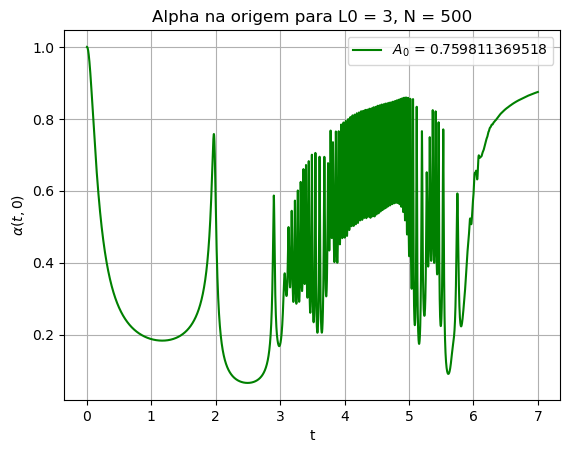

In [13]:
# Searching for critical amplitude:

plt.plot(t1, Alpha_origin, color = "g", label = "$A_0$ = {:}".format(A0))
plt.title("Alpha na origem para L0 = 3, N = {:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.grid()
plt.legend()

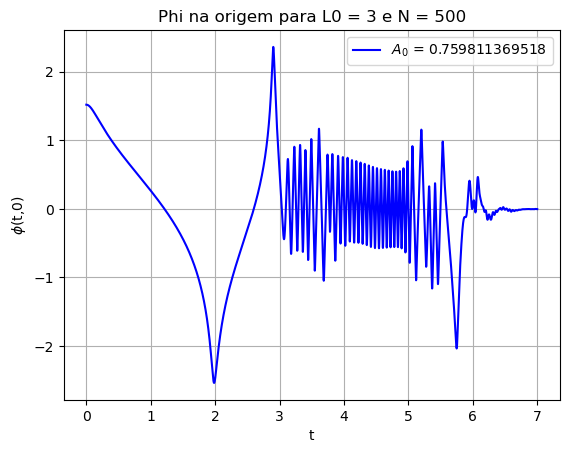

In [14]:
plt.plot(t1, phi_origin, color = "b", label = "$A_0$ = {:}".format(A0))
plt.title("Phi na origem para L0 = 3 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")  
#plt.xlim(7.2,8.2)
plt.grid()
plt.legend() 

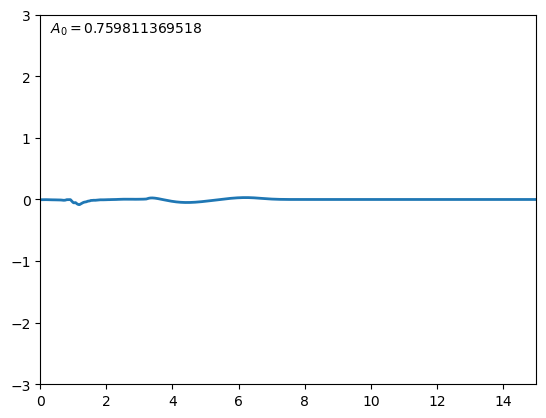

In [15]:
# Animation plot for Phi: Scalar Field
        
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure()
ax = plt.axes(xlim=(0, 15),ylim = (-3, 3))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
x = rplot

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.2, blit=True)

HTML(anim.to_html5_video())